In [1]:
from experimental_modeling_pipeline import Experimental_modeling_pipeline as emp
from experimental_modeling_pipeline import Data_engineering as de
from experimental_modeling_pipeline import DiabetesPreprocessing as dp
from experimental_modeling_pipeline import ClusteringPipeline as cp
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from statistics import mean 

emp = emp()
dp = dp("C:/Users/keimp/")

In [2]:
df = dp.preprocessing_factory()

0%
2%
4%
7%
14%
21%
28%
35%


C:\Users\keimp\NHS\Code\experimental_modeling\diabetes\experimental_modeling_pipeline.py:886: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


42%
56%


C:\Users\keimp\NHS\Code\experimental_modeling\diabetes\experimental_modeling_pipeline.py:716: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sleep = sleep.replace("Prefer not to answer", pd.np.nan)
C:\Users\keimp\NHS\Code\experimental_modeling\diabetes\experimental_modeling_pipeline.py:717: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sleep = sleep.replace("Do not know", pd.np.nan)


63%
77%
84%
91%
100%


In [3]:
df2 = df.copy()

In [4]:
fo = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/DM_first_occurence_dates.csv")
df = df.merge(fo, on="Participant ID")
fo["first_occurence"] = fo[fo.columns[1:]].apply(dp.earliest_date, axis=1) #Perform the earliest_date function
fo["first_occurence_binary"] = fo["first_occurence"].apply(dp.nan_to_binary) #Set the first occurence to binary
fo = fo.drop(fo.columns[1:-1], axis=1) 
df = df.merge(fo, on="Participant ID")

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\keimp\NHS\Code\experimental_modeling\diabetes\experimental_modeling_pipeline.py:742: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


Varible not convertable to datetime:  Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     1998-11-01
Name: 225392, dtype: object
Varible not convertable to datetime:  Date E10 first reported (insulin-dependent diabetes mellitus)                                               2007-05-10
Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     2005-02-06
Name: 318419, dtype: object
Varible not convertable to datetime:  Date E11 first reported (non-insulin-dependent diabetes mellitus)    Code has event date matching participant's dat...
Date E14 first reported (unspecified diabetes mellitus)                                                     1994-03-

In [5]:
di = ['Date E10 first reported (insulin-dependent diabetes mellitus)',
       'Date E11 first reported (non-insulin-dependent diabetes mellitus)',
       'Date E12 first reported (malnutrition-related diabetes mellitus)',
       'Date E13 first reported (other specified diabetes mellitus)',
       'Date E14 first reported (unspecified diabetes mellitus)']

for i in di:
    df[i+"_onehot"] = df[i].apply(dp.nan_to_binary) #One hot encoding for various diabetes types

In [127]:
niddm = df[(df['Date E11 first reported (non-insulin-dependent diabetes mellitus)_onehot'] == 1)]
healthy = df[(df['first_occurence_binary'] == 0) & (df['Glycated haemoglobin (HbA1c) | Instance 0'] < 48)]

In [128]:
cols = ['Participant ID',
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body mass index (BMI) | Instance 0',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Cholesterol_lowering_medication',
 'Insulin',
 'Blood_pressure',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0',
 'first_occurence_binary'
 ]

In [147]:
niddm_na = niddm[cols].dropna()
healthy_na = healthy[cols].dropna()

In [148]:
healthy_na["Body mass index (BMI) | Instance 0"].mean()

26.85449282760562

In [149]:
fo = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/DM_first_occurence_dates.csv")
att = pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Dates_attending_assessment_centers_participant.csv")

niddm_na = niddm_na.merge(att[['Participant ID','Date of attending assessment centre | Instance 0']], on='Participant ID')
niddm_na = niddm_na.merge(fo[['Participant ID','Date E11 first reported (non-insulin-dependent diabetes mellitus)']], on='Participant ID')

niddm_na = niddm_na[(niddm_na['Date E11 first reported (non-insulin-dependent diabetes mellitus)'] != "Code has event date matching participant's date of birth")]

niddm_na['Date of attending assessment centre | Instance 0'] = pd.to_datetime(niddm_na['Date of attending assessment centre | Instance 0'])
niddm_na['Date E11 first reported (non-insulin-dependent diabetes mellitus)'] = pd.to_datetime(niddm_na['Date E11 first reported (non-insulin-dependent diabetes mellitus)'])

niddm_na['diff_days'] = (niddm_na['Date E11 first reported (non-insulin-dependent diabetes mellitus)'] - niddm_na['Date of attending assessment centre | Instance 0']) / np.timedelta64(1, 'D')

niddm_na_five = niddm_na[(niddm_na['diff_days'] < 1825) & (niddm_na['diff_days'] > 0)]
niddm_na_one = niddm_na[(niddm_na['diff_days'] < 365) & (niddm_na['diff_days'] > 0)]

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [150]:
def lada_alg(l): 
    if l[1] < 24:
            return 1
    return 0

niddm_na_one["LADA"] = niddm_na_one[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)

C:\Users\keimp\AppData\Local\Temp\ipykernel_39216\3659815266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niddm_na_one["LADA"] = niddm_na_one[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)


In [151]:
niddm_na_one["LADA"].value_counts()

0    1019
1      61
Name: LADA, dtype: int64

In [152]:
niddm_na_five["LADA"] = niddm_na_five[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)
niddm_na_five["LADA"].value_counts()

C:\Users\keimp\AppData\Local\Temp\ipykernel_39216\2772972944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niddm_na_five["LADA"] = niddm_na_five[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)


0    5645
1     344
Name: LADA, dtype: int64

In [153]:
niddm_na_one_lada = niddm_na_one[(niddm_na_one["LADA"] == 0)]

In [154]:
niddm_na_one_lada_c = niddm_na_one_lada[cols] 

In [155]:
cohort = pd.concat([niddm_na_one_lada_c,healthy_na.sample(n=niddm_na_one_lada_c.shape[0])])

### One year hba1c only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

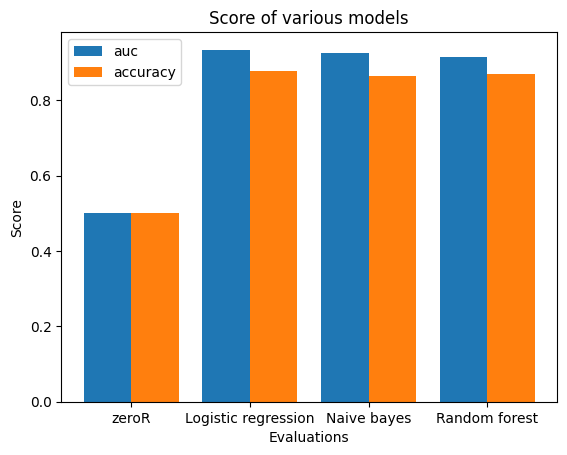

F1:  0.8741109720974563 0.8527945636528954 0.8638956244148045
auc:  [0.5, 0.934372034817984, 0.9268966985036069, 0.914302522902332]
accuracy:  [0.5, 0.8788035361564773, 0.8655574023221082, 0.869972780266898]


In [156]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### One year questionnaire only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

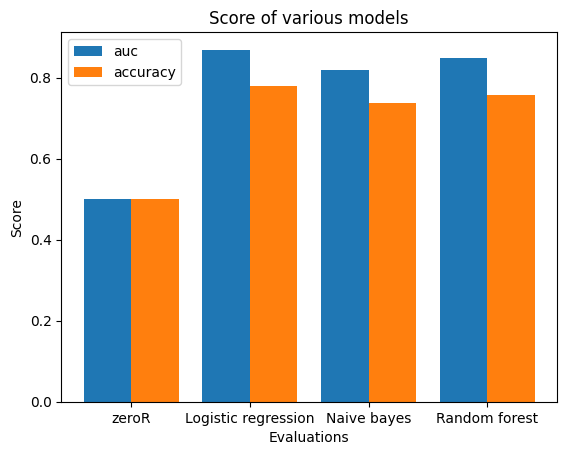

F1:  0.7802004195648513 0.7150068993889152 0.7630111443449007
auc:  [0.5, 0.8688511476260552, 0.8196668035030105, 0.8483946942536311]
accuracy:  [0.5, 0.7787035698800405, 0.7379799585681939, 0.7581081081081081]


In [157]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0'
 ], 0.25, splits= 5)

### One year questionnaire and HBA1C

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

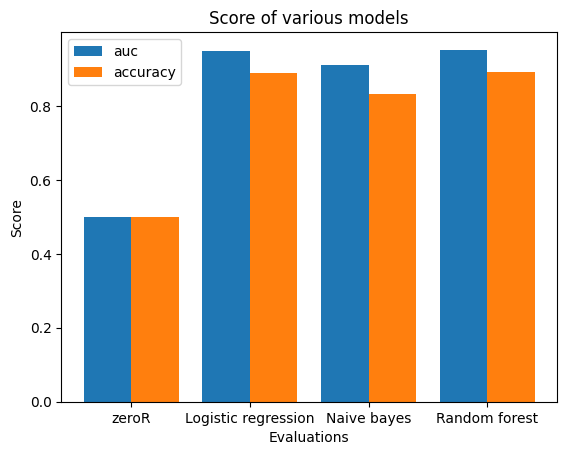

F1:  0.8858387439609322 0.8299704396849403 0.8886449378859381
auc:  [0.5, 0.9498522262184116, 0.9099106444470959, 0.9521715548964684]
accuracy:  [0.5, 0.8886134797899504, 0.8331755552343787, 0.8910728910728911]


In [158]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### Five year

In [159]:
niddm_na_five_lada = niddm_na_five[(niddm_na_five["LADA"] == 0)]
niddm_na_five_lada_c = niddm_na_five_lada[cols] 
cohort = pd.concat([niddm_na_five_lada_c,healthy_na.sample(n=niddm_na_five_lada_c.shape[0])])

### five year hba1c only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

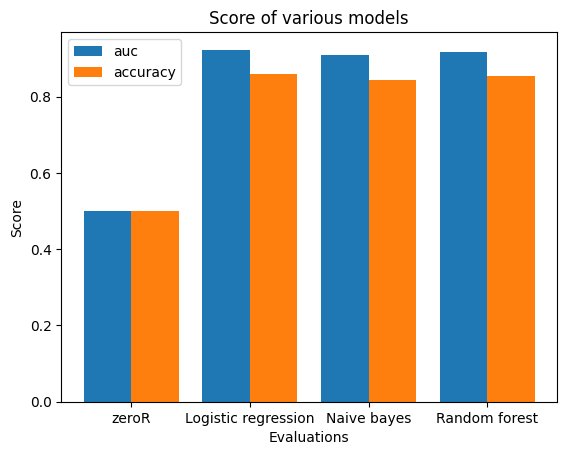

F1:  0.8524777896528519 0.8243876079219192 0.845684583700391
auc:  [0.5, 0.9227407560246376, 0.9096550322796771, 0.9169283743422657]
accuracy:  [0.5, 0.8578387953941541, 0.8432240921169176, 0.8533215234720992]


In [160]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### Five year questionnaire only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

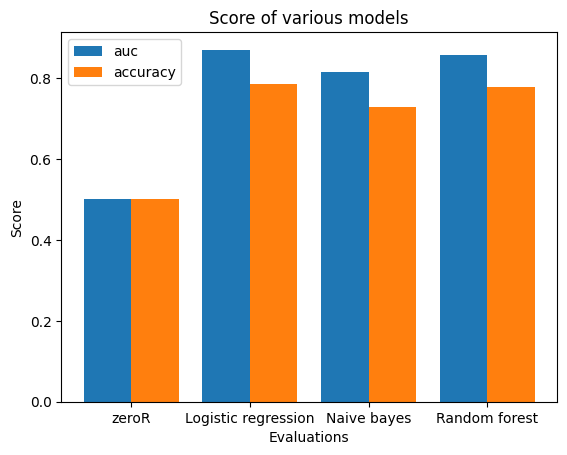

F1:  0.7871601379454 0.7056909130245589 0.7853218271504804
auc:  [0.5, 0.8702214976609101, 0.8150076766713137, 0.8576986775099813]
accuracy:  [0.5, 0.7864481842338352, 0.7281665190434012, 0.7789193976970771]


In [161]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0'
 ], 0.25, splits= 5)

### Five year questionnaire and hba1c

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

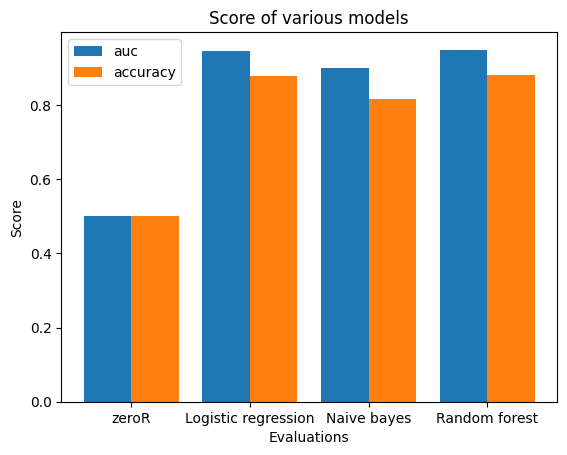

F1:  0.8747522068637397 0.8127304529799232 0.8785885123475154
auc:  [0.5, 0.9453921535553933, 0.898484906730601, 0.9490445545059354]
accuracy:  [0.5, 0.8770593445527015, 0.816474756421612, 0.8809565987599646]


In [162]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### 5 tot 10 years

In [163]:
niddm_na_fiveten = niddm_na[(niddm_na['diff_days'] > 1825) & (niddm_na['diff_days'] < 3650)]
niddm_na_fiveten["LADA"] = niddm_na_fiveten[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)
niddm_na_fiveten_lada = niddm_na_fiveten[(niddm_na_fiveten["LADA"] == 0)]
niddm_na_fiveten_lada_c = niddm_na_fiveten_lada[cols] 
cohort = pd.concat([niddm_na_fiveten_lada_c,healthy_na.sample(n=niddm_na_fiveten_lada_c.shape[0])])

C:\Users\keimp\AppData\Local\Temp\ipykernel_39216\175201580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niddm_na_fiveten["LADA"] = niddm_na_fiveten[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)


### Five to ten years HBA1C only 

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

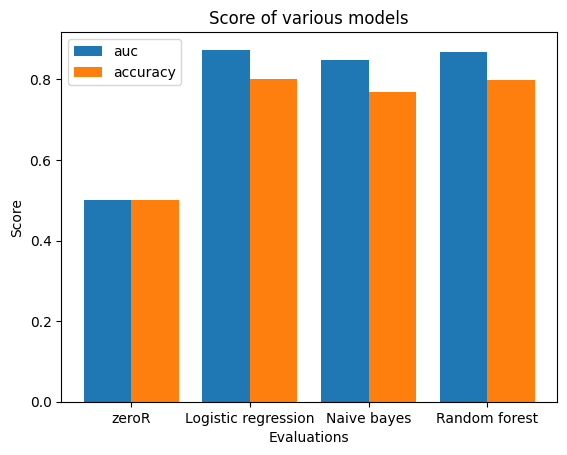

F1:  0.7941479448789939 0.7258718228800843 0.7861286266700139
auc:  [0.5, 0.8737493054267613, 0.8487642144258029, 0.8684126909734017]
accuracy:  [0.5, 0.7998821418838518, 0.7694239241421322, 0.7986317633441503]


In [164]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### Five to ten year questionnaire only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

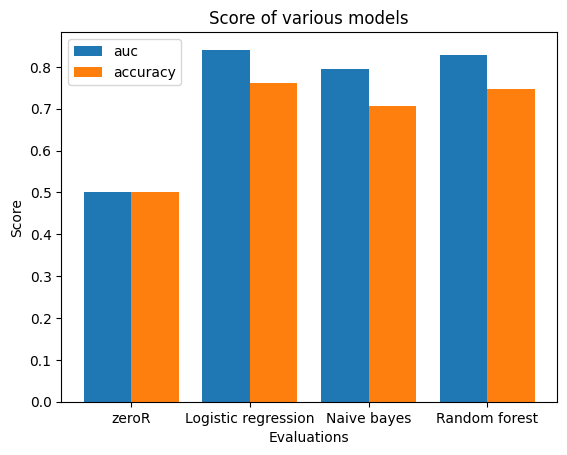

F1:  0.760691522698526 0.6809882252220977 0.7581487794215789
auc:  [0.5, 0.8407715265867793, 0.7942793192319121, 0.828973144572167]
accuracy:  [0.5, 0.7605938750043638, 0.7067387509096454, 0.7465410199016487]


In [165]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0'
 ], 0.25, splits= 5)

### Five to ten year HBA1C and questionnaire

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

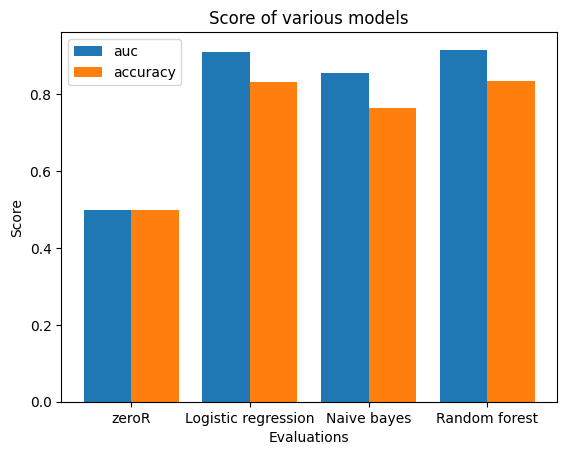

F1:  0.8314523220026897 0.7514726166459891 0.8344922897060247
auc:  [0.5, 0.9101882590479968, 0.8555383872625699, 0.9165398438279584]
accuracy:  [0.5, 0.8332111722457803, 0.7647876212984636, 0.8356388599994425]


In [166]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### Ten year+

In [167]:
niddm_na_ten = niddm_na[(niddm_na['diff_days'] > 3650)]
niddm_na_ten["LADA"] = niddm_na_ten[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)
niddm_na_ten_lada = niddm_na_ten[(niddm_na_ten["LADA"] == 0)]
niddm_na_ten_lada_c = niddm_na_ten_lada[cols] 
cohort = pd.concat([niddm_na_ten_lada_c,healthy_na.sample(n=niddm_na_ten_lada_c.shape[0])])

C:\Users\keimp\AppData\Local\Temp\ipykernel_39216\3456852216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niddm_na_ten["LADA"] = niddm_na_ten[['Age at recruitment','Body mass index (BMI) | Instance 0', 'Glycated haemoglobin (HbA1c) | Instance 0']].apply(lada_alg,axis=1)


### Ten+ year HBA1C only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

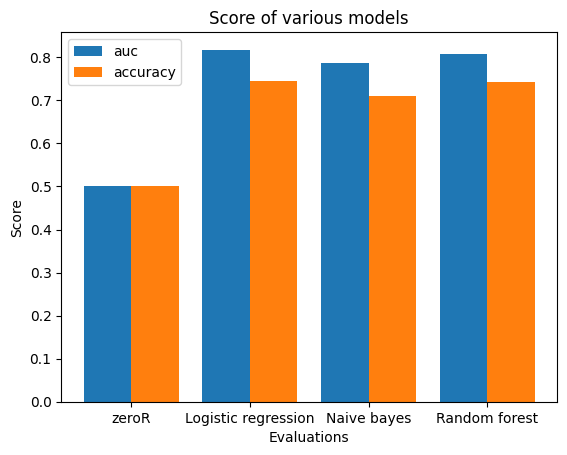

F1:  0.7381885674056234 0.6425122976694502 0.7264178748682446
auc:  [0.5, 0.817664396999723, 0.7859477408861193, 0.8074770292109646]
accuracy:  [0.5, 0.7452679589509692, 0.7104903078677309, 0.7418472063854048]


In [168]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### Ten+ year questionnaire only

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

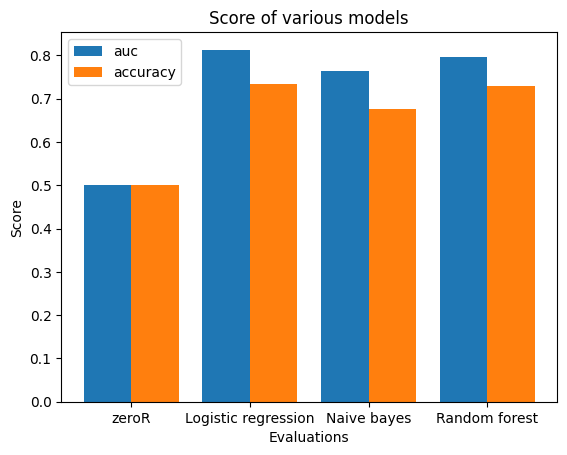

F1:  0.7351169895295614 0.6414496098718013 0.7416803973788075
auc:  [0.5, 0.81321442826886, 0.7645575709666389, 0.7965302309495547]
accuracy:  [0.5, 0.7338654503990878, 0.6767388825541619, 0.7283922462941848]


In [169]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0'
 ], 0.25, splits= 5)

### Ten+ year questionnaire and HBA1C

Number of missing values: 
 Participant ID                                                       0
Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_Special oc

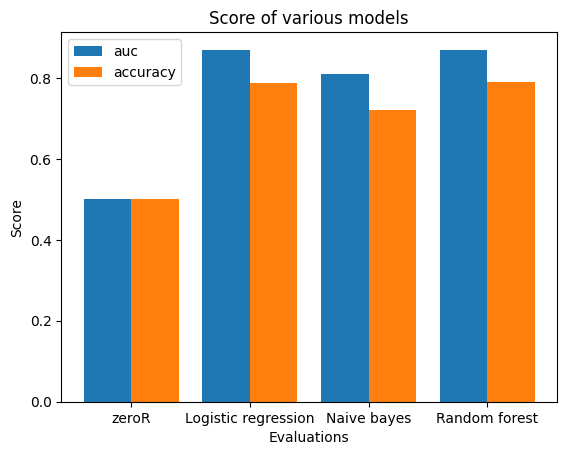

F1:  0.7838161447489793 0.6973659951157194 0.7896255990379867
auc:  [0.5, 0.8686183982140837, 0.8099820706279441, 0.869755918708045]
accuracy:  [0.5, 0.7865450399087799, 0.7220068415051312, 0.7892816419612315]


In [170]:
emp.pipeline(cohort,'first_occurence_binary',[
 'Age at recruitment',
 'Sex_binary',
 'Asian',
 'Black',
 'Chinese',
 'Mixed',
 'Other',
 'White',
 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
 'Alcohol intake frequency. | Instance 0_Never',
 'Alcohol intake frequency. | Instance 0_Once or twice a week',
 'Alcohol intake frequency. | Instance 0_One to three times a month',
 'Alcohol intake frequency. | Instance 0_Special occasions only',
 'Alcohol intake frequency. | Instance 0_Three or four times a week',
 'fmi',
 'Body fat percentage | Instance 0',
 'Waist circumference | Instance 0',
 'Weight | Instance 0',
 'Hip circumference | Instance 0',
 'Whole body fat mass | Instance 0',
 'Basal metabolic rate | Instance 0',
 'Trunk fat percentage | Instance 0',
 'Arm fat percentage (left) | Instance 0',
 'Leg fat percentage (left) | Instance 0',
 'Diastolic blood pressure',
 'Systolic blood pressure',
 'Illnesses of father',
 'Illnesses of mother',
 'Illnesses of siblings',
 'father_stroke',
 'mother_stroke',
 'sibling_stroke',
 'father_alzheimer',
 'mother_alzheimer',
 'sibling_alzheimer',
 'father_bloodpressure',
 'mother_bloodpressure',
 'sibling_bloodpressure',
 'father_heart',
 'mother_heart',
 'sibling_heart',
 'father_parkinson',
 'mother_parkinson',
 'sibling_parkinson',
 'Sleep duration | Instance 0',
 'Tobacco smoking_Ex-smoker',
 'Tobacco smoking_Never smoked',
 'Tobacco smoking_Occasionally',
 'Tobacco smoking_Smokes on most or all days',
 'Summed MET minutes per week for all activity | Instance 0',
 'Summed minutes activity | Instance 0',
 'Glycated haemoglobin (HbA1c) | Instance 0'
 ], 0.25, splits= 5)

### With clustering approach

#### One year

##### Questionnaire only

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

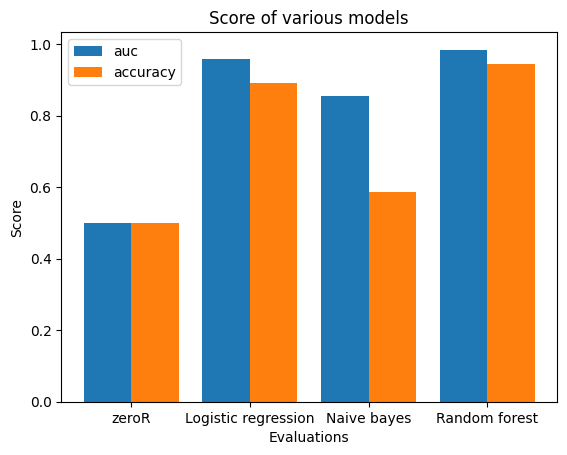

F1:  0.8923059581206109 0.3270332480818414 0.9456898656898657
auc:  [0.5, 0.9577849462365592, 0.8555268817204301, 0.9840645161290322]
accuracy:  [0.5, 0.8914754098360655, 0.5859016393442623, 0.9441530054644809]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

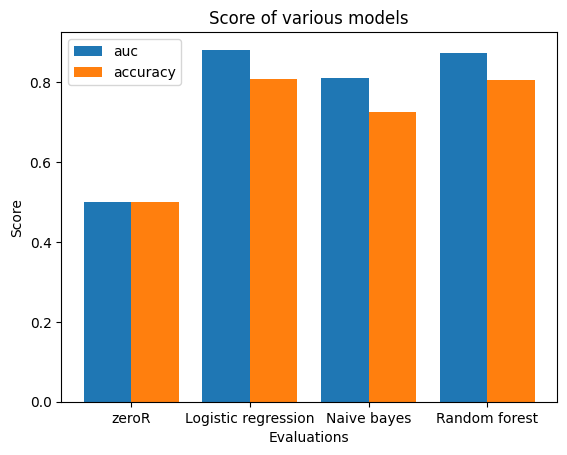

F1:  0.8108968834842961 0.7102017280467441 0.8118469019371894
auc:  [0.5, 0.8815773960057961, 0.810206626948145, 0.8722693708443315]
accuracy:  [0.5, 0.8079558894571138, 0.7254751711615666, 0.805085705718712]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never

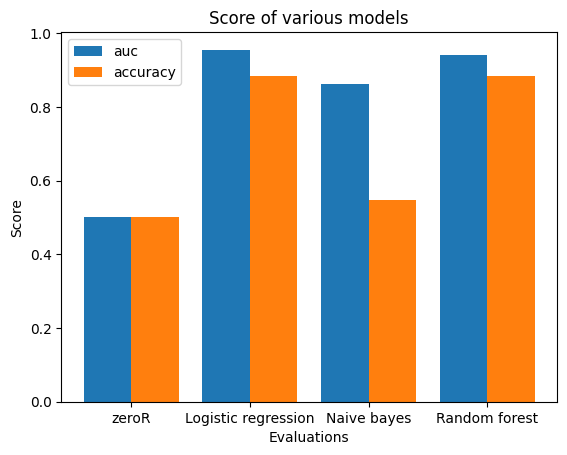

F1:  0.8860306123112751 0.21020166424340997 0.8896268477603795
auc:  [0.5, 0.9548632580261593, 0.8628814902893381, 0.9403686087990488]
accuracy:  [0.5, 0.8843950905902981, 0.5476914085330217, 0.8842781998831093]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                    

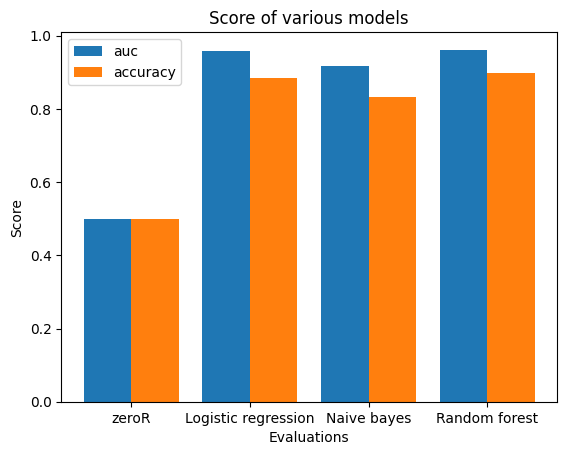

F1:  0.8864568455088335 0.8230779012026751 0.9027287304282211
auc:  [0.5, 0.9578614598697701, 0.9182497211929346, 0.9616869626218657]
accuracy:  [0.5, 0.8834795321637426, 0.8323013415892673, 0.8992088063295494]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

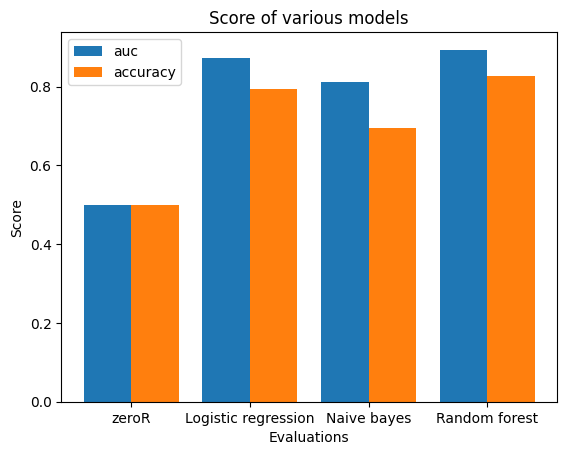

F1:  0.795056310400797 0.6092465042933842 0.8298562241595338
auc:  [0.5, 0.873219491878384, 0.8119221157850895, 0.8933673469387755]
accuracy:  [0.5, 0.7938775510204081, 0.6959183673469388, 0.826530612244898]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never 

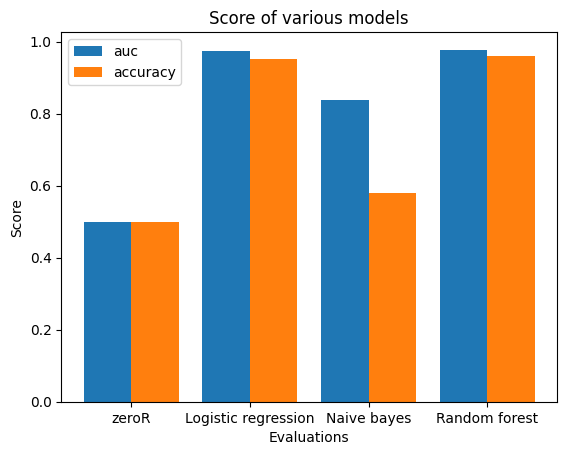

F1:  0.9538594470046083 0.31371459694989107 0.9616935483870968
auc:  [0.5, 0.9742222222222222, 0.8385, 0.9777777777777777]
accuracy:  [0.5, 0.9533333333333334, 0.5787096774193549, 0.9602150537634409]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcoh

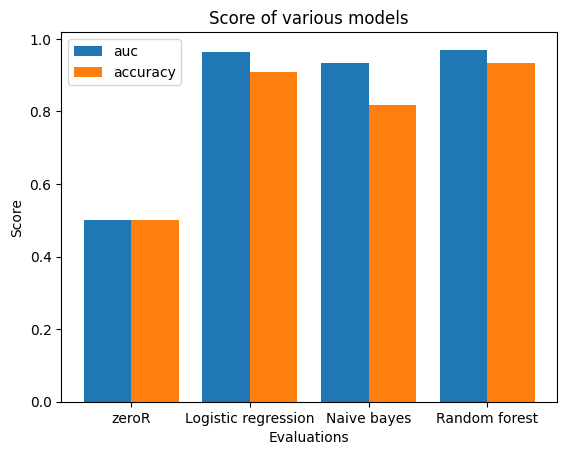

F1:  0.9083120075419105 0.8457760067114094 0.9351092955092928
auc:  [0.5, 0.9643323528798214, 0.9343299538978243, 0.9702051651125435]
accuracy:  [0.5, 0.9080059970014992, 0.8175712143928036, 0.9322338830584708]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

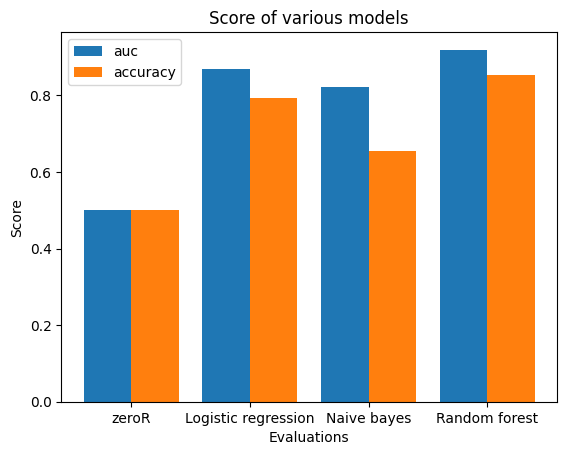

F1:  0.7956230614851305 0.638112151964611 0.8576970155797896
auc:  [0.5, 0.8676977989292088, 0.8207614515169541, 0.9193337299226652]
accuracy:  [0.5, 0.7926829268292683, 0.6536585365853659, 0.8536585365853658]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

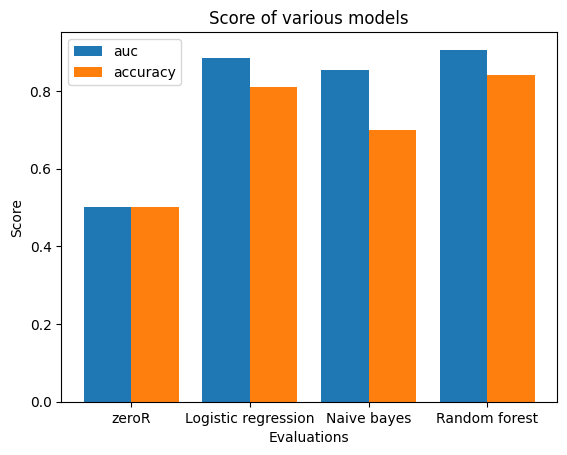

F1:  0.8131302439632897 0.6177818773932608 0.8458545310015898
auc:  [0.5, 0.8854567901234568, 0.8529506172839507, 0.9060987654320988]
accuracy:  [0.5, 0.8088888888888889, 0.6988888888888889, 0.84]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never            

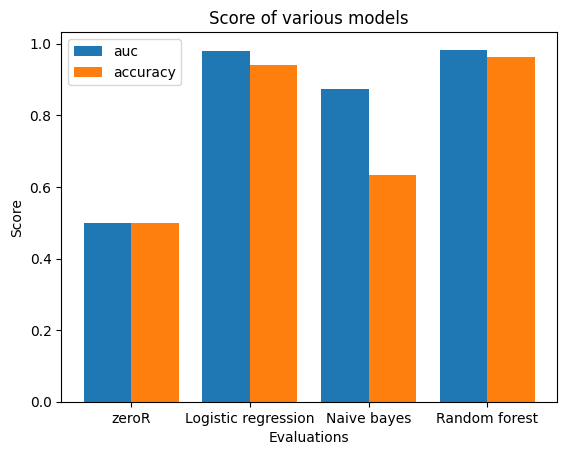

F1:  0.9437908496732026 0.4320855614973262 0.9643756449948401
auc:  [0.5, 0.9805555555555555, 0.8743055555555556, 0.9833333333333333]
accuracy:  [0.5, 0.9404411764705882, 0.6338235294117647, 0.9639705882352941]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

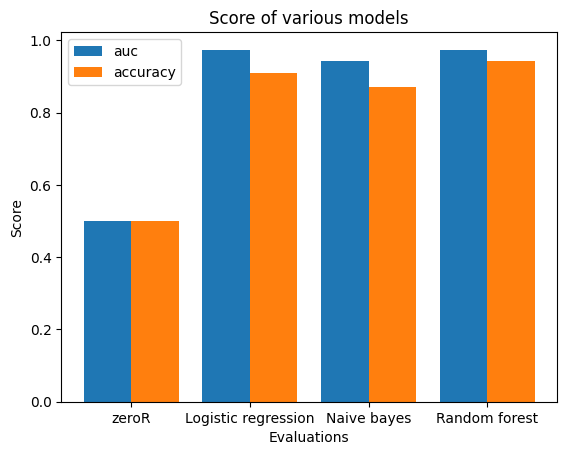

F1:  0.9106859751596594 0.8622734215002256 0.9425401960673798
auc:  [0.5, 0.9737323218761189, 0.941203455066237, 0.9715947234156821]
accuracy:  [0.5, 0.9095764854614412, 0.8706384323640961, 0.9415297092288243]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

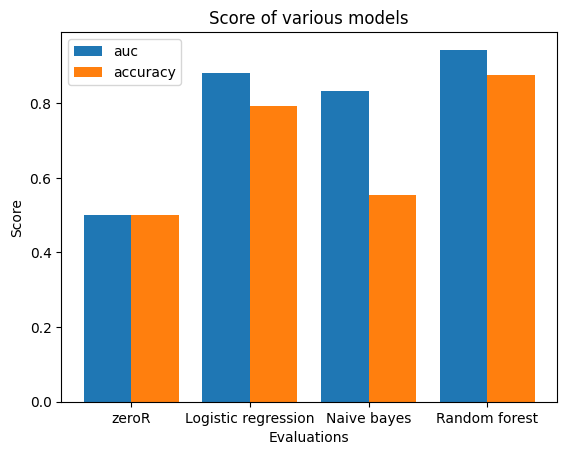

F1:  0.7957609621664786 0.2632423186569528 0.8773649617000246
auc:  [0.5, 0.8805055055055055, 0.8330663997330664, 0.9433641975308642]
accuracy:  [0.5, 0.7938736681887366, 0.5549086757990868, 0.876331811263318]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

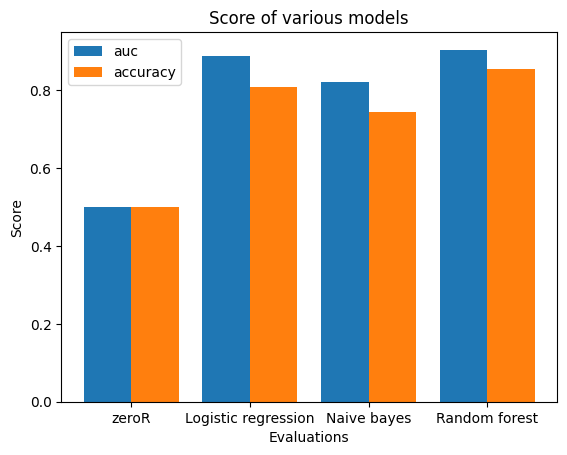

F1:  0.8131842156536596 0.7430758053298904 0.8611394530510744
auc:  [0.5, 0.8867262028482759, 0.8203229933415996, 0.9035940310916479]
accuracy:  [0.5, 0.8078418329637842, 0.7433850702143385, 0.855240206947524]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

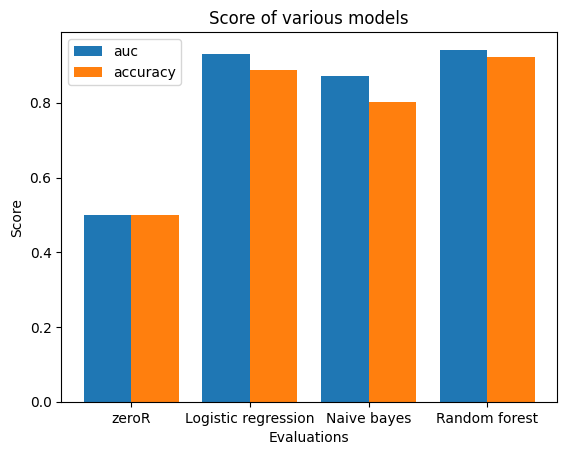

F1:  0.8899134199134199 0.7984338472017839 0.9250196180630963
auc:  [0.5, 0.9317460317460318, 0.8712471655328798, 0.9419387755102041]
accuracy:  [0.5, 0.8882694541231126, 0.8008130081300813, 0.9222996515679442]


In [183]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_one_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_one_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_one_lada_c[(niddm_na_one_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and hba1c

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

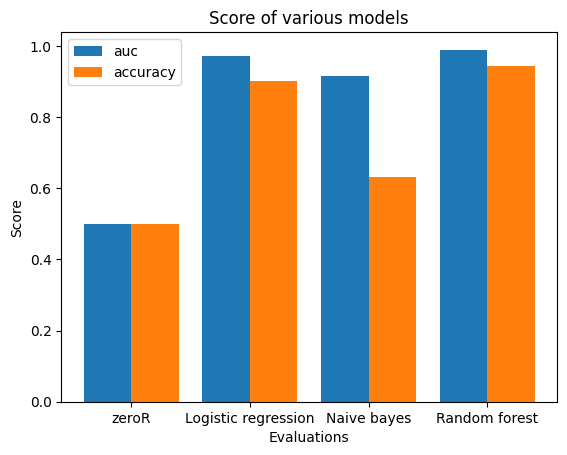

F1:  0.903519747635067 0.44514056750585396 0.9445030090413851
auc:  [0.5, 0.9724086021505377, 0.9139354838709677, 0.9890107526881721]
accuracy:  [0.5, 0.9014207650273224, 0.6314207650273224, 0.9441530054644809]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

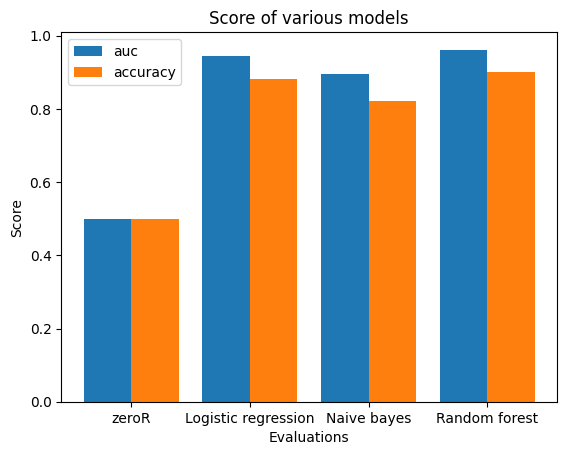

F1:  0.8795753957015437 0.8132700494679131 0.8981103730218234
auc:  [0.5, 0.9446976234559722, 0.8947205320791773, 0.9615669728702757]
accuracy:  [0.5, 0.8806300078292882, 0.820629341506888, 0.900243207676034]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never

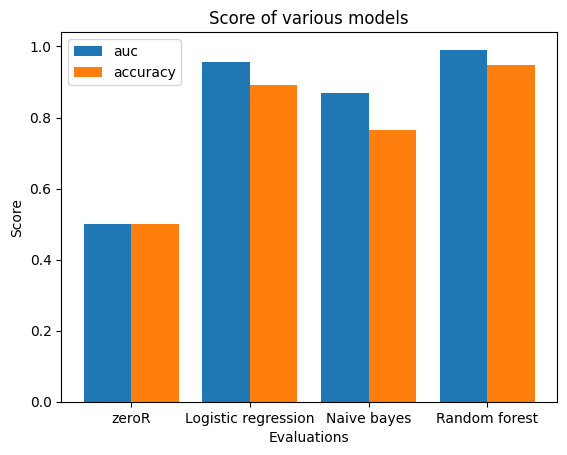

F1:  0.8936884584342212 0.7547296889537222 0.9487676086768646
auc:  [0.5, 0.9572255251684503, 0.8693935790725328, 0.9907808164883076]
accuracy:  [0.5, 0.8911163062536528, 0.7648158971361777, 0.9490356516656926]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

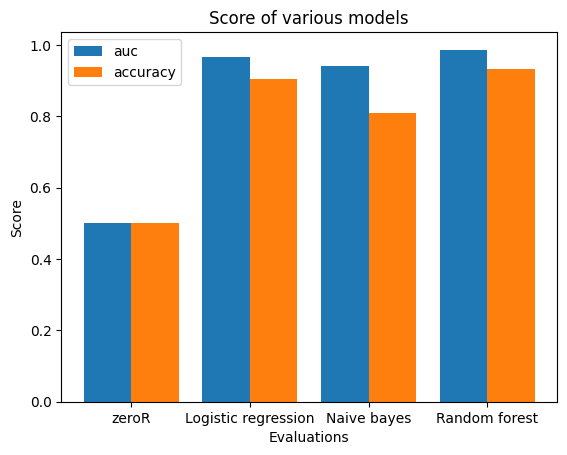

F1:  0.9047096638904756 0.8350485962128097 0.9343742904343173
auc:  [0.5, 0.9655398963916969, 0.9393468719646005, 0.986201748390114]
accuracy:  [0.5, 0.9031389748882008, 0.8087891296869625, 0.9332215342277261]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

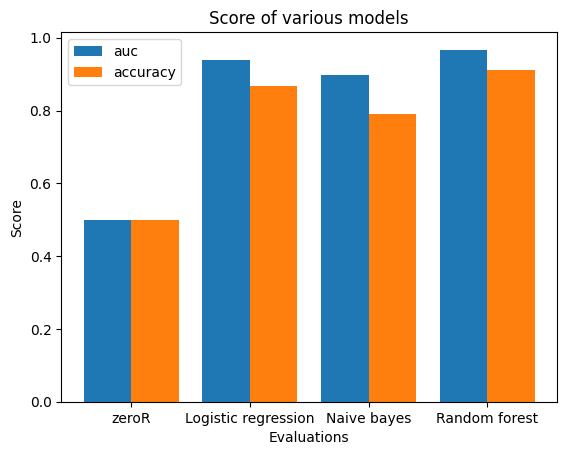

F1:  0.8671749924383073 0.7544703898935996 0.9098278827087221
auc:  [0.5, 0.9382965431070388, 0.8964181591003748, 0.9671386922115784]
accuracy:  [0.5, 0.8673469387755102, 0.7908163265306123, 0.9112244897959183]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

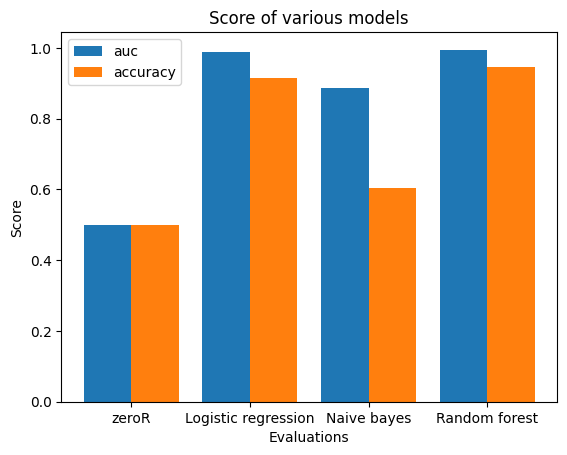

F1:  0.9171428571428571 0.3679738562091503 0.9520320197044335
auc:  [0.5, 0.9871111111111112, 0.8864444444444445, 0.9947777777777778]
accuracy:  [0.5, 0.9141935483870968, 0.6053763440860215, 0.9473118279569892]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

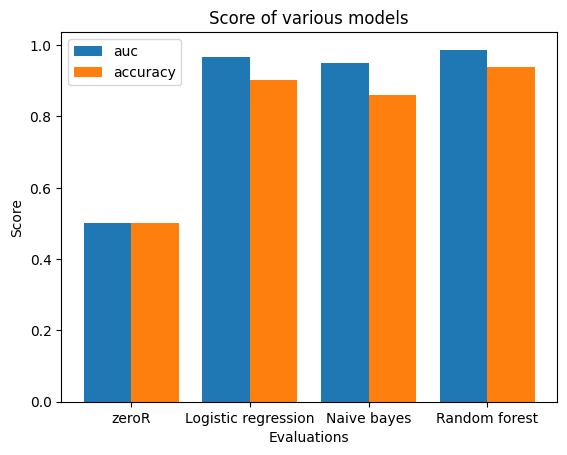

F1:  0.9034909253738412 0.8696026369199884 0.9382700952360824
auc:  [0.5, 0.9676283455368505, 0.9486716940985043, 0.9872400233639986]
accuracy:  [0.5, 0.9010044977511245, 0.8593403298350825, 0.9374512743628186]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

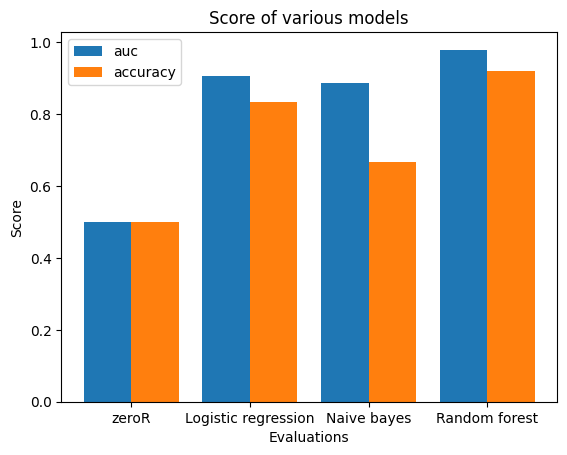

F1:  0.837302209826681 0.5913396713191263 0.9183586203854806
auc:  [0.5, 0.905175490779298, 0.8872694824509221, 0.9788221296847115]
accuracy:  [0.5, 0.8341463414634146, 0.6658536585365854, 0.9195121951219513]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

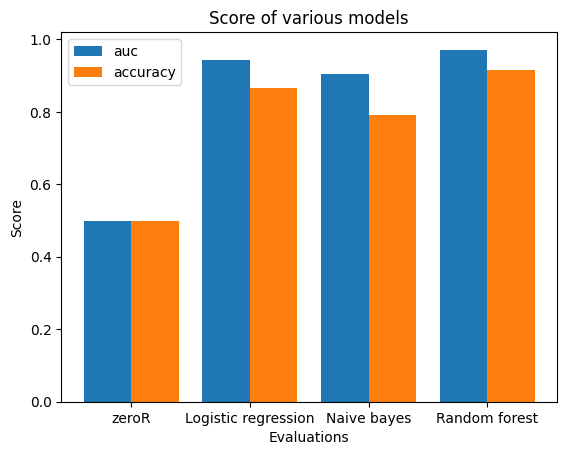

F1:  0.8676072656302335 0.7994697335612578 0.9139204193350122
auc:  [0.5, 0.9429876543209876, 0.904283950617284, 0.9713827160493828]
accuracy:  [0.5, 0.8666666666666667, 0.79, 0.9155555555555556]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never             

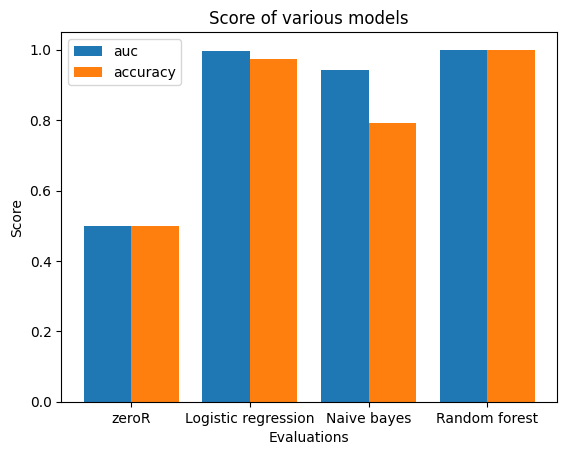

F1:  0.975 0.734249280131633 1.0
auc:  [0.5, 0.996875, 0.9413194444444445, 1.0]
accuracy:  [0.5, 0.975, 0.7919117647058823, 1.0]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcoh

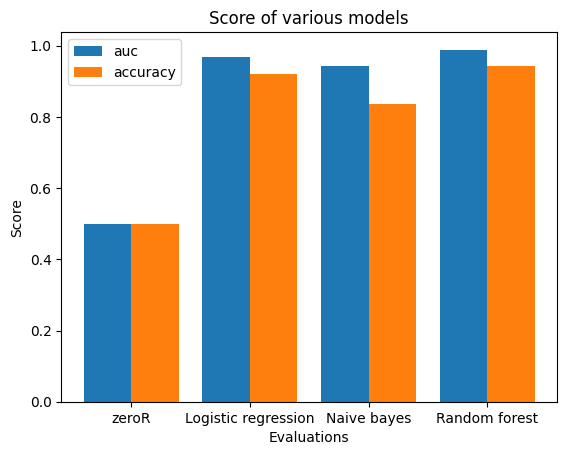

F1:  0.9244508465924074 0.8581395295427137 0.9446833980978773
auc:  [0.5, 0.9689312567132116, 0.9417416308628714, 0.9888639008234873]
accuracy:  [0.5, 0.9220448798988622, 0.8366308470290771, 0.9432522123893805]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

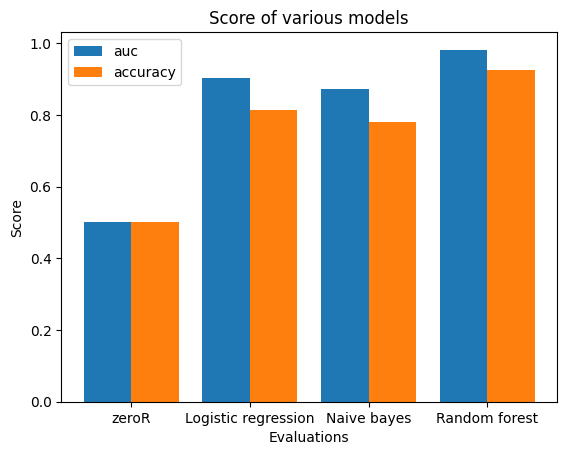

F1:  0.8152292768959436 0.7637428145624867 0.9249568981742895
auc:  [0.5, 0.9022772772772772, 0.8724203370036703, 0.9816837671004338]
accuracy:  [0.5, 0.8132039573820395, 0.7801750380517504, 0.9257610350076103]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

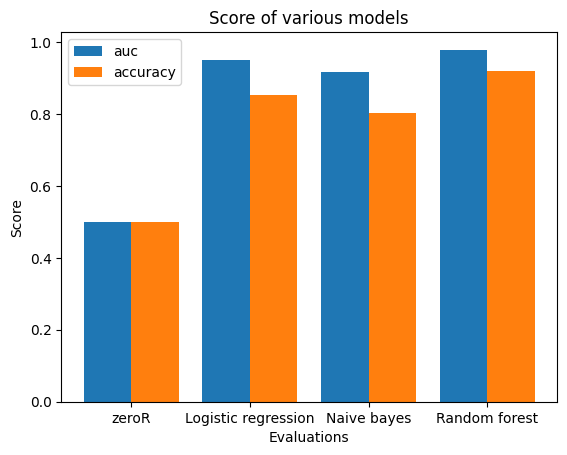

F1:  0.8549559223609263 0.7670948613872776 0.917671413954513
auc:  [0.5, 0.9494212423758089, 0.9169516853852052, 0.9786115909204934]
accuracy:  [0.5, 0.8540280857354028, 0.8030007390983, 0.9184774575018477]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

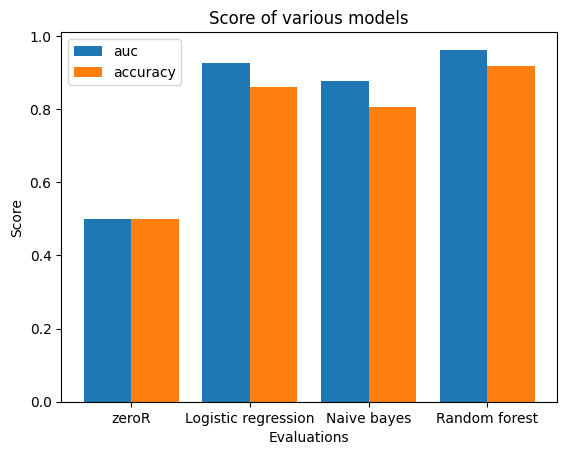

F1:  0.8666908723228238 0.8176953205524634 0.9197315400497775
auc:  [0.5, 0.9265986394557824, 0.8775850340136054, 0.9619614512471655]
accuracy:  [0.5, 0.859349593495935, 0.8058072009291521, 0.9176538908246226]


In [177]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_one_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
     'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_one_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_one_lada_c[(niddm_na_one_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

#### Five year

##### Questionnaire only

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

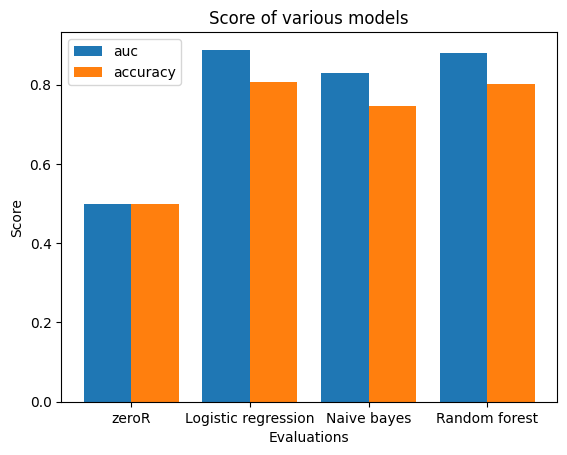

F1:  0.8078830240552899 0.730033526072061 0.8080744892235499
auc:  [0.5, 0.8881141427159099, 0.8306383950639079, 0.8800361688793165]
accuracy:  [0.5, 0.8054621848739496, 0.7465336134453782, 0.8010504201680673]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

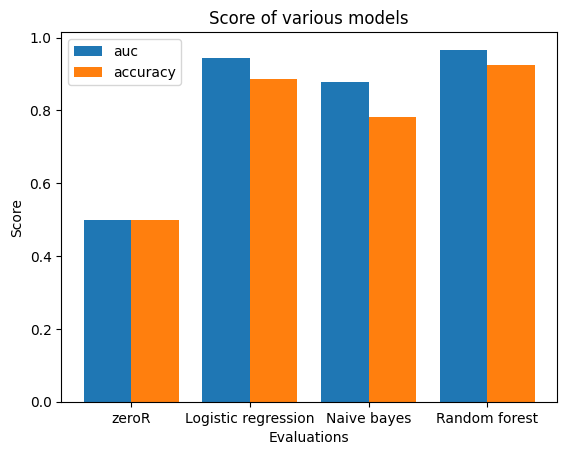

F1:  0.8876339492989135 0.7513532122548965 0.927655573694098
auc:  [0.5, 0.9448498196559099, 0.8776405247534234, 0.9664943024035239]
accuracy:  [0.5, 0.8864406779661017, 0.7813559322033898, 0.9248587570621469]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

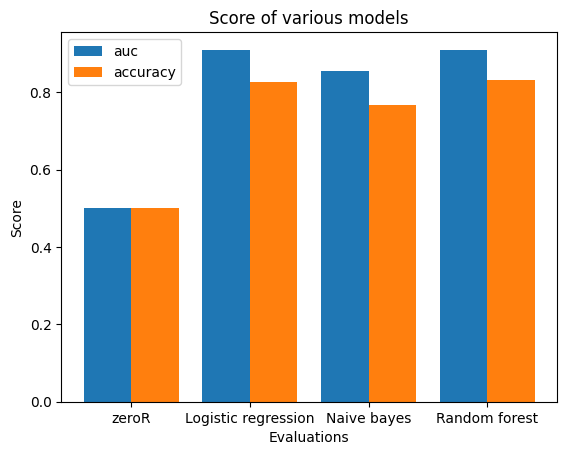

F1:  0.8296476935097153 0.7534412111752223 0.8379939083006054
auc:  [0.5, 0.9101753910917509, 0.8543520321657911, 0.9082215459793548]
accuracy:  [0.5, 0.826474278544542, 0.7664993726474278, 0.8312421580928482]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

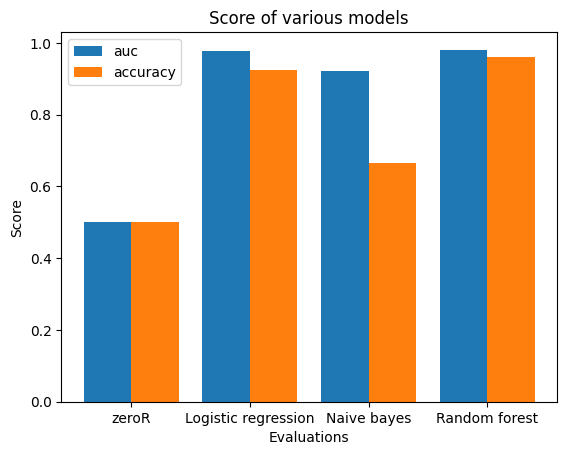

F1:  0.9279258184354093 0.50837644120598 0.9621861368696656
auc:  [0.5, 0.9774999249857473, 0.9228637441113812, 0.9811984277012632]
accuracy:  [0.5, 0.924887915754353, 0.6660202272964237, 0.9610259618392243]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                        

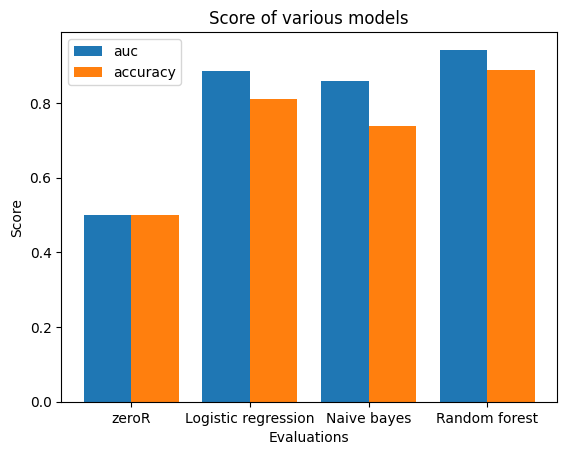

F1:  0.8124458246219464 0.7068694608036742 0.8936894377081962
auc:  [0.5, 0.8865185050135529, 0.8598156423822656, 0.942394990298681]
accuracy:  [0.5, 0.8108839398877422, 0.7382451566177802, 0.8885105920695274]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

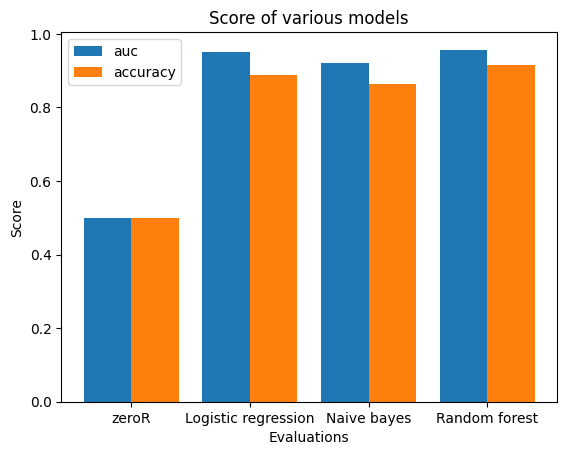

F1:  0.8932169282705338 0.8667595626962362 0.9199478573818356
auc:  [0.5, 0.9506725120551675, 0.9195999773914915, 0.9570296054206233]
accuracy:  [0.5, 0.8894800792427912, 0.8637904468412944, 0.9156548536209553]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

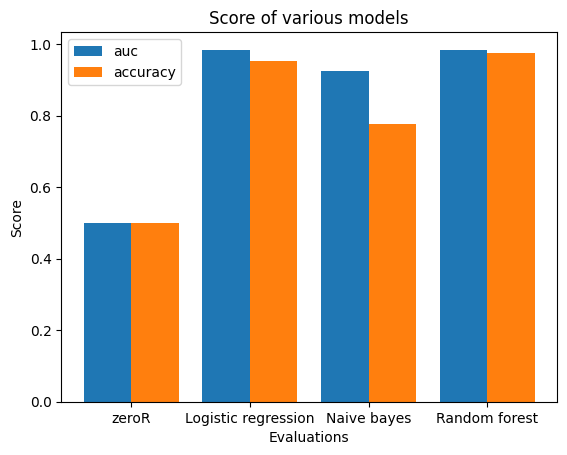

F1:  0.9530603366044151 0.7068740183736293 0.9744497840995682
auc:  [0.5, 0.9843076713123283, 0.9259416420736596, 0.983396734958462]
accuracy:  [0.5, 0.951481772882245, 0.7754130605822187, 0.974127983215316]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                        

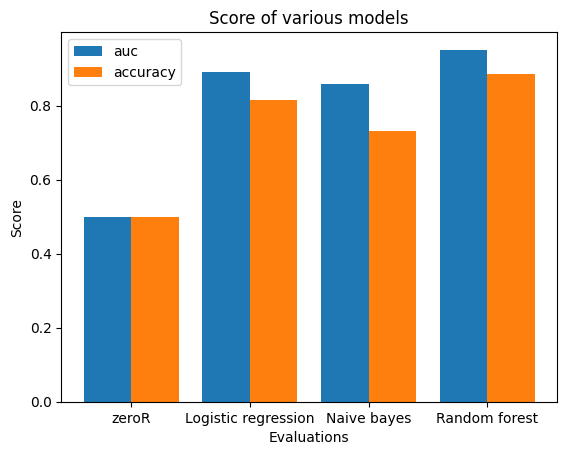

F1:  0.8156061439508479 0.6754961995844623 0.8894472839997299
auc:  [0.5, 0.8915029853886565, 0.8575151776788644, 0.9510261081150025]
accuracy:  [0.5, 0.8147012138721723, 0.731626908451428, 0.885862899818433]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

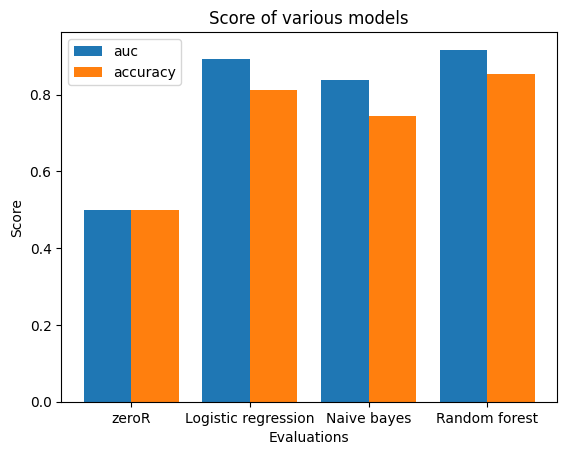

F1:  0.8139280304206943 0.7249088314709204 0.8615792624803897
auc:  [0.5, 0.8925018753011097, 0.8375903504506101, 0.9172696555616761]
accuracy:  [0.5, 0.8115499564937767, 0.7452936354809014, 0.8533282891335325]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

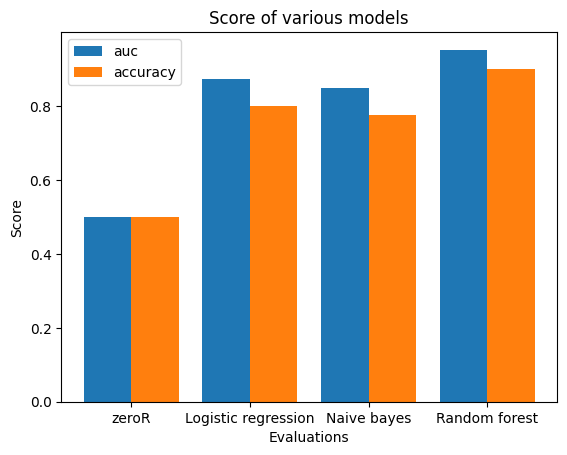

F1:  0.8018438082274767 0.7802706068649731 0.9035163887309183
auc:  [0.5, 0.8732483656654078, 0.8492431594804789, 0.9523347708719941]
accuracy:  [0.5, 0.8000869540290293, 0.7768969833640699, 0.9011418688427469]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

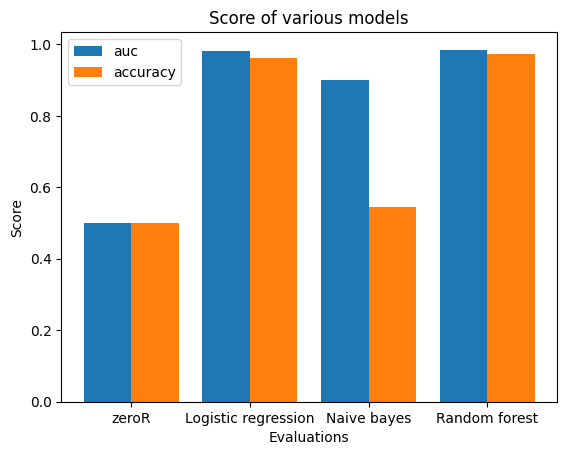

F1:  0.9624171513548323 0.20462440462440462 0.9728217509425304
auc:  [0.5, 0.9816534391534392, 0.9015828924162257, 0.9849911816578484]
accuracy:  [0.5, 0.9608763693270735, 0.5444444444444444, 0.9721048513302034]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                    

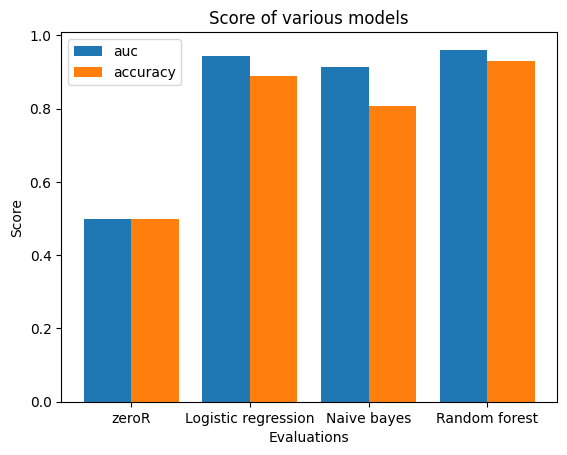

F1:  0.8914219280577436 0.8218175159164534 0.9343436723147425
auc:  [0.5, 0.9433688377792441, 0.9135073993778867, 0.9606466207936658]
accuracy:  [0.5, 0.8893203883495145, 0.8077669902912621, 0.9310679611650485]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

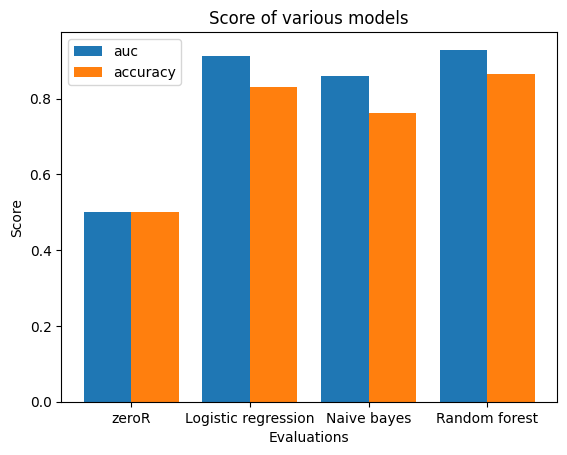

F1:  0.8337609896013989 0.7438132076703773 0.8723261656045024
auc:  [0.5, 0.9119397163341646, 0.8603093485037407, 0.929149194201995]
accuracy:  [0.5, 0.8301676029962547, 0.7629797128589263, 0.8661313982521848]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

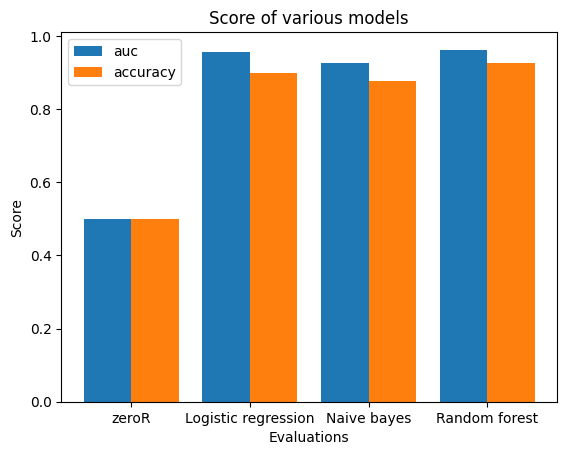

F1:  0.9006908541378192 0.880165508344023 0.9289278499707757
auc:  [0.5, 0.9550383644702894, 0.9258013457717515, 0.9620337665164314]
accuracy:  [0.5, 0.897562096987391, 0.8765194269797665, 0.925524610828228]


In [184]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_five_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_five_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_five_lada_c[(niddm_na_five_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and hba1c

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

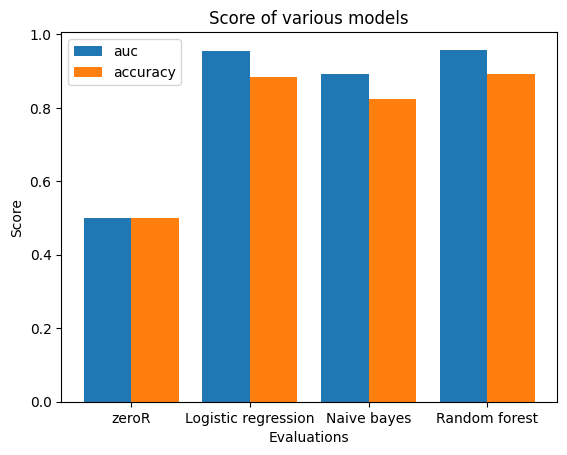

F1:  0.8825387311725826 0.8214488030596422 0.890612571204794
auc:  [0.5, 0.9546311171527435, 0.892477689605254, 0.9581232125203022]
accuracy:  [0.5, 0.8829831932773109, 0.8232142857142857, 0.8921218487394957]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

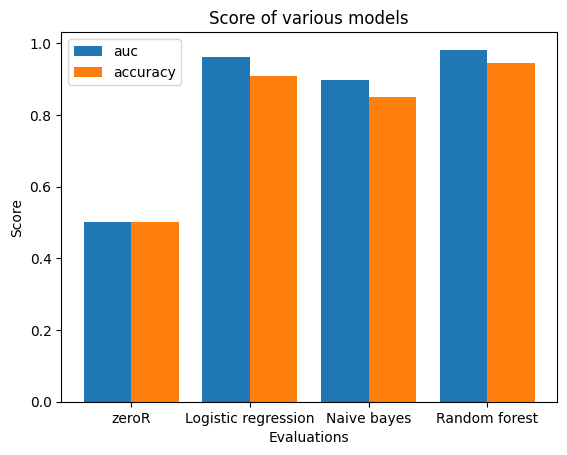

F1:  0.9087513166714016 0.8511210843336144 0.9468546324589057
auc:  [0.5, 0.9617479013054997, 0.8979763158734718, 0.9819751667783843]
accuracy:  [0.5, 0.9073446327683615, 0.8497175141242937, 0.9457627118644067]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

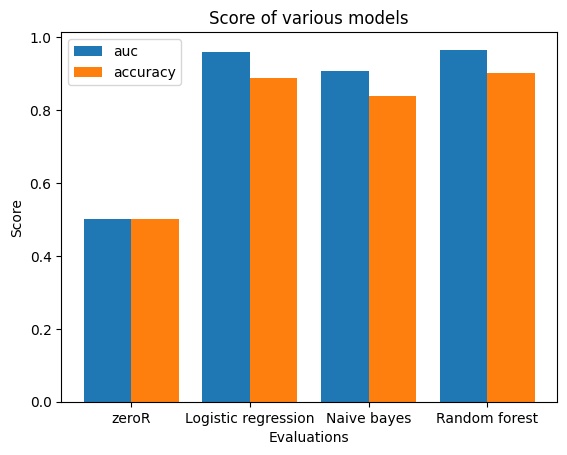

F1:  0.8888117972463038 0.836930646446184 0.8999000810599435
auc:  [0.5, 0.9601183232605331, 0.9078772498500494, 0.9653551823100743]
accuracy:  [0.5, 0.888582183186951, 0.8383939774153074, 0.9005018820577164]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

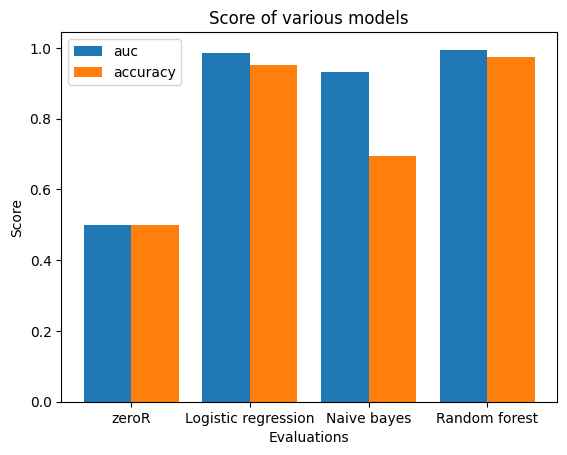

F1:  0.9532539587647882 0.5663543049531087 0.9745633831365613
auc:  [0.5, 0.9863804122783328, 0.9311108110541003, 0.9945803702703513]
accuracy:  [0.5, 0.9522990303409447, 0.6935564591804817, 0.9739651756855385]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

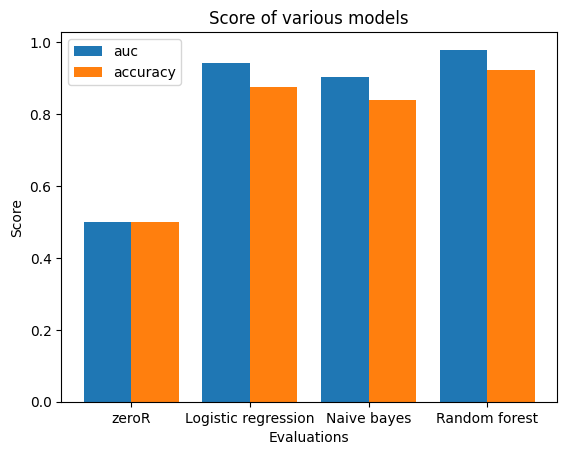

F1:  0.8755387893967197 0.836742591381571 0.9219187920035703
auc:  [0.5, 0.9431783575994144, 0.9035096194860271, 0.9792642128103322]
accuracy:  [0.5, 0.8751975375701612, 0.8394220532319392, 0.9220039833423863]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

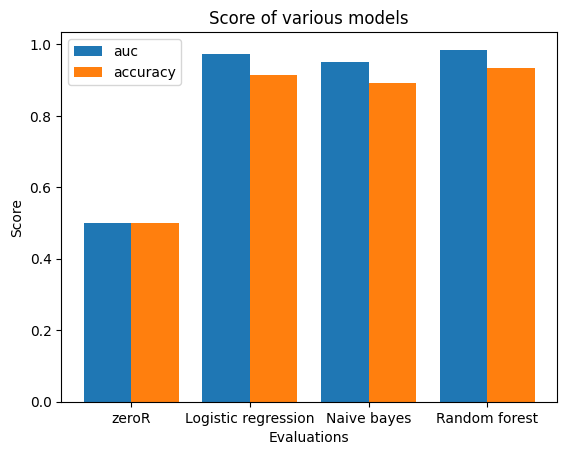

F1:  0.917322402991164 0.8949528356849069 0.93629319235233
auc:  [0.5, 0.973438639728238, 0.9493970167925095, 0.9849966633666516]
accuracy:  [0.5, 0.9156589625064201, 0.8921461589258199, 0.9348040208379191]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

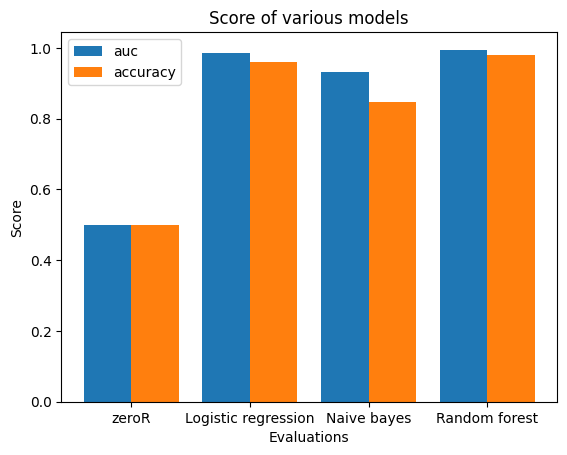

F1:  0.9619355371900826 0.8281169307762807 0.9794739837398374
auc:  [0.5, 0.9866626294331383, 0.9305389706760376, 0.9946546459459921]
accuracy:  [0.5, 0.9611723052714398, 0.8462234461054288, 0.9789798059270916]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

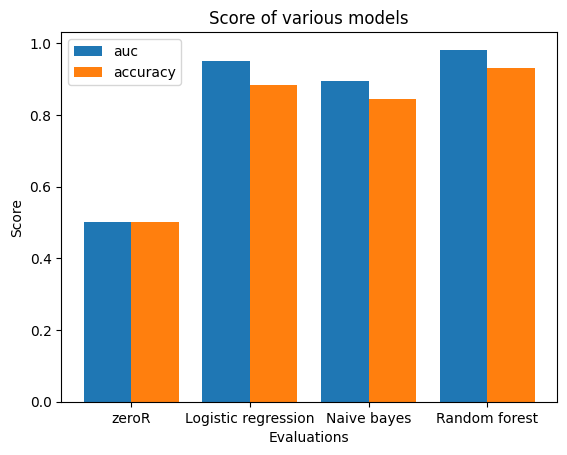

F1:  0.8836803761337568 0.8456100129913843 0.9306751263596627
auc:  [0.5, 0.950870673857327, 0.8942732865220904, 0.9815553346175356]
accuracy:  [0.5, 0.8830057895878772, 0.8443160406984047, 0.9307658928183988]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

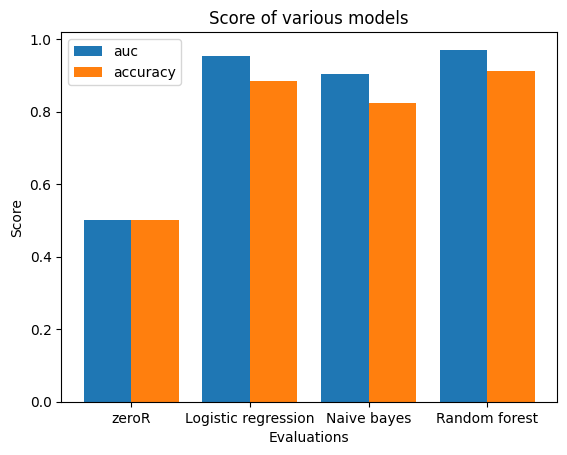

F1:  0.8830486654265967 0.8231096000433572 0.9099956509518395
auc:  [0.5, 0.9524491506088997, 0.9025309460066135, 0.9704512441525989]
accuracy:  [0.5, 0.8834227417748017, 0.8247960251705571, 0.9106016469312349]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

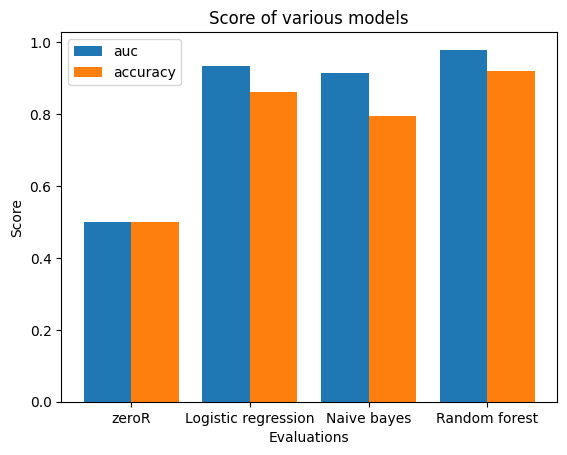

F1:  0.8626614889990821 0.7702327861793649 0.9184944523182537
auc:  [0.5, 0.9344650144841136, 0.9129623198936684, 0.9787947323926605]
accuracy:  [0.5, 0.8617669823129772, 0.7948181131931239, 0.9186387394532407]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

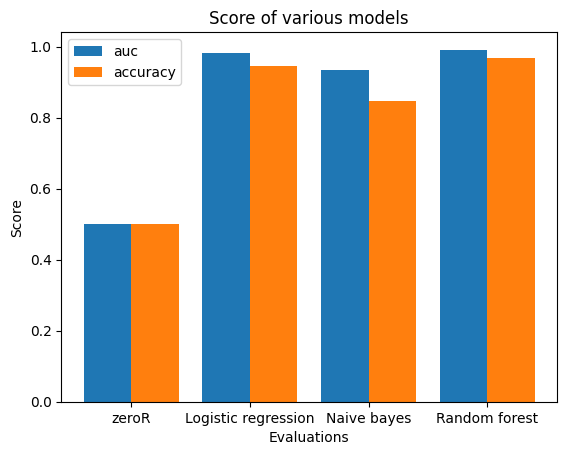

F1:  0.9494118917742302 0.8248910031502118 0.970913625746734
auc:  [0.5, 0.9813227513227513, 0.9347200176366843, 0.9912786596119929]
accuracy:  [0.5, 0.94679186228482, 0.8464788732394366, 0.969170579029734]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

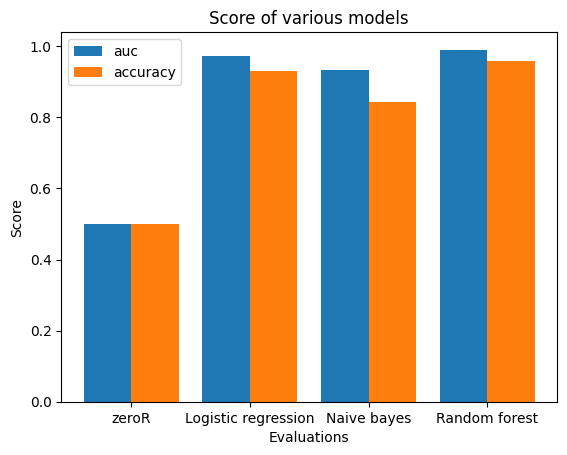

F1:  0.9322113493889498 0.8616958917854884 0.958342708039177
auc:  [0.5, 0.9737392779715336, 0.9335564143651617, 0.9900744650768215]
accuracy:  [0.5, 0.9310679611650485, 0.8436893203883495, 0.9572815533980583]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

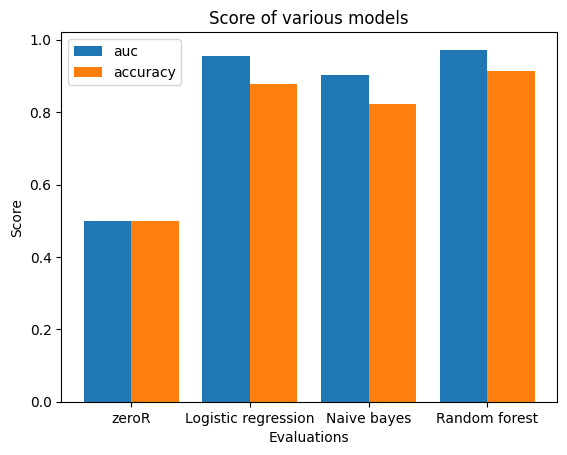

F1:  0.8776812544226682 0.8178163284595898 0.9132684558211305
auc:  [0.5, 0.9546818079800499, 0.9014787110349127, 0.9722900639027431]
accuracy:  [0.5, 0.8771176654182272, 0.8226782147315855, 0.9135839575530587]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

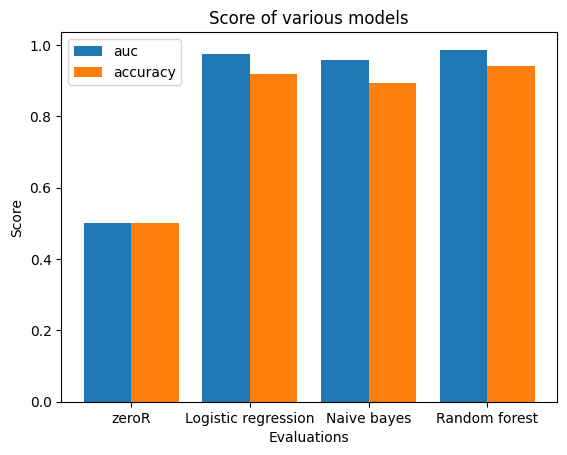

F1:  0.9206321360636455 0.899033875260916 0.9433453114253936
auc:  [0.5, 0.9746072818663952, 0.9579778698590447, 0.9866864971453192]
accuracy:  [0.5, 0.9191610824396654, 0.89231618027379, 0.9424136887315472]


In [178]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_five_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
     'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_five_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_five_lada_c[(niddm_na_five_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

#### Five to ten year

##### Questionnaire only

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

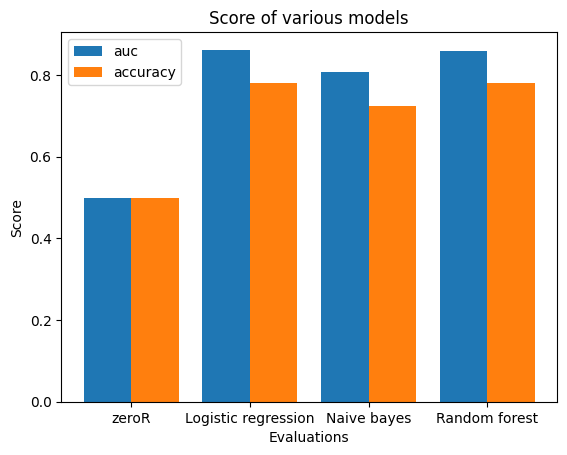

F1:  0.7843235510356906 0.7062566129071578 0.7908775693564206
auc:  [0.5, 0.8619810416072862, 0.8081054925635401, 0.8577444427280113]
accuracy:  [0.5, 0.7811609412889249, 0.7244149067447027, 0.7813385200593888]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

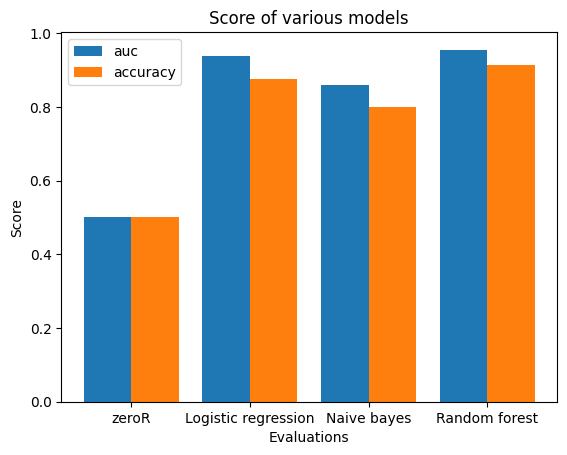

F1:  0.8777771181173428 0.7963224491496385 0.9184241862893726
auc:  [0.5, 0.937553363435996, 0.8602920068350105, 0.95482194302507]
accuracy:  [0.5, 0.875877616747182, 0.7983518044899119, 0.914631050487828]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never   

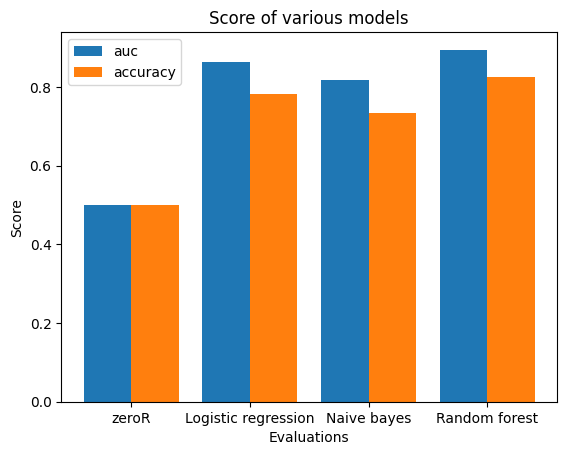

F1:  0.7839291137422292 0.7146927935603548 0.8352363794749573
auc:  [0.5, 0.8627285376480394, 0.8174157568376306, 0.8948414743428482]
accuracy:  [0.5, 0.7821615578333979, 0.7333633225547805, 0.8257289953108904]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

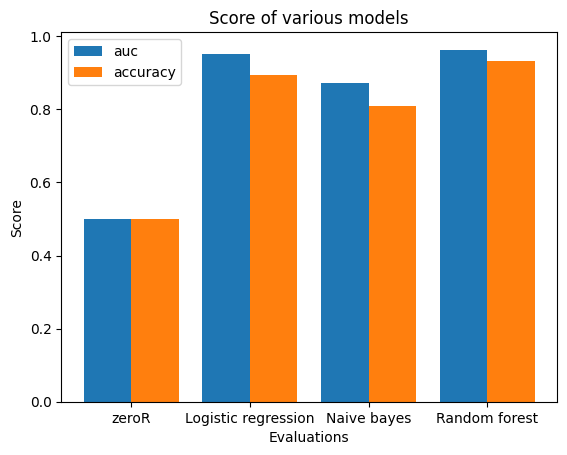

F1:  0.8943616238326282 0.8062155582777912 0.9358830098166802
auc:  [0.5, 0.9528956136504281, 0.8719738914593981, 0.963318356531666]
accuracy:  [0.5, 0.8933989985660218, 0.8100625308540399, 0.9331213709772209]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

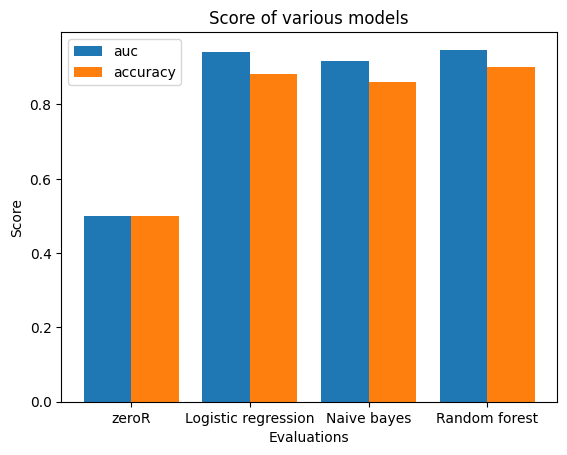

F1:  0.884571617602357 0.8673231517384233 0.9070077407100012
auc:  [0.5, 0.941583340708434, 0.9164505395882866, 0.9473822781078751]
accuracy:  [0.5, 0.8807516264239245, 0.8615791097739721, 0.9020328921509204]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never

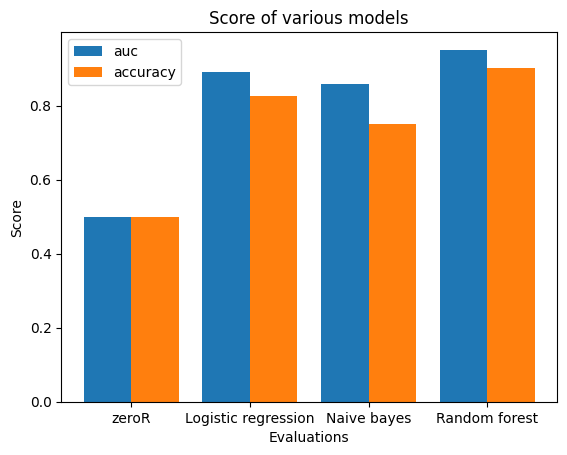

F1:  0.8297566456736878 0.7186608555044322 0.9046485609721474
auc:  [0.5, 0.8892668257060756, 0.8572608593278097, 0.9507741169035673]
accuracy:  [0.5, 0.8263836179633144, 0.7505865102639296, 0.9003090679086884]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

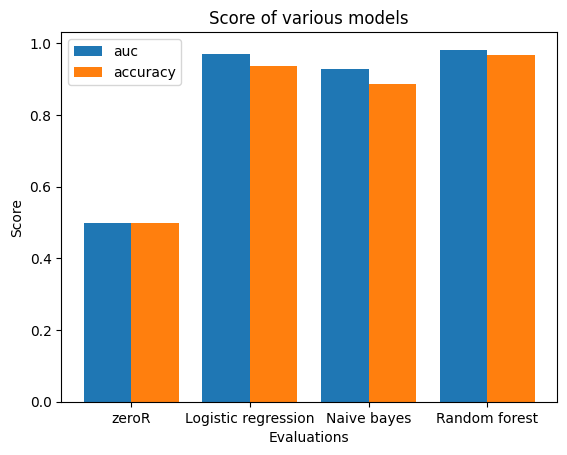

F1:  0.9394495054139519 0.8924152844560652 0.9676289579000046
auc:  [0.5, 0.9709940888768867, 0.927816785189186, 0.9825090767245777]
accuracy:  [0.5, 0.9380356584297779, 0.8861849650714211, 0.9668751954957773]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

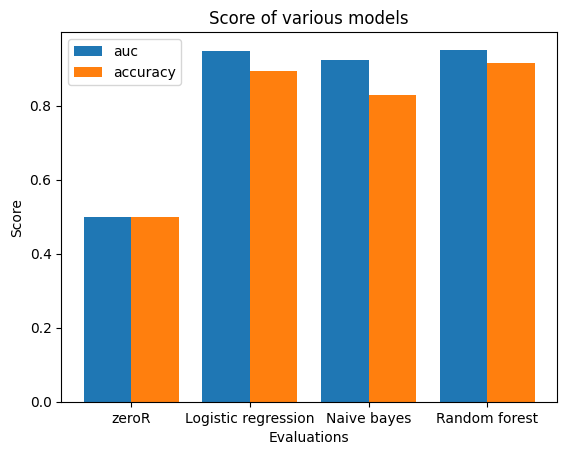

F1:  0.8972313986314173 0.8077844372027728 0.9196278140916286
auc:  [0.5, 0.9488922315627669, 0.9228247247499098, 0.9512826651071921]
accuracy:  [0.5, 0.8938586188780573, 0.8281365944778472, 0.9156941217675559]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

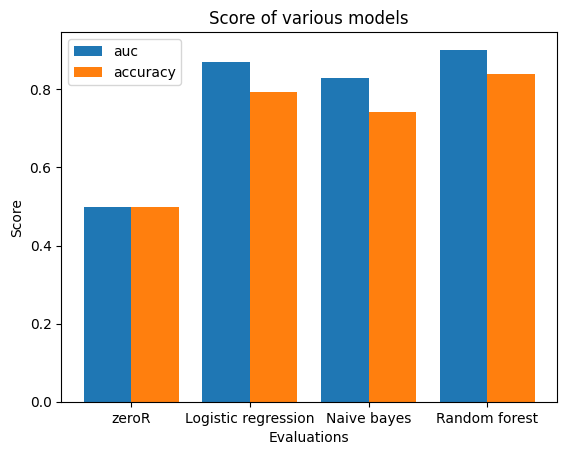

F1:  0.79641022612269 0.7248113968642557 0.8479041234489206
auc:  [0.5, 0.8706053161473226, 0.8279138166161584, 0.9015749263709683]
accuracy:  [0.5, 0.7932195536334852, 0.7413917393353202, 0.8391901667609665]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never

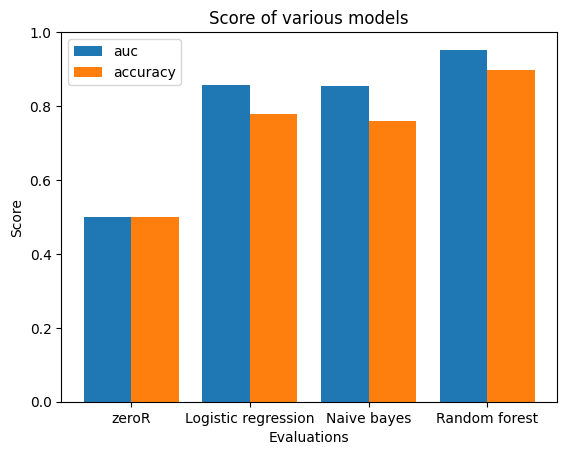

F1:  0.7812602283602542 0.732092625133905 0.9003079697409696
auc:  [0.5, 0.8564729830488025, 0.8546218688544368, 0.952602753212282]
accuracy:  [0.5, 0.7776559032952476, 0.7591071369432025, 0.8966458022851466]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

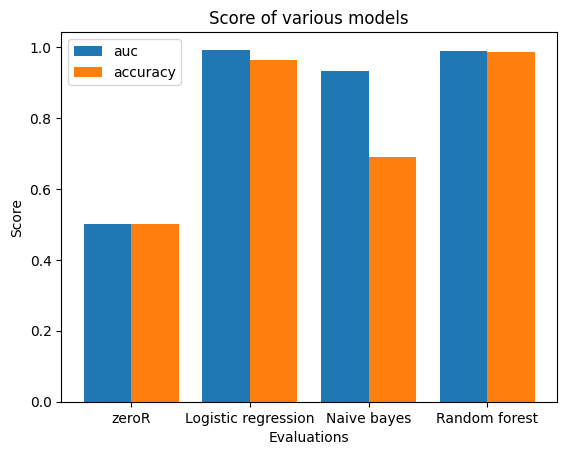

F1:  0.964025974025974 0.5289857761286332 0.9853198653198653
auc:  [0.5, 0.9921418773270625, 0.9307711150303744, 0.9891926317852244]
accuracy:  [0.5, 0.9631649831649831, 0.6886868686868687, 0.9852525252525253]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

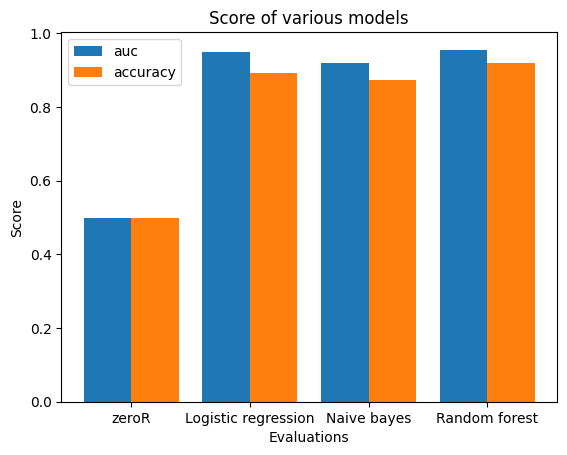

F1:  0.8971853141857487 0.8752817608952759 0.9232517756706656
auc:  [0.5, 0.950149405285832, 0.9211627111804971, 0.955889433916956]
accuracy:  [0.5, 0.893566102927805, 0.8732231035013359, 0.9195811825926392]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                        

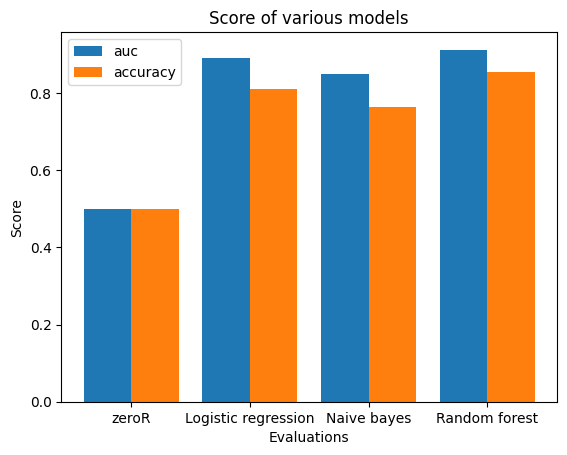

F1:  0.8146450658008569 0.7506050601894171 0.8618443146817776
auc:  [0.5, 0.8896453281596463, 0.8496540337142551, 0.9120067951914534]
accuracy:  [0.5, 0.8103232310479328, 0.7639814596951141, 0.8533439310726099]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

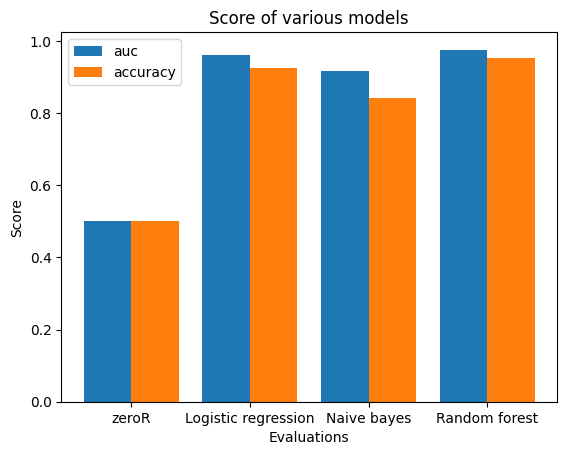

F1:  0.9269712248283133 0.8583260909056012 0.9549122951317525
auc:  [0.5, 0.9619009848635072, 0.9168219974882675, 0.9754114614316874]
accuracy:  [0.5, 0.9252032520325203, 0.8414634146341463, 0.9536585365853658]


In [185]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_fiveten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_fiveten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_fiveten_lada_c[(niddm_na_fiveten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and hba1c

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

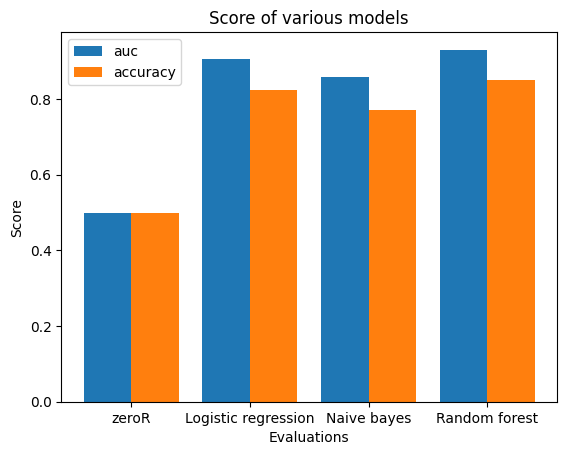

F1:  0.8247943751955349 0.7563483384401966 0.8511287916070662
auc:  [0.5, 0.9053680914965045, 0.8572599150081217, 0.9306606859879382]
accuracy:  [0.5, 0.8231234746363612, 0.7712465771133754, 0.8515401912507297]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

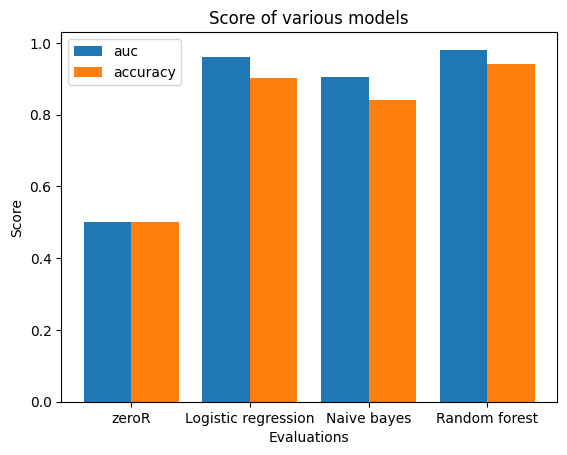

F1:  0.9044679347526338 0.8412958814719276 0.9441885970823146
auc:  [0.5, 0.9615628234866808, 0.9043027133670681, 0.9811332744487828]
accuracy:  [0.5, 0.9033096523633608, 0.841907738940987, 0.9425063938618926]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

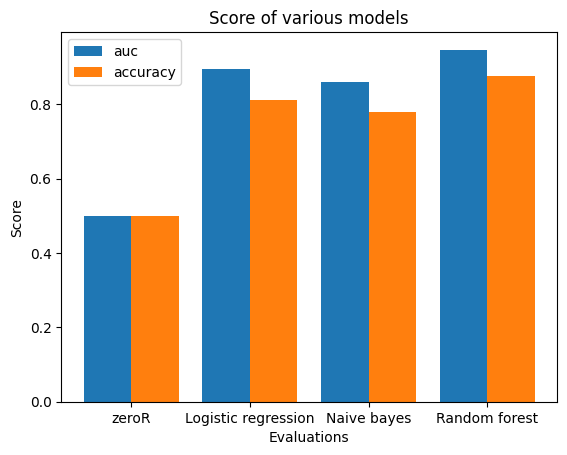

F1:  0.8113539509493227 0.7620346125148523 0.8773416132510289
auc:  [0.5, 0.8947407279333826, 0.8610374022893035, 0.9470378045659857]
accuracy:  [0.5, 0.8111509712617934, 0.7786728953903179, 0.8764244566492628]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

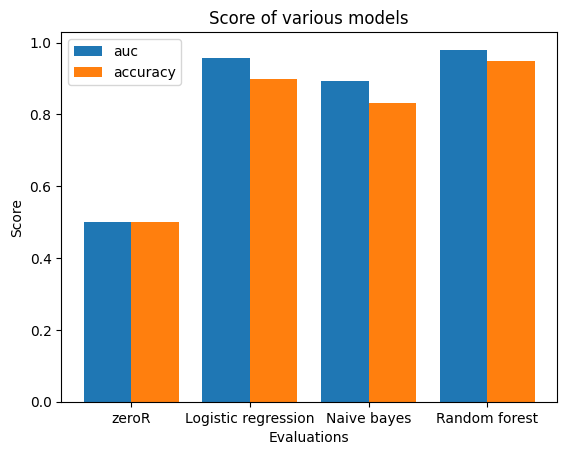

F1:  0.8992013187798775 0.8278474755169271 0.9491003253346739
auc:  [0.5, 0.956708391334857, 0.8924021305399709, 0.9801469948721871]
accuracy:  [0.5, 0.8982510167140741, 0.8323573661816216, 0.947682126989351]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

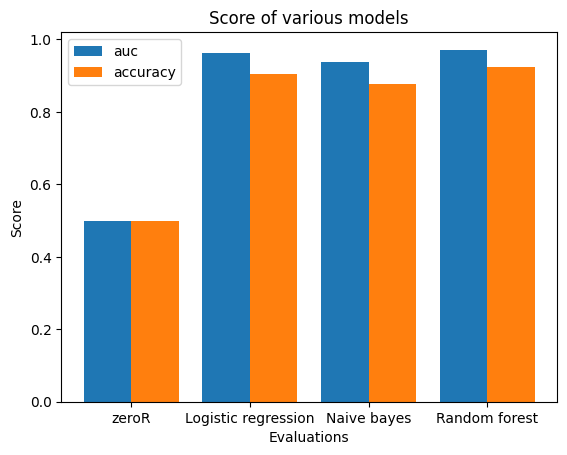

F1:  0.9070576479499963 0.879545594664416 0.9268631959070639
auc:  [0.5, 0.9626476481769018, 0.9371627997612131, 0.9715172161335025]
accuracy:  [0.5, 0.9045271707386958, 0.8771106776429618, 0.9246562560841662]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

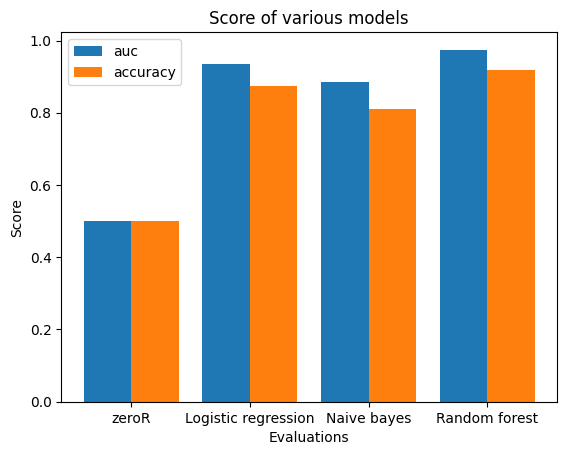

F1:  0.8748540112296941 0.8048908176667273 0.9196280603377707
auc:  [0.5, 0.9339284436134592, 0.8854674466755352, 0.9745292101799188]
accuracy:  [0.5, 0.8733928468748203, 0.8112206026105457, 0.917354522454143]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

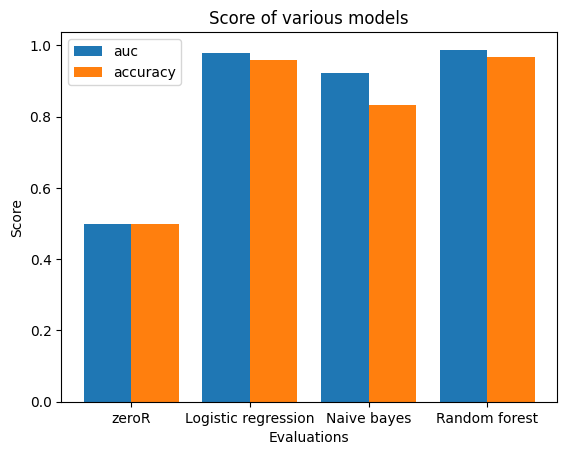

F1:  0.9605823803606243 0.8610150662152144 0.9690140845070422
auc:  [0.5, 0.97840609715846, 0.923575179284064, 0.9880637321091007]
accuracy:  [0.5, 0.9596079658012721, 0.8329475549994787, 0.968282765092274]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

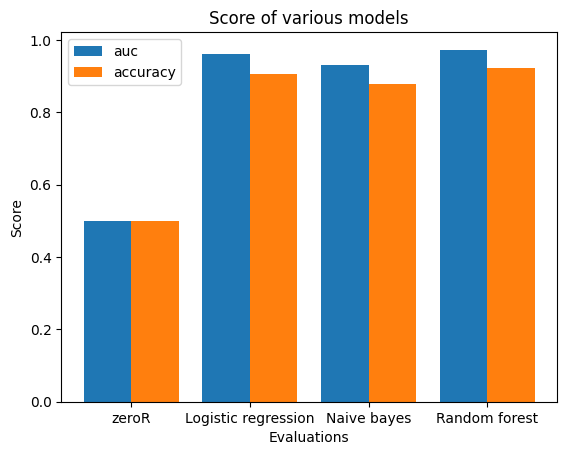

F1:  0.9094154636688516 0.8825408087978978 0.925889432483743
auc:  [0.5, 0.9623160889043549, 0.9323278948208392, 0.9732890523620527]
accuracy:  [0.5, 0.9066128071916408, 0.8785133383923881, 0.9230424376860662]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

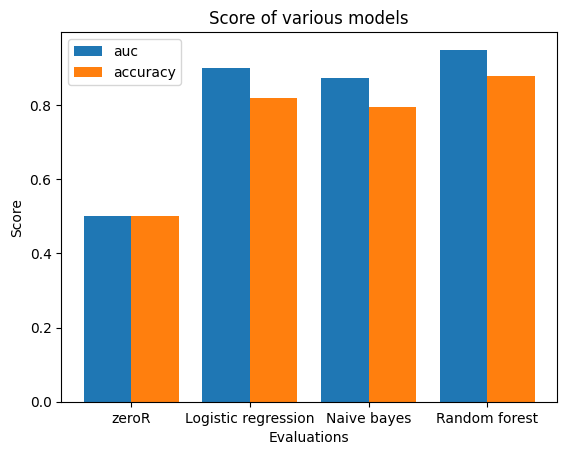

F1:  0.8223353932221108 0.7851935300191104 0.8789239562840164
auc:  [0.5, 0.9009834574734907, 0.8723252580419917, 0.9490986242944]
accuracy:  [0.5, 0.8201996529556297, 0.7939295603947039, 0.8769994058322997]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never 

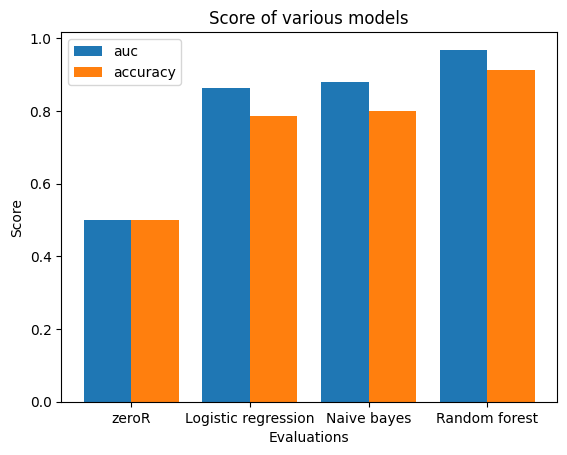

F1:  0.790001218824078 0.7851029063414741 0.9147821707154781
auc:  [0.5, 0.8645480750437353, 0.8812029872715208, 0.9689611727091754]
accuracy:  [0.5, 0.7856665010763372, 0.7998668653750621, 0.9137565822155986]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

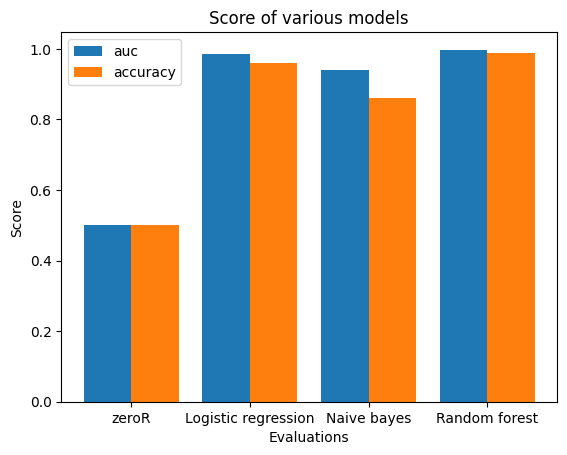

F1:  0.9604628879748803 0.8316250229667871 0.9892185007974481
auc:  [0.5, 0.9866059180873996, 0.9397511267881639, 0.9977513227513227]
accuracy:  [0.5, 0.9597306397306398, 0.8600673400673401, 0.989023569023569]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

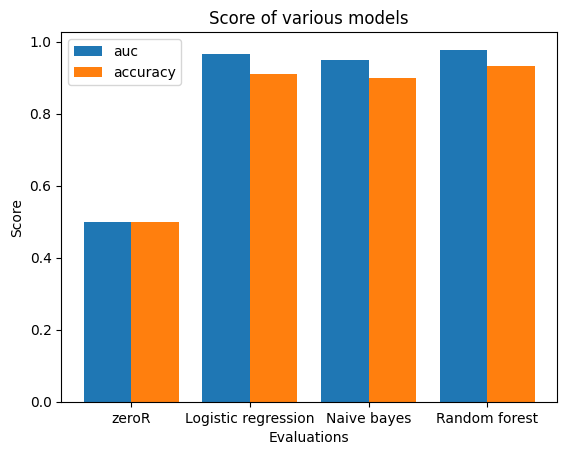

F1:  0.9123813387947892 0.9016059225548058 0.933589306448718
auc:  [0.5, 0.9662347947644991, 0.9481148470577397, 0.9776534651847264]
accuracy:  [0.5, 0.9096535034341908, 0.8980620252633346, 0.9314113055520584]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

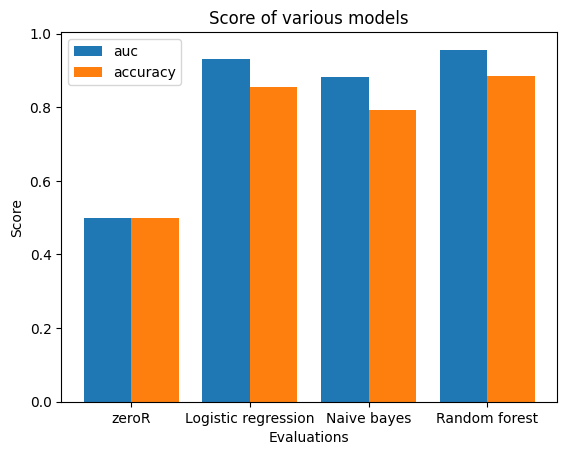

F1:  0.8561575029416847 0.7827717270699265 0.8870787627175855
auc:  [0.5, 0.9299995545049039, 0.8807670282646742, 0.9559518294440125]
accuracy:  [0.5, 0.854711498547115, 0.7927267753604474, 0.8854137613748749]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

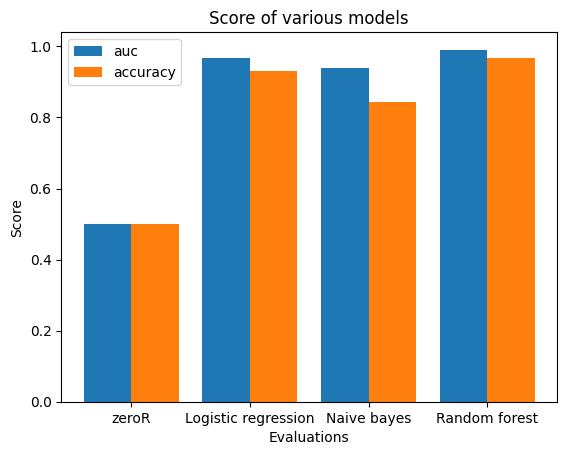

F1:  0.9309183459434827 0.8644679937174731 0.9689532629115903
auc:  [0.5, 0.9679159230616696, 0.9400753519730319, 0.9907264194593166]
accuracy:  [0.5, 0.9300813008130081, 0.8439024390243902, 0.9682926829268292]


In [179]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_fiveten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
     'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_fiveten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_fiveten_lada_c[(niddm_na_fiveten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Ten+ years

##### Questionnaire only

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

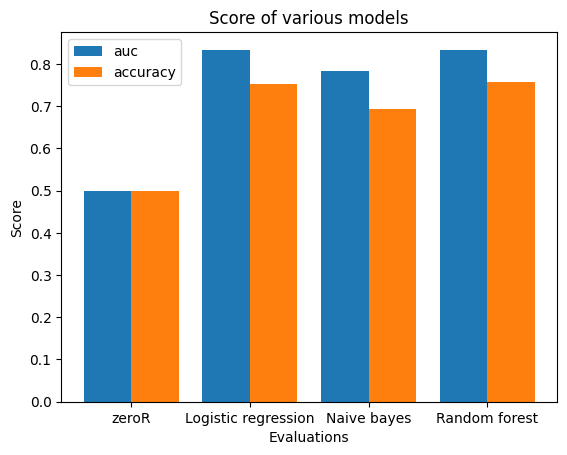

F1:  0.7578053407354314 0.6594895580191672 0.7696117765629819
auc:  [0.5, 0.8328919764588626, 0.7825466282766368, 0.8335174247531788]
accuracy:  [0.5, 0.753236017091128, 0.6927775850429897, 0.7568916524092343]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

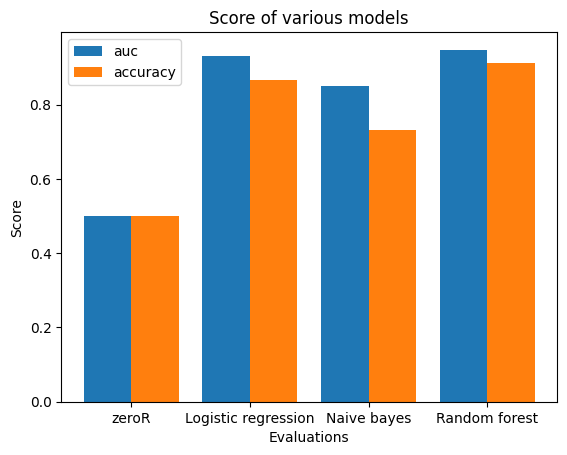

F1:  0.8671450090109476 0.7502826929711752 0.9144021840001135
auc:  [0.5, 0.9303734983746597, 0.8500366416377447, 0.9477142524094185]
accuracy:  [0.5, 0.8648982637498636, 0.7328631747533942, 0.9107323554034871]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

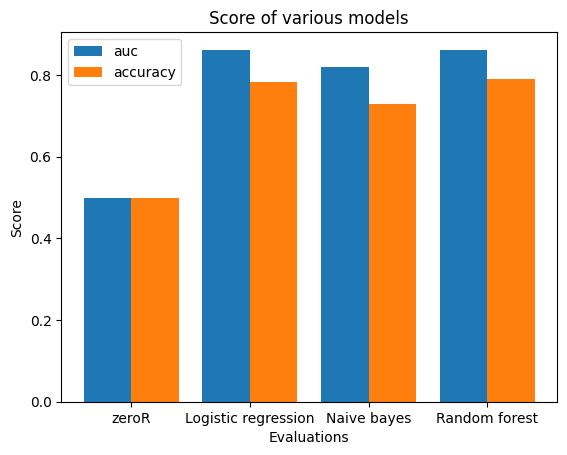

F1:  0.7880633669559288 0.70845220510277 0.8015295273298274
auc:  [0.5, 0.861649623458113, 0.8193385117297187, 0.8620637747628157]
accuracy:  [0.5, 0.7822484144539763, 0.7283048873724965, 0.7893419473851755]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                        

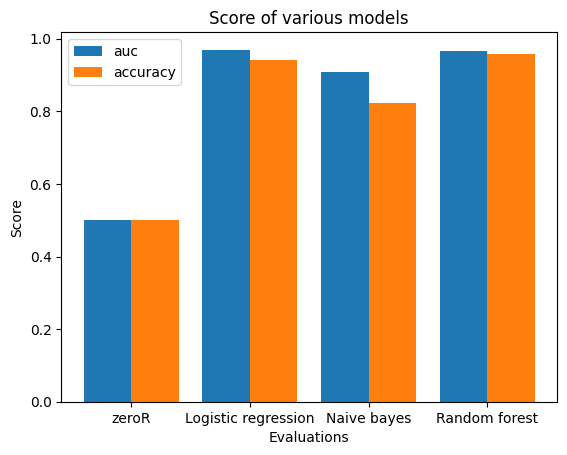

F1:  0.942292714459142 0.8019874156678293 0.9605891211999502
auc:  [0.5, 0.9698382351484414, 0.90761770795154, 0.9672988340647257]
accuracy:  [0.5, 0.9405620744603795, 0.823076923076923, 0.9592061422569897]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

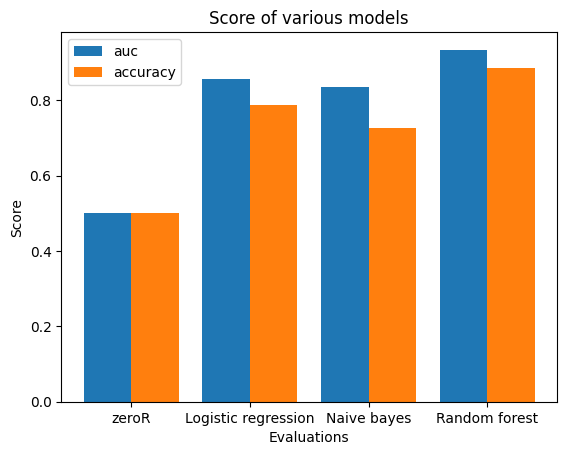

F1:  0.791605082842548 0.6902791455690671 0.8923559072171575
auc:  [0.5, 0.8576495194019225, 0.8344695621217515, 0.9346030615877536]
accuracy:  [0.5, 0.7877358490566038, 0.7254716981132076, 0.8867924528301887]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

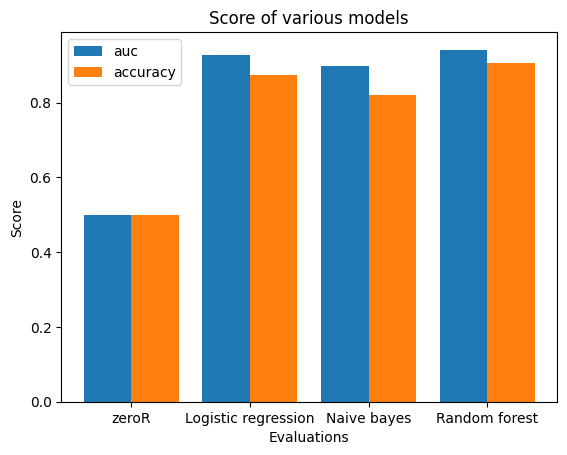

F1:  0.8784889525862003 0.7982544797995997 0.911196763657299
auc:  [0.5, 0.9284184864058496, 0.8983460320260149, 0.9413572739606157]
accuracy:  [0.5, 0.8728718363170166, 0.8200452349250833, 0.9062741655086604]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

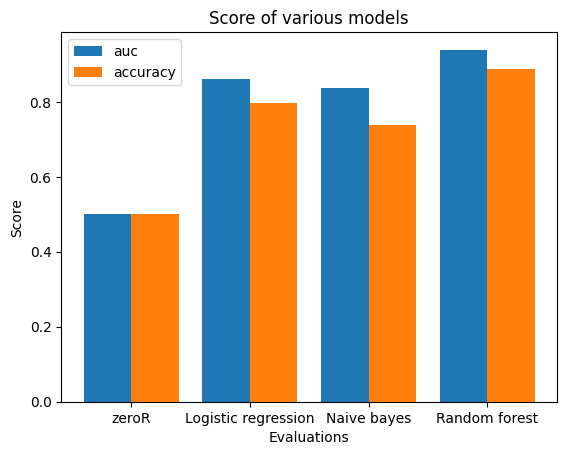

F1:  0.80055799464116 0.7206359284706636 0.8919563604406489
auc:  [0.5, 0.8599220213033704, 0.8363243269316906, 0.939015599348843]
accuracy:  [0.5, 0.797580657234823, 0.7384849165356688, 0.8884048207201137]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         

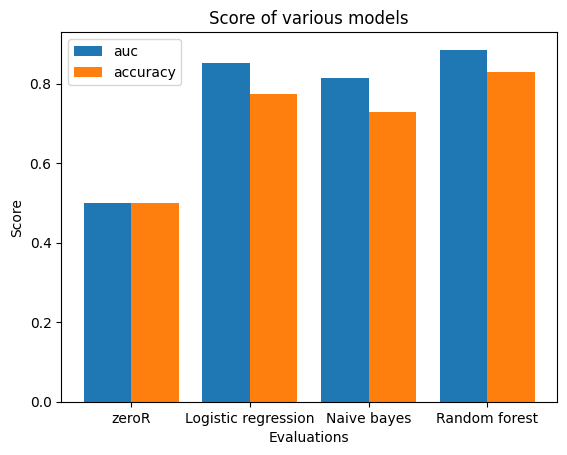

F1:  0.7759289122077423 0.7055478576798402 0.8391453336632347
auc:  [0.5, 0.851939597002928, 0.8132500699476096, 0.8849348309534824]
accuracy:  [0.5, 0.7723689851785664, 0.7273485300776131, 0.8278614101798687]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

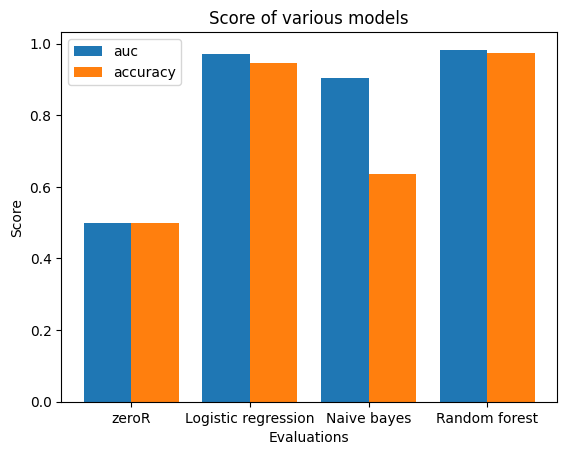

F1:  0.9474850946347069 0.7406767580537031 0.9753405605324061
auc:  [0.5, 0.9717567966903073, 0.9028904403073286, 0.9830692228132387]
accuracy:  [0.5, 0.9454385964912281, 0.6366666666666666, 0.9747807017543859]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

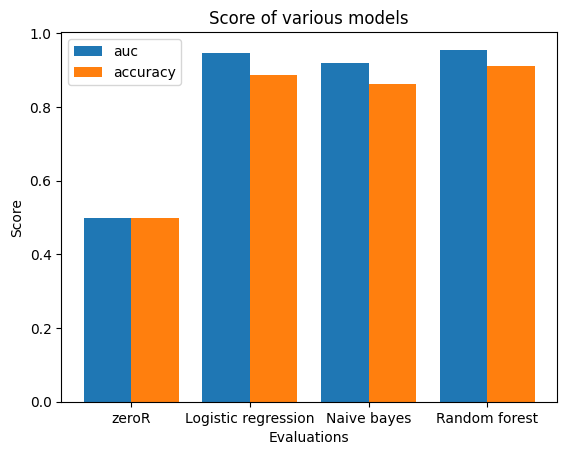

F1:  0.890860832084075 0.8706749614343878 0.9147356689908503
auc:  [0.5, 0.9467187086106005, 0.9183966054815476, 0.9555890066314776]
accuracy:  [0.5, 0.8866657739490109, 0.8635317398323179, 0.9105660573868667]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

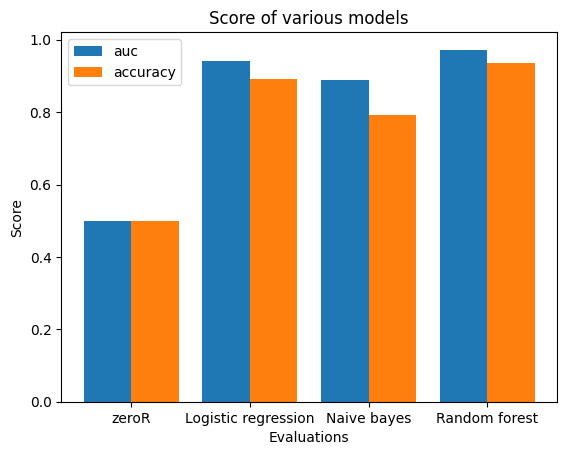

F1:  0.8943399404341097 0.7830843295700974 0.9368894855384664
auc:  [0.5, 0.9405609081854585, 0.8889624875500539, 0.9725272882492835]
accuracy:  [0.5, 0.8906933019976498, 0.792262044653349, 0.9350705052878966]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

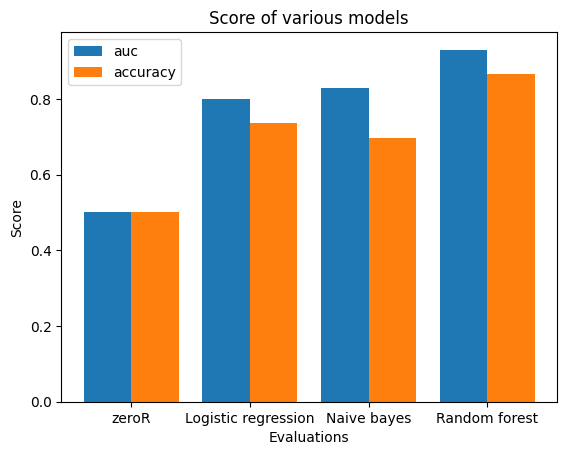

F1:  0.7420539210765521 0.6336122336395503 0.8728609998972199
auc:  [0.5, 0.8001675144109973, 0.8289998290401408, 0.9297867530063176]
accuracy:  [0.5, 0.7360266487012501, 0.6976749756718318, 0.866924170970881]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

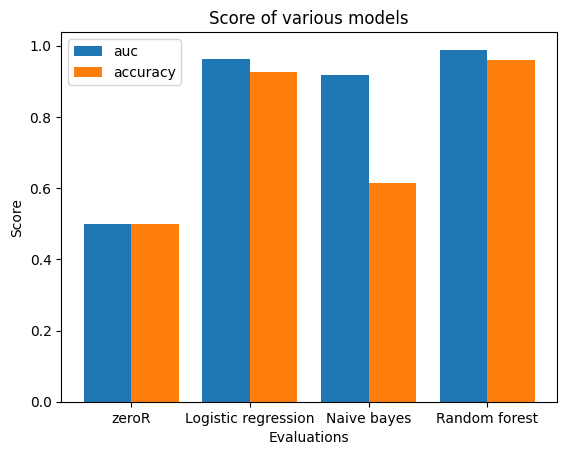

F1:  0.9268350784935957 0.3758012769581179 0.9616382182099295
auc:  [0.5, 0.9627771094689809, 0.9171249355559374, 0.9884859941570716]
accuracy:  [0.5, 0.9249275362318841, 0.614975845410628, 0.9602898550724638]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

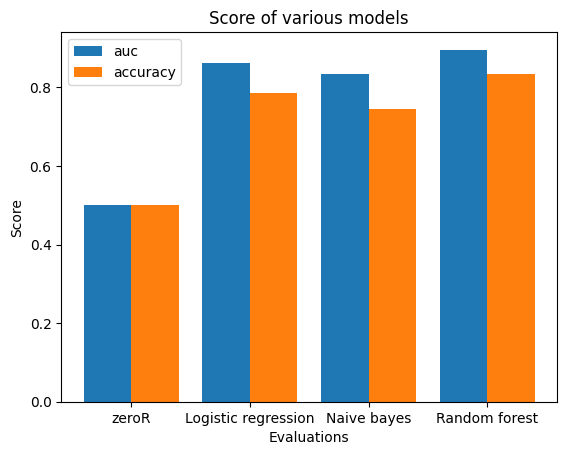

F1:  0.7890370992474616 0.7207868368961217 0.8454069086369231
auc:  [0.5, 0.862337890625, 0.8333330078125001, 0.8956455078125]
accuracy:  [0.5, 0.7846875, 0.74375, 0.835]


In [186]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_ten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_ten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_ten_lada_c[(niddm_na_ten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and hba1c

Number of clusters:  2
Cluster  1  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice a week          0
Alcohol intake frequency. | Instance 0_One to three times a month    0
Alcohol intake frequency. | Instance 0_S

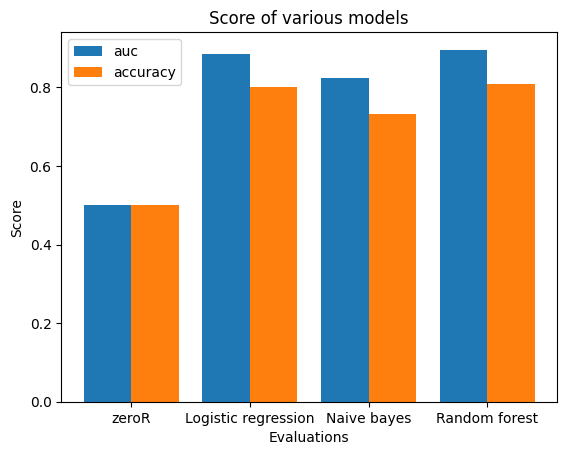

F1:  0.8010222432152735 0.7068341733665214 0.8115815368061234
auc:  [0.5, 0.8856636775155697, 0.8251872211868013, 0.8960157849942286]
accuracy:  [0.5, 0.8003370387831813, 0.7318571825336817, 0.8091966122166181]
Cluster  2  of  2
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

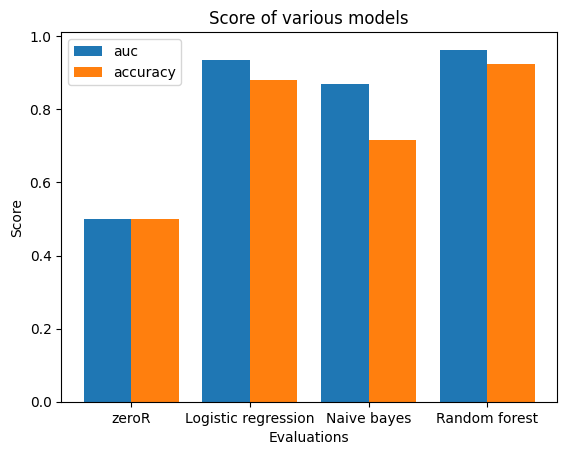

F1:  0.8828099729988019 0.6279114856774431 0.9266452163869449
auc:  [0.5, 0.9361383760672483, 0.870594777796839, 0.9631525884479869]
accuracy:  [0.5, 0.8811833436464893, 0.7159083463764423, 0.9233956975940014]
Number of clusters:  3
Cluster  1  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

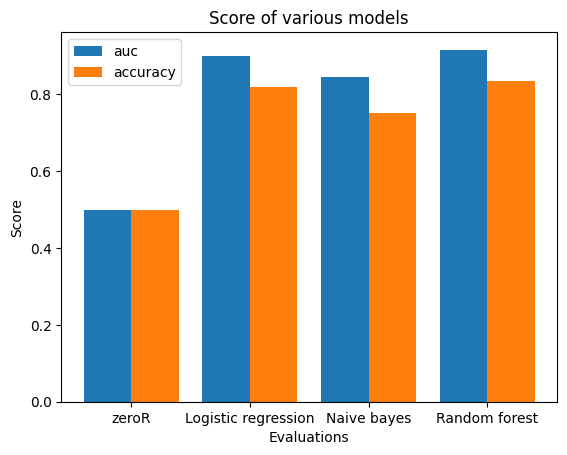

F1:  0.820593876546382 0.730099970727274 0.8379074102487196
auc:  [0.5, 0.900185801361874, 0.8463017550959918, 0.9163474029233709]
accuracy:  [0.5, 0.8183764171965424, 0.7517301565276066, 0.8347046163808467]
Cluster  2  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                        

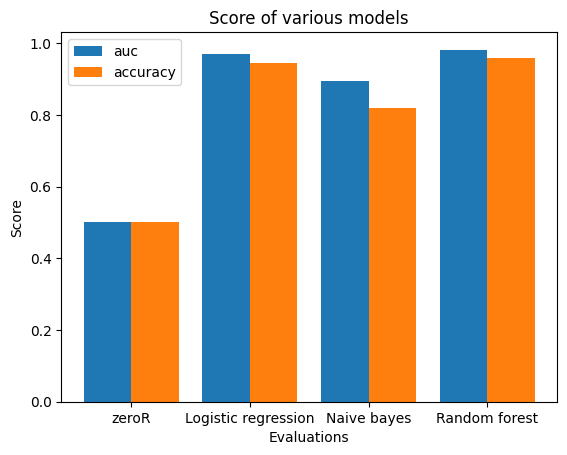

F1:  0.945421831267493 0.8347225100550886 0.9595543056082714
auc:  [0.5, 0.9702711270047252, 0.893412515230463, 0.9814951113928816]
accuracy:  [0.5, 0.9439084456033608, 0.8179776908590468, 0.9592061422569897]
Cluster  3  of  3
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

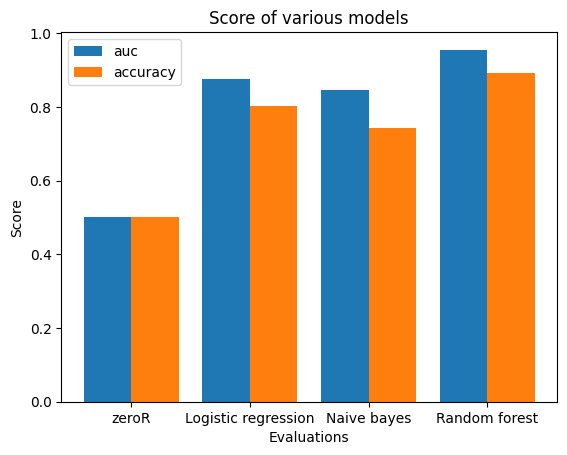

F1:  0.8026534543030216 0.694173539571969 0.8959997477060053
auc:  [0.5, 0.8761925952296191, 0.8467159131363474, 0.9548037557849769]
accuracy:  [0.5, 0.8014150943396227, 0.7419811320754717, 0.8924528301886793]
Number of clusters:  4
Cluster  1  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Neve

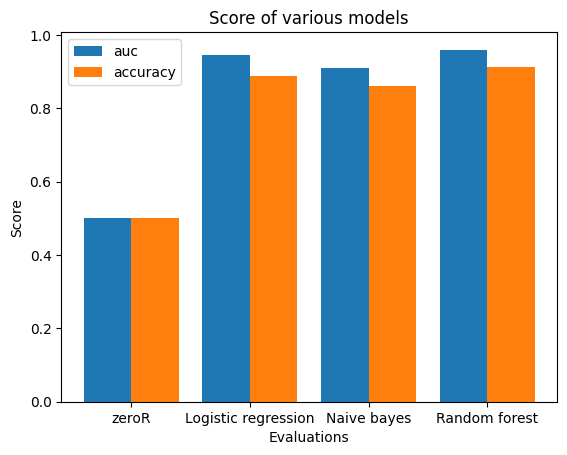

F1:  0.891751172521585 0.8646791368607363 0.9174701392929948
auc:  [0.5, 0.9448473482509988, 0.9091808406200953, 0.9595301963113053]
accuracy:  [0.5, 0.8878697141129478, 0.8612880906559064, 0.9137710694164229]
Cluster  2  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

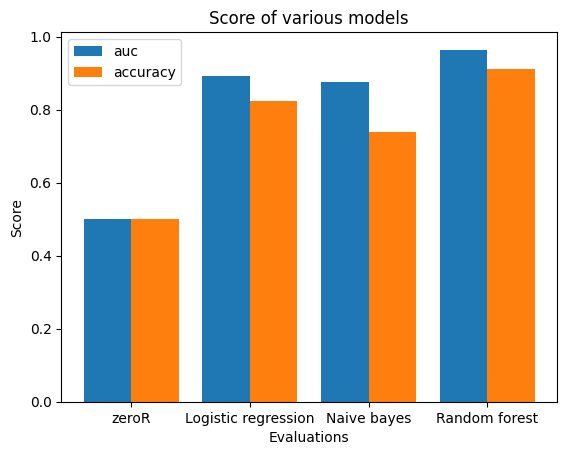

F1:  0.8284515512495303 0.6813276791474056 0.9155891488679895
auc:  [0.5, 0.8933890708413686, 0.875817514624287, 0.9642648611205451]
accuracy:  [0.5, 0.8244194924769819, 0.739089752226963, 0.9124724904558724]
Cluster  3  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

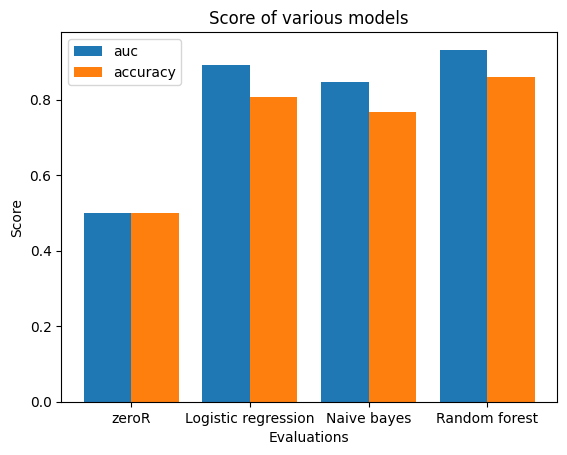

F1:  0.8084297541180812 0.7544762613596827 0.8641970643305413
auc:  [0.5, 0.891764073048745, 0.8464750984015855, 0.9326290127042813]
accuracy:  [0.5, 0.8071927427465531, 0.7672734412251423, 0.8609890572221933]
Cluster  4  of  4
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

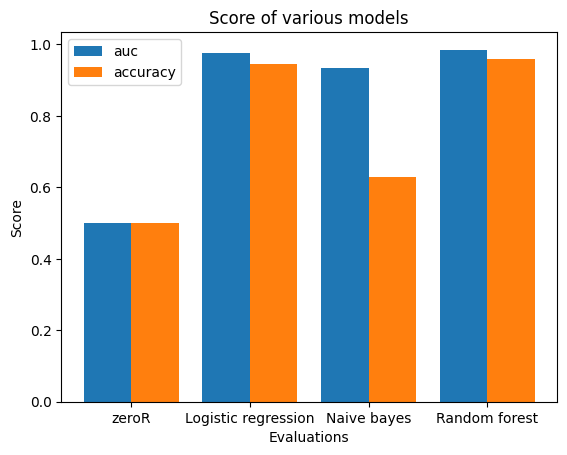

F1:  0.9467562425947047 0.4303096770295175 0.9606186739412812
auc:  [0.5, 0.9773696069739953, 0.9334035165484633, 0.9852910756501182]
accuracy:  [0.5, 0.9453947368421053, 0.6301754385964912, 0.9600877192982457]
Number of clusters:  5
Cluster  1  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Nev

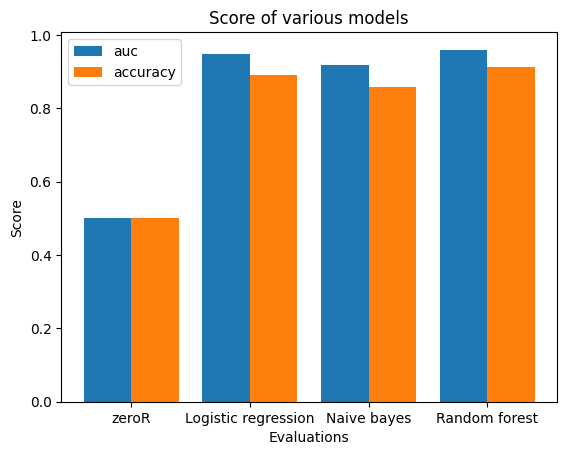

F1:  0.8965728132960686 0.8669385959844162 0.9160163540100498
auc:  [0.5, 0.9485929295581805, 0.9174067917890312, 0.959475358722463]
accuracy:  [0.5, 0.891668712477961, 0.8569777043765483, 0.9121089710685086]
Cluster  2  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

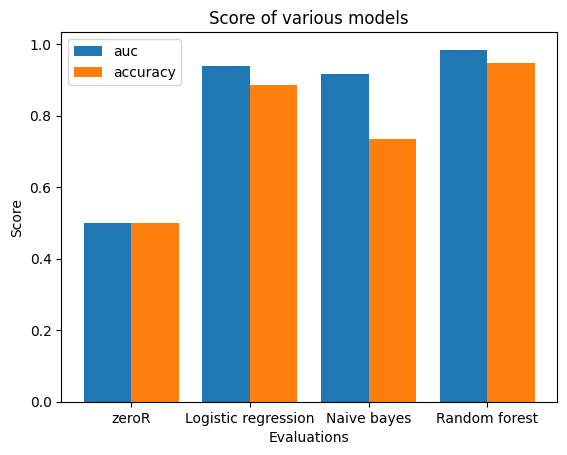

F1:  0.8880665307874189 0.6450578949736545 0.9493601472135821
auc:  [0.5, 0.93887991137671, 0.9174441530987661, 0.9847372553204464]
accuracy:  [0.5, 0.8852820211515864, 0.7349177438307873, 0.9480669800235018]
Cluster  3  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                       

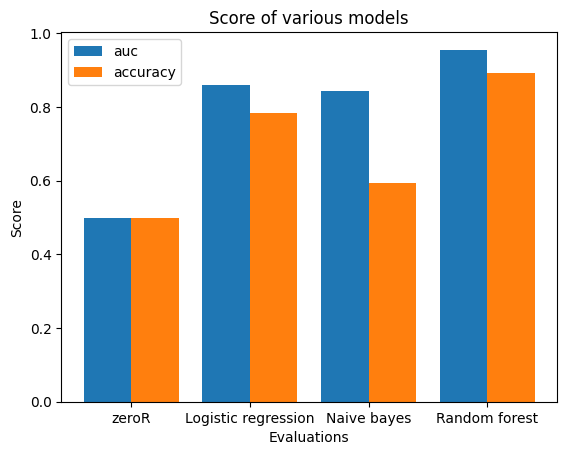

F1:  0.7832248813054359 0.3904089959981516 0.8948584068124685
auc:  [0.5, 0.8587209708682431, 0.8441734681455186, 0.9557353095111761]
accuracy:  [0.5, 0.7831334680739577, 0.5947481098884647, 0.8921191705966015]
Cluster  4  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                     

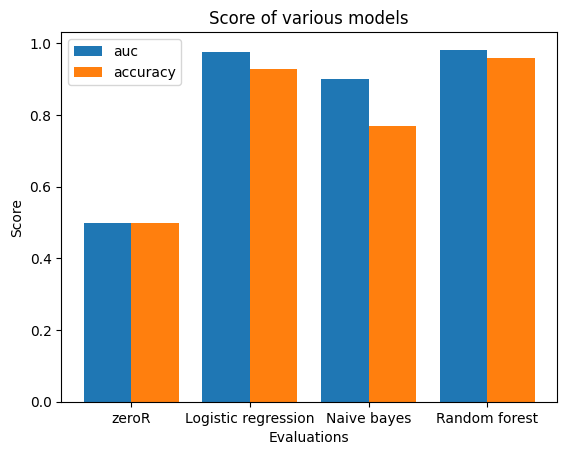

F1:  0.9322025833291857 0.729539641943734 0.9616867098365711
auc:  [0.5, 0.9762502148135419, 0.9019419144182849, 0.9825829180271524]
accuracy:  [0.5, 0.9291787439613527, 0.7701449275362319, 0.9600966183574879]
Cluster  5  of  5
Healthy sampling...
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                      

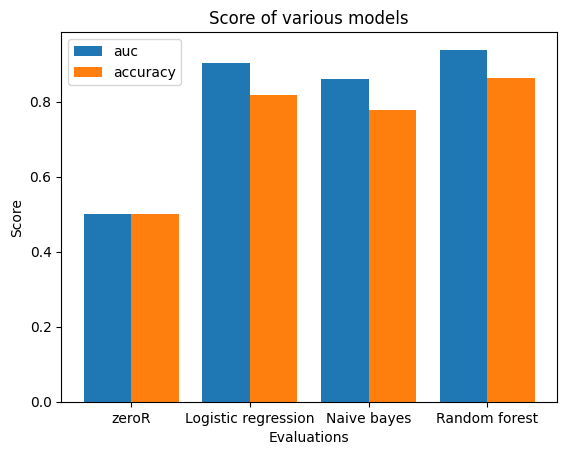

F1:  0.8217046379962559 0.7642360858897448 0.8657082087323681
auc:  [0.5, 0.9030937499999999, 0.8611611328125001, 0.9384638671875]
accuracy:  [0.5, 0.818125, 0.7765625, 0.8625]


In [181]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_ten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
     'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_ten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_ten_lada_c[(niddm_na_ten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


x=-1

for i in clustered_dfs:
    print("Number of clusters: ", len(i))
    x+=1
    y=1
    for j in i:
        print("Cluster ", y ," of ", len(i))
        y+=1
        if j.shape[0] > healthy_na.shape[0]:
        
            print("X: ", x)
            print("Size difference: ", j.shape[0] - healthy_na.shape[0], "\nSampling...") 
            t = healthy_na.sample(n=j.shape[0] - healthy_na.shape[0])
            cohort = pd.concat([healthy_na, t], axis=0)

            
        else:
            print("Healthy sampling...")
            cohort = pd.concat([j, healthy_na.sample(n=j.shape[0])], axis=0)
            
        
        cohort= cohort.sample(frac=1)
        
        cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
        cohort= cohort[[
         'Age at recruitment',
             'Sex_binary',
             'Asian',
             'Black',
             'Chinese',
             'Mixed',
             'Other',
             'White',
             'Alcohol intake frequency. | Instance 0_Daily or almost daily',
             'Alcohol intake frequency. | Instance 0_Never',
             'Alcohol intake frequency. | Instance 0_Once or twice a week',
             'Alcohol intake frequency. | Instance 0_One to three times a month',
             'Alcohol intake frequency. | Instance 0_Special occasions only',
             'Alcohol intake frequency. | Instance 0_Three or four times a week',
             'fmi',
             'Body fat percentage | Instance 0',
             'Waist circumference | Instance 0',
             'Weight | Instance 0',
             'Hip circumference | Instance 0',
             'Whole body fat mass | Instance 0',
             'Basal metabolic rate | Instance 0',
             'Trunk fat percentage | Instance 0',
             'Arm fat percentage (left) | Instance 0',
             'Leg fat percentage (left) | Instance 0',
             'Diastolic blood pressure',
             'Systolic blood pressure',
             'Illnesses of father',
             'Illnesses of mother',
             'Illnesses of siblings',
             'father_stroke',
             'mother_stroke',
             'sibling_stroke',
             'father_alzheimer',
             'mother_alzheimer',
             'sibling_alzheimer',
             'father_bloodpressure',
             'mother_bloodpressure',
             'sibling_bloodpressure',
             'father_heart',
             'mother_heart',
             'sibling_heart',
             'father_parkinson',
             'mother_parkinson',
             'sibling_parkinson',
             'Sleep duration | Instance 0',
             'Tobacco smoking_Ex-smoker',
             'Tobacco smoking_Never smoked',
             'Tobacco smoking_Occasionally',
             'Tobacco smoking_Smokes on most or all days',
             'Summed MET minutes per week for all activity | Instance 0',
             'Summed minutes activity | Instance 0',
            'Glycated haemoglobin (HbA1c) | Instance 0',
            "cluster_"+str(x)
         ]]

        print("MinMax")
        mms = MinMaxScaler()
        mms.fit(cohort)
        data_transformed = mms.transform(cohort)
        cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())

        print("modeling...")
        emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

### Diabetic cross-prediction

#### One Year

##### Questionnaire only

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  -715 
Sampling...
Shape j:  (152, 62)
Shape i:  (867, 62)
Cohort shape:  (304, 62)
value_counts:  0    152
1    152
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intak

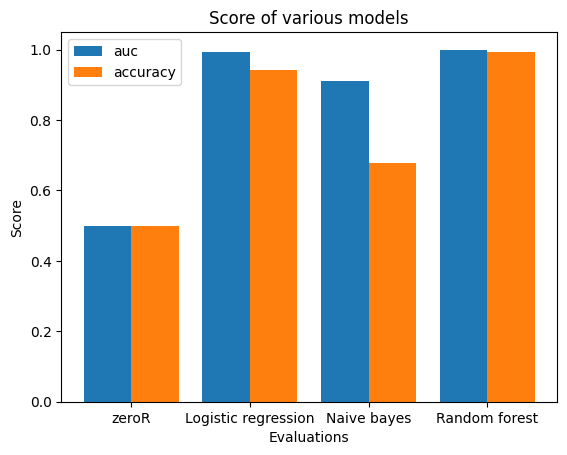

F1:  0.9425332959639481 0.5349439171699741 0.9933314809669352
auc:  [0.5, 0.9917634408602151, 0.9094480286738351, 0.9994444444444445]
accuracy:  [0.5, 0.9408743169398907, 0.6783060109289618, 0.9933879781420765]
Y:  1
X:  1
Q:  1
Size difference:  -235 
Sampling...
Shape j:  (147, 62)
Shape i:  (382, 62)
Cohort shape:  (294, 62)
value_counts:  0    147
1    147
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

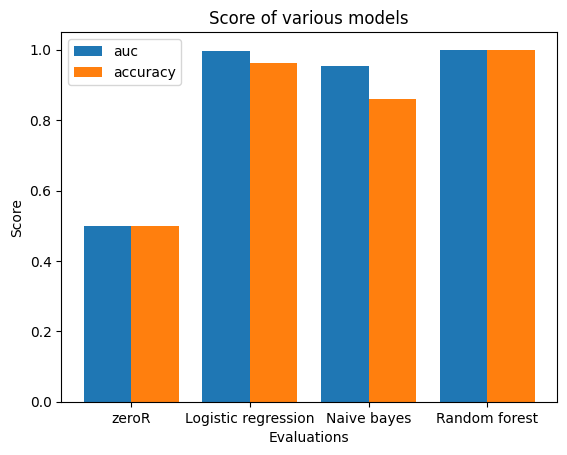

F1:  0.9630101423462483 0.8731885713668878 1.0
auc:  [0.5, 0.9953230281411019, 0.9539437177962743, 1.0]
accuracy:  [0.5, 0.9625365283459965, 0.8603740502630041, 1.0]
Y:  1
X:  1
Q:  2
Size difference:  -343 
Sampling...
Shape j:  (147, 62)
Shape i:  (490, 62)
Cohort shape:  (294, 62)
value_counts:  0    147
2    147
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instanc

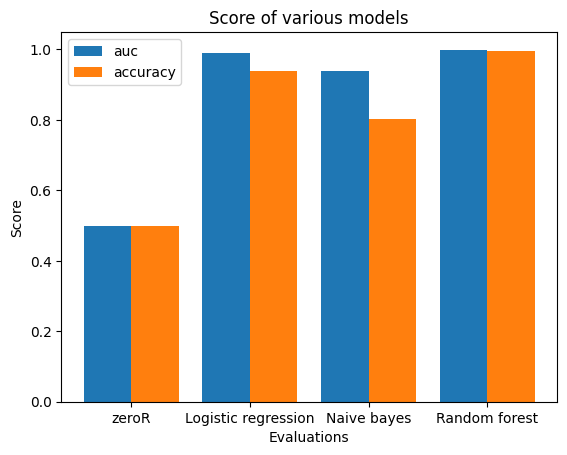

F1:  0.9385991302618678 0.8179664465266353 0.9964912280701754
auc:  [0.5, 0.9891874752279033, 0.9383908045977012, 0.9993103448275862]
accuracy:  [0.5, 0.9388077147866745, 0.8026300409117475, 0.9966101694915255]
Y:  2
X:  1
Q:  2
Size difference:  -108 
Sampling...
Shape j:  (382, 62)
Shape i:  (490, 62)
Cohort shape:  (764, 62)
value_counts:  1    382
2    382
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

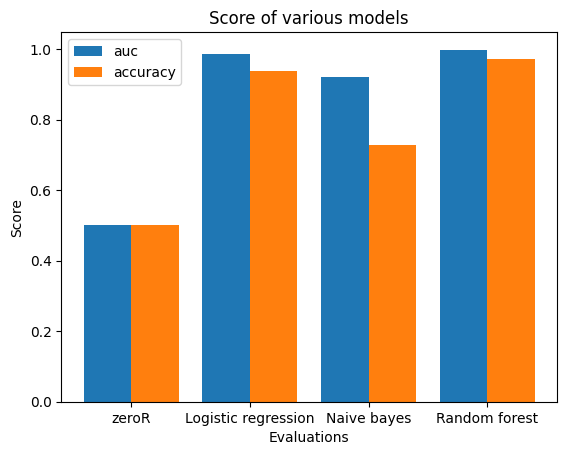

F1:  0.9365802780750746 0.627266909181894 0.9722491343153595
auc:  [0.5, 0.9853693743929202, 0.9212239630175918, 0.9979638090441414]
accuracy:  [0.5, 0.9384760921912625, 0.7291279669762643, 0.9725146198830409]
Y:  1
X:  2
Q:  1
Size difference:  -212 
Sampling...
Shape j:  (76, 62)
Shape i:  (288, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
1    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                            

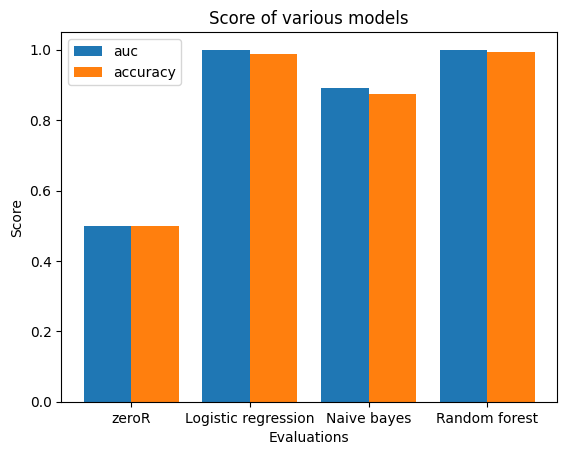

F1:  0.9870967741935484 0.8594137401345411 0.9935483870967742
auc:  [0.5, 1.0, 0.8918888888888888, 1.0]
accuracy:  [0.5, 0.9868817204301076, 0.8754838709677419, 0.9935483870967742]
Y:  1
X:  2
Q:  2
Size difference:  -129 
Sampling...
Shape j:  (76, 62)
Shape i:  (205, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
2    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequenc

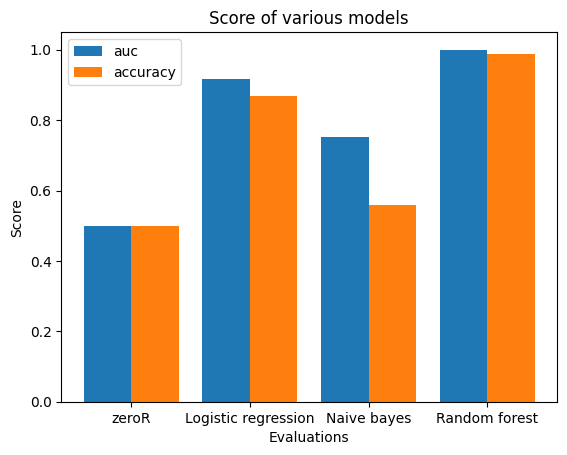

F1:  0.871737154261037 0.6922086458775613 0.9875
auc:  [0.5, 0.9176666666666667, 0.7518333333333334, 1.0]
accuracy:  [0.5, 0.8683870967741936, 0.5595698924731183, 0.9866666666666667]
Y:  1
X:  2
Q:  3
Size difference:  -374 
Sampling...
Shape j:  (76, 62)
Shape i:  (450, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
3    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake freque

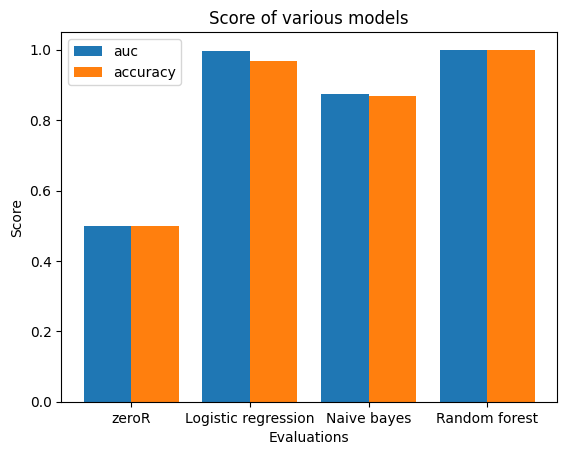

F1:  0.967741935483871 0.854225085259568 1.0
auc:  [0.5, 0.9966666666666667, 0.8728611111111111, 1.0]
accuracy:  [0.5, 0.9675268817204301, 0.8696774193548387, 1.0]
Y:  2
X:  2
Q:  2
Size difference:  83 
Sampling...
Cohort shape:  (410, 62)
value_counts:  1    205
2    205
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol 

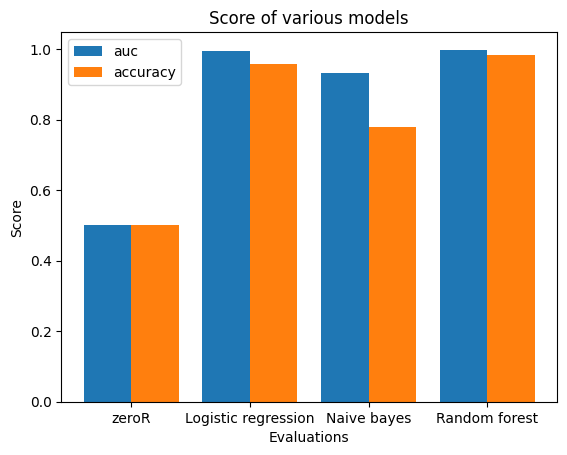

F1:  0.9577584091322899 0.7610789288388299 0.9830128618746505
auc:  [0.5, 0.9938132064247471, 0.933194527067222, 0.9986912552052349]
accuracy:  [0.5, 0.9585365853658536, 0.7804878048780488, 0.9829268292682927]
Y:  2
X:  2
Q:  3
Size difference:  -162 
Sampling...
Shape j:  (288, 62)
Shape i:  (450, 62)
Cohort shape:  (576, 62)
value_counts:  1    288
3    288
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

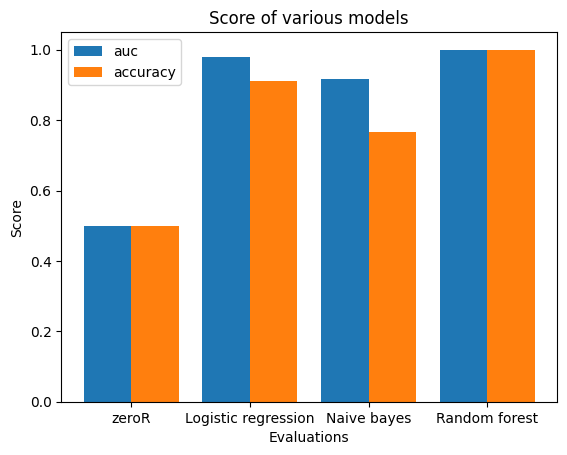

F1:  0.9086465819983158 0.7635418856858297 0.9982608695652174
auc:  [0.5, 0.9798183031896031, 0.9156001627135616, 1.0]
accuracy:  [0.5, 0.9114542728635682, 0.7675712143928036, 0.9982758620689656]
Y:  3
X:  2
Q:  3
Size difference:  -245 
Sampling...
Shape j:  (205, 62)
Shape i:  (450, 62)
Cohort shape:  (410, 62)
value_counts:  2    205
3    205
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcoh

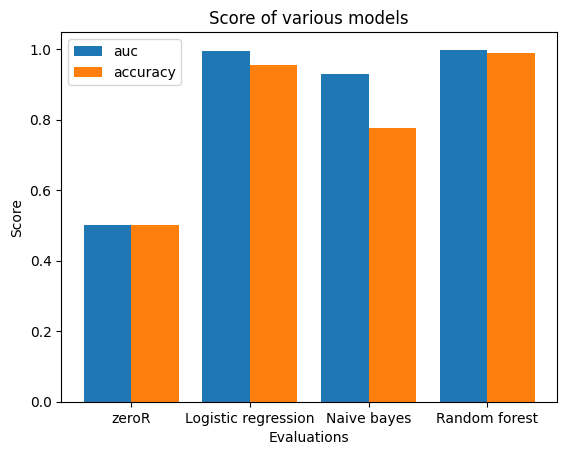

F1:  0.9563276722841813 0.6694003140991093 0.9876520898408448
auc:  [0.5, 0.9938132064247471, 0.9279595478881618, 0.9980963712076145]
accuracy:  [0.5, 0.9560975609756097, 0.775609756097561, 0.9878048780487805]
Y:  1
X:  3
Q:  1
Size difference:  -241 
Sampling...
Shape j:  (41, 62)
Shape i:  (282, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
1    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                             

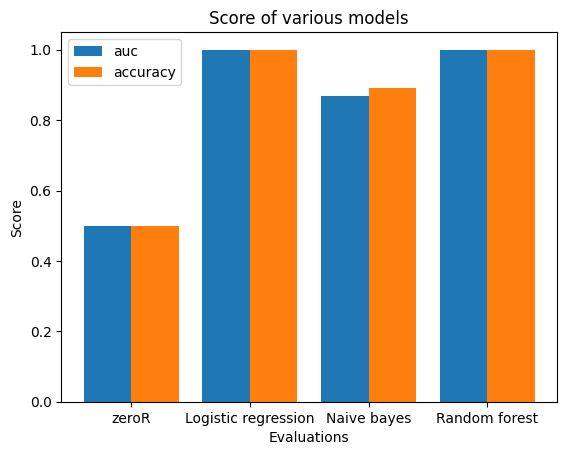

F1:  1.0 0.8864705882352941 1.0
auc:  [0.5, 1.0, 0.8680555555555556, 1.0]
accuracy:  [0.5, 1.0, 0.8904411764705882, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  -141 
Sampling...
Shape j:  (41, 62)
Shape i:  (182, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
2    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intak

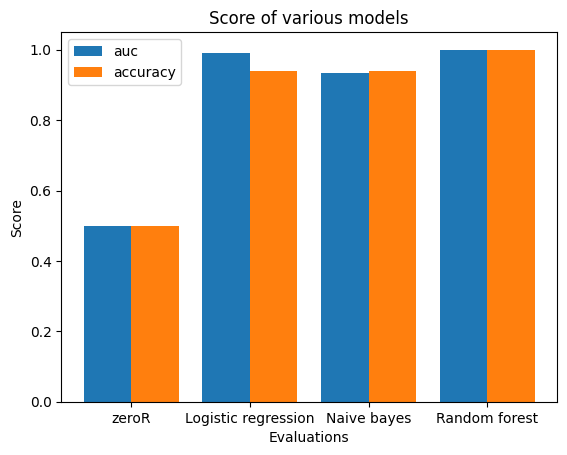

F1:  0.9409150326797385 0.9378070175438596 1.0
auc:  [0.5, 0.9916666666666667, 0.9338541666666667, 1.0]
accuracy:  [0.5, 0.9397058823529412, 0.9389705882352941, 1.0]
Y:  1
X:  3
Q:  3
Size difference:  -370 
Sampling...
Shape j:  (41, 62)
Shape i:  (411, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
3    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_

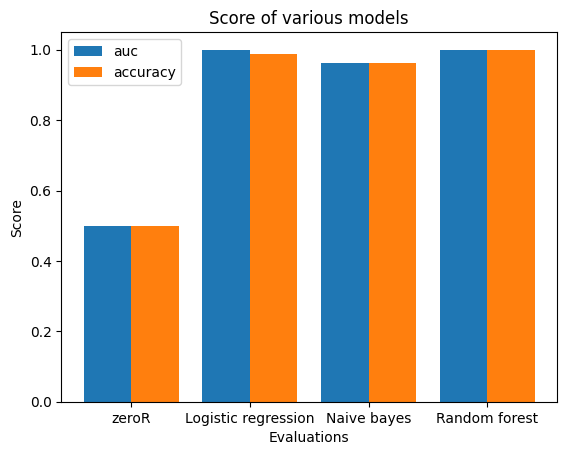

F1:  0.9882352941176471 0.968421052631579 1.0
auc:  [0.5, 1.0, 0.9625, 1.0]
accuracy:  [0.5, 0.9875, 0.9625, 1.0]
Y:  1
X:  3
Q:  4
Size difference:  -62 
Sampling...
Shape j:  (41, 62)
Shape i:  (103, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
4    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake freque

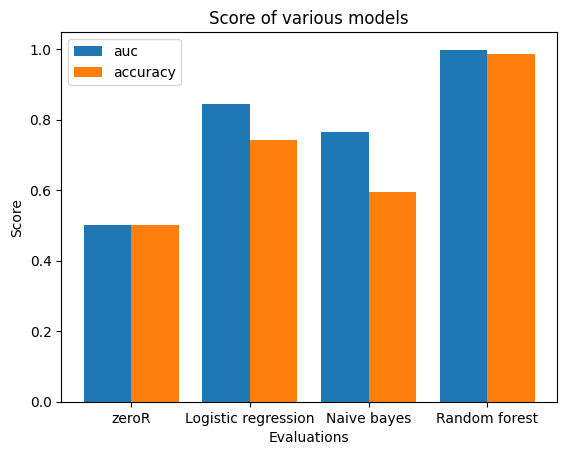

F1:  0.7625214998280013 0.7031655225019069 0.9866666666666667
auc:  [0.5, 0.8458333333333333, 0.7657986111111111, 0.9984375]
accuracy:  [0.5, 0.7419117647058824, 0.5955882352941176, 0.9875]
Y:  2
X:  3
Q:  2
Size difference:  100 
Sampling...
Cohort shape:  (364, 62)
value_counts:  1    182
2    182
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almo

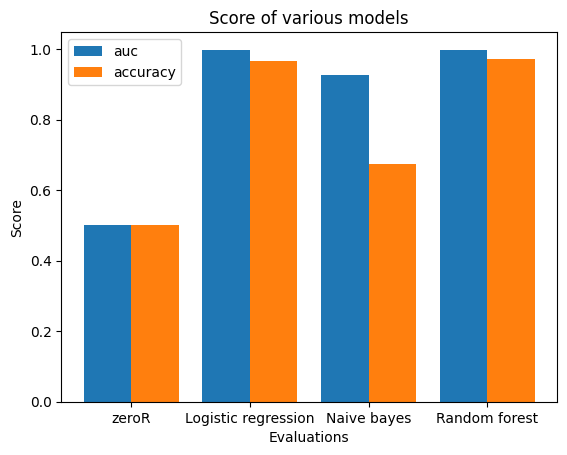

F1:  0.9673247533247533 0.4806116111021045 0.9717907650815687
auc:  [0.5, 0.9964964964964965, 0.9261553219886554, 0.9984150817484151]
accuracy:  [0.5, 0.9670091324200913, 0.6753044140030441, 0.9725646879756469]
Y:  2
X:  3
Q:  3
Size difference:  -129 
Sampling...
Shape j:  (282, 62)
Shape i:  (411, 62)
Cohort shape:  (564, 62)
value_counts:  1    282
3    282
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

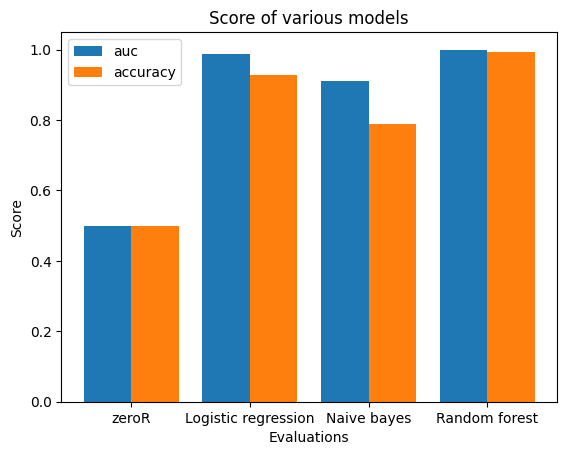

F1:  0.9276702968086425 0.7536443308379913 0.9928876244665717
auc:  [0.5, 0.9864605710705335, 0.9099724758324382, 0.9998109112065879]
accuracy:  [0.5, 0.9290455120101138, 0.7890802781289507, 0.9929045512010114]
Y:  2
X:  3
Q:  4
Size difference:  179 
Sampling...
Cohort shape:  (206, 62)
value_counts:  1    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

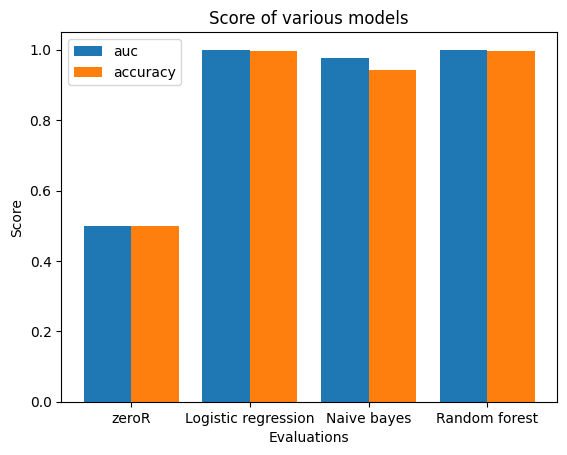

F1:  0.9948717948717949 0.9392900856793146 0.9953488372093023
auc:  [0.5, 1.0, 0.9771428571428571, 1.0]
accuracy:  [0.5, 0.9951219512195122, 0.9415795586527294, 0.9952380952380953]
Y:  3
X:  3
Q:  3
Size difference:  -229 
Sampling...
Shape j:  (182, 62)
Shape i:  (411, 62)
Cohort shape:  (364, 62)
value_counts:  2    182
3    182
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequ

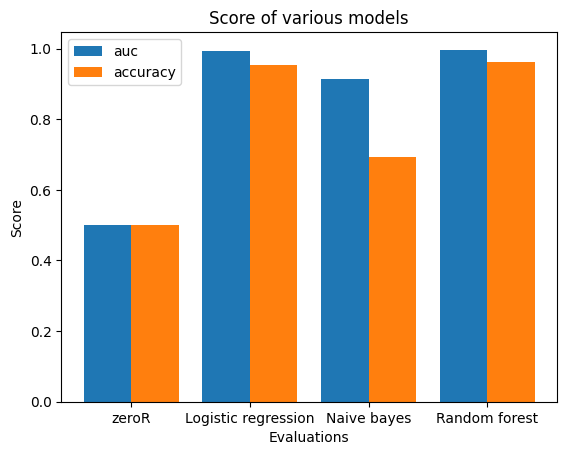

F1:  0.9519837992035907 0.7551733833177132 0.9615086143609688
auc:  [0.5, 0.9928678678678678, 0.9143956456456457, 0.9966925258591924]
accuracy:  [0.5, 0.9531582952815829, 0.6919710806697108, 0.9615677321156773]
Y:  3
X:  3
Q:  4
Size difference:  79 
Sampling...
Cohort shape:  (206, 62)
value_counts:  2    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Inst

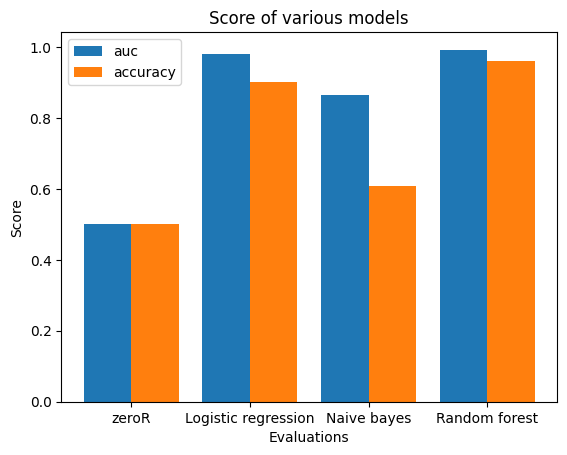

F1:  0.8982985191063526 0.707490165229243 0.9599140965114038
auc:  [0.5, 0.979047619047619, 0.863514739229025, 0.9921541950113378]
accuracy:  [0.5, 0.902555168408827, 0.6075493612078978, 0.9610917537746806]
Y:  4
X:  3
Q:  4
Size difference:  308 
Sampling...
Cohort shape:  (206, 62)
value_counts:  3    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instanc

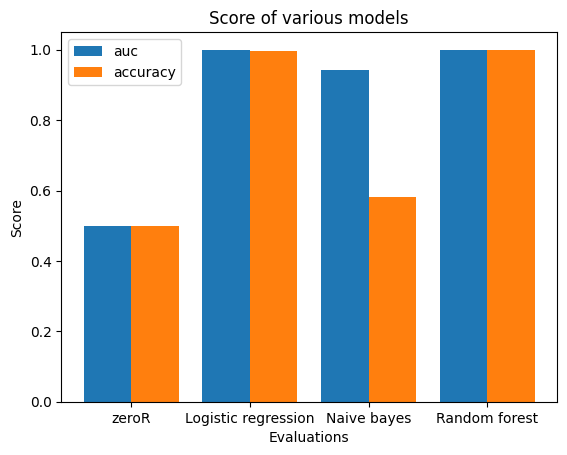

F1:  0.9948717948717949 0.7072955613076407 1.0
auc:  [0.5, 1.0, 0.9416666666666667, 1.0]
accuracy:  [0.5, 0.9951219512195122, 0.5826945412311266, 1.0]


In [239]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_one_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_one_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_one_lada_c[(niddm_na_one_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and HBA1C

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  -715 
Sampling...
Shape j:  (152, 62)
Shape i:  (867, 62)
Cohort shape:  (304, 62)
value_counts:  0    152
1    152
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intak

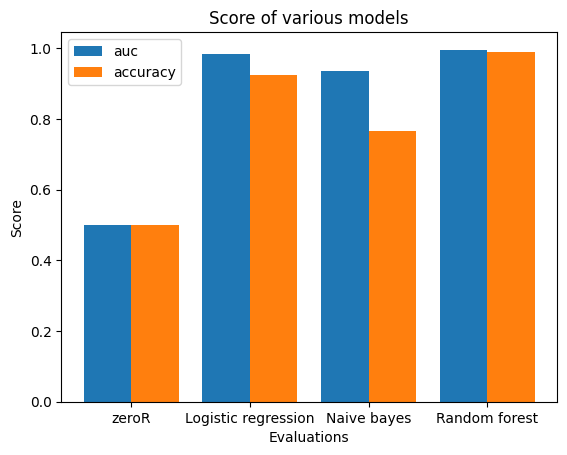

F1:  0.9250788443680734 0.8026383282604626 0.9899416504584606
auc:  [0.5, 0.9850537634408603, 0.9370322580645161, 0.9959139784946236]
accuracy:  [0.5, 0.9242622950819672, 0.766775956284153, 0.9901639344262295]
Y:  1
X:  1
Q:  1
Size difference:  -235 
Sampling...
Shape j:  (147, 62)
Shape i:  (382, 62)
Cohort shape:  (294, 62)
value_counts:  0    147
1    147
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

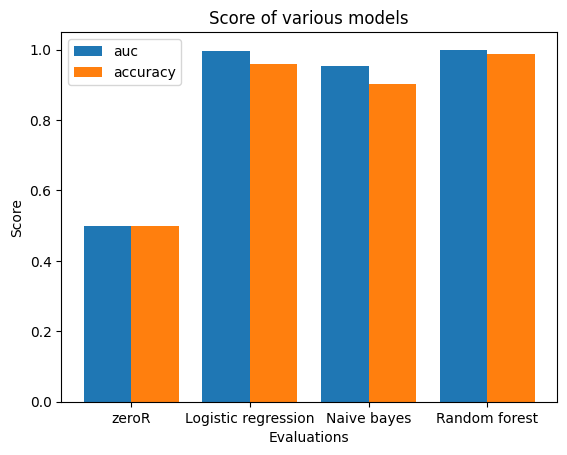

F1:  0.9602764080652204 0.9095135165468113 0.9857010785824345
auc:  [0.5, 0.996995640110979, 0.9522195798652399, 0.9997621878715814]
accuracy:  [0.5, 0.9592051431911164, 0.9011104617182935, 0.9863822326125073]
Y:  1
X:  1
Q:  2
Size difference:  -343 
Sampling...
Shape j:  (147, 62)
Shape i:  (490, 62)
Cohort shape:  (294, 62)
value_counts:  0    147
2    147
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

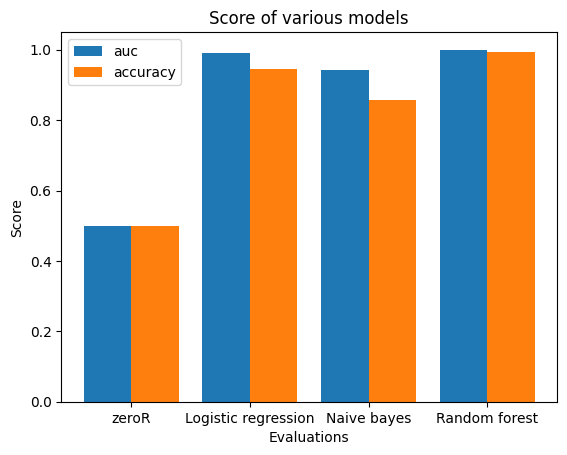

F1:  0.9467741039177549 0.8713534601272795 0.993103448275862
auc:  [0.5, 0.991486325802616, 0.9426872770511296, 1.0]
accuracy:  [0.5, 0.9456458211572181, 0.8573933372296902, 0.9932203389830508]
Y:  2
X:  1
Q:  2
Size difference:  -108 
Sampling...
Shape j:  (382, 62)
Shape i:  (490, 62)
Cohort shape:  (764, 62)
value_counts:  1    382
2    382
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol

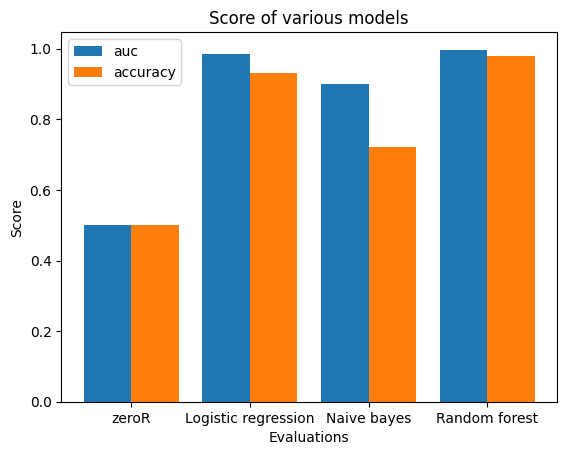

F1:  0.9274646344471209 0.6281686028751138 0.980040279884456
auc:  [0.5, 0.9857839874806633, 0.9004186602870814, 0.9973499838112027]
accuracy:  [0.5, 0.9306243550051599, 0.722437220502236, 0.9803663570691434]
Y:  1
X:  2
Q:  1
Size difference:  -212 
Sampling...
Shape j:  (76, 62)
Shape i:  (288, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
1    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                             

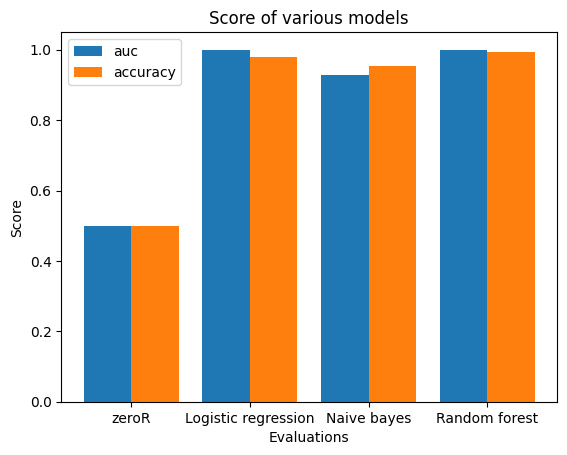

F1:  0.9810361681329424 0.953503893214683 0.993103448275862
auc:  [0.5, 1.0, 0.9283888888888889, 1.0]
accuracy:  [0.5, 0.9802150537634409, 0.9539784946236559, 0.9935483870967742]
Y:  1
X:  2
Q:  2
Size difference:  -129 
Sampling...
Shape j:  (76, 62)
Shape i:  (205, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
2    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency.

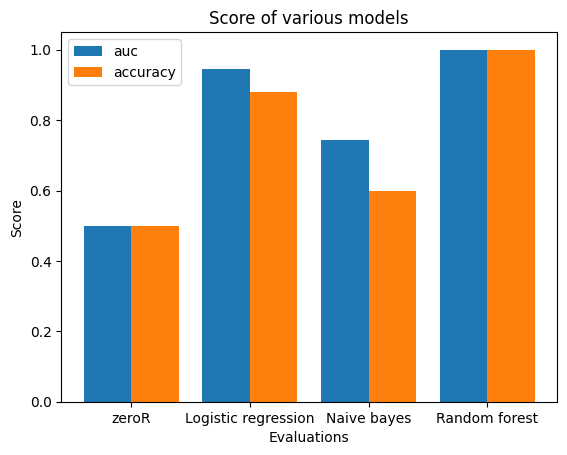

F1:  0.8808333333333334 0.7070504821327283 1.0
auc:  [0.5, 0.9460555555555555, 0.7448888888888889, 1.0]
accuracy:  [0.5, 0.8804301075268818, 0.5978494623655914, 1.0]
Y:  1
X:  2
Q:  3
Size difference:  -374 
Sampling...
Shape j:  (76, 62)
Shape i:  (450, 62)
Cohort shape:  (152, 62)
value_counts:  0    76
3    76
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0

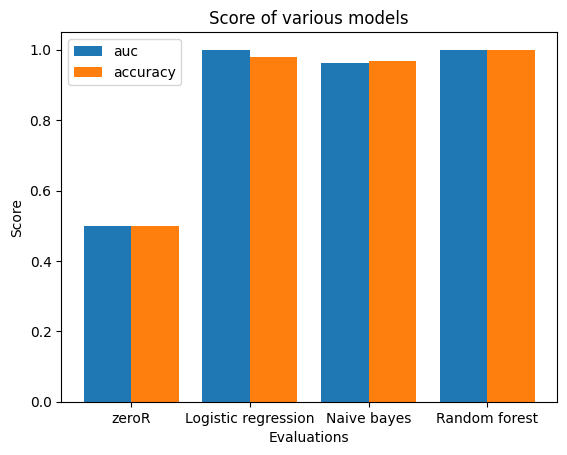

F1:  0.9802002224694105 0.9667626728110599 1.0
auc:  [0.5, 1.0, 0.9608888888888889, 1.0]
accuracy:  [0.5, 0.98, 0.9670967741935483, 1.0]
Y:  2
X:  2
Q:  2
Size difference:  83 
Sampling...
Cohort shape:  (410, 62)
value_counts:  1    205
2    205
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instanc

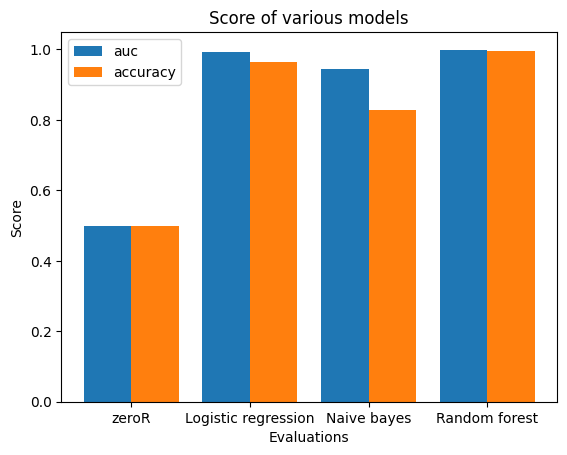

F1:  0.9643132220795892 0.7955039470333588 0.995121225643314
auc:  [0.5, 0.9939321832242712, 0.9438429506246282, 0.9993456276026175]
accuracy:  [0.5, 0.9658536585365853, 0.8268292682926829, 0.9951219512195122]
Y:  2
X:  2
Q:  3
Size difference:  -162 
Sampling...
Shape j:  (288, 62)
Shape i:  (450, 62)
Cohort shape:  (576, 62)
value_counts:  1    288
3    288
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

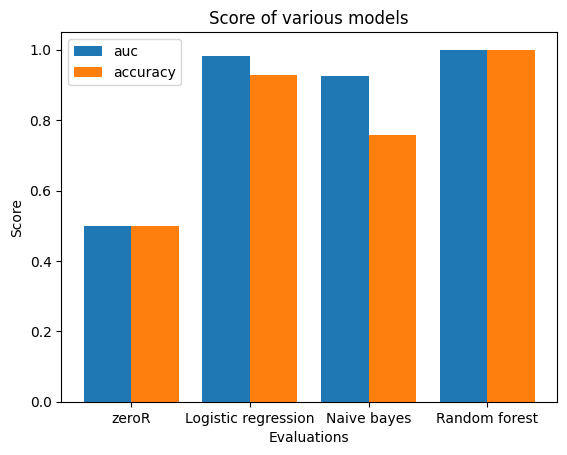

F1:  0.92660764755901 0.704982493386577 0.9982905982905983
auc:  [0.5, 0.9830996933475186, 0.926057638150072, 1.0]
accuracy:  [0.5, 0.9288005997001499, 0.7586056971514243, 0.9982608695652174]
Y:  3
X:  2
Q:  3
Size difference:  -245 
Sampling...
Shape j:  (205, 62)
Shape i:  (450, 62)
Cohort shape:  (410, 62)
value_counts:  2    205
3    205
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol i

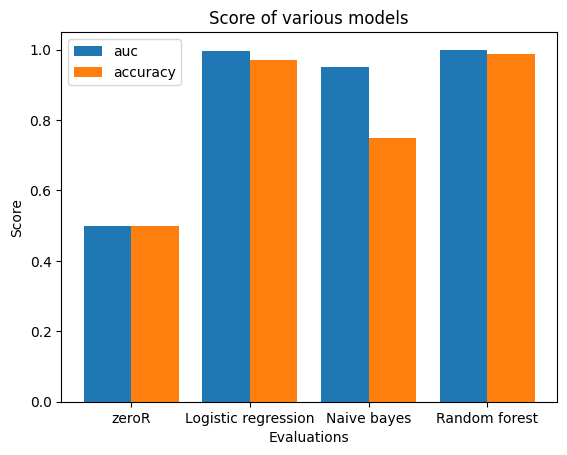

F1:  0.9713016233152365 0.7020919965331556 0.987774041060357
auc:  [0.5, 0.9958358120166567, 0.9516954193932183, 0.9995240928019037]
accuracy:  [0.5, 0.9707317073170731, 0.748780487804878, 0.9878048780487805]
Y:  1
X:  3
Q:  1
Size difference:  -241 
Sampling...
Shape j:  (41, 62)
Shape i:  (282, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
1    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                              

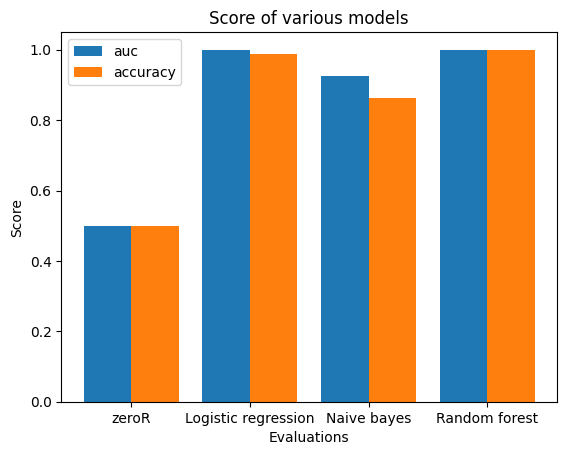

F1:  0.9882352941176471 0.7866666666666666 1.0
auc:  [0.5, 1.0, 0.9265625, 1.0]
accuracy:  [0.5, 0.9875, 0.8625, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  -141 
Sampling...
Shape j:  (41, 62)
Shape i:  (182, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
2    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake f

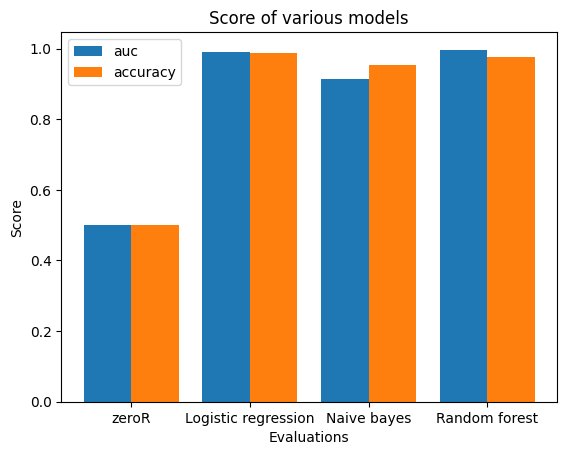

F1:  0.9866666666666667 0.951140350877193 0.975
auc:  [0.5, 0.990625, 0.9140625, 0.996875]
accuracy:  [0.5, 0.9875, 0.9522058823529411, 0.975]
Y:  1
X:  3
Q:  3
Size difference:  -370 
Sampling...
Shape j:  (41, 62)
Shape i:  (411, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
3    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily  

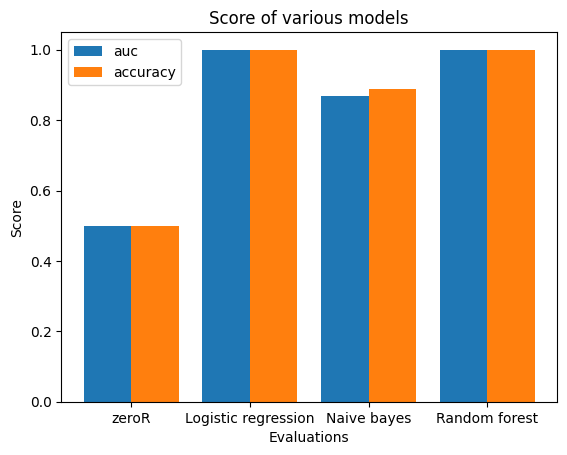

F1:  1.0 0.8816666666666667 1.0
auc:  [0.5, 1.0, 0.86875, 1.0]
accuracy:  [0.5, 1.0, 0.888235294117647, 1.0]
Y:  1
X:  3
Q:  4
Size difference:  -62 
Sampling...
Shape j:  (41, 62)
Shape i:  (103, 62)
Cohort shape:  (82, 62)
value_counts:  0    41
4    41
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. 

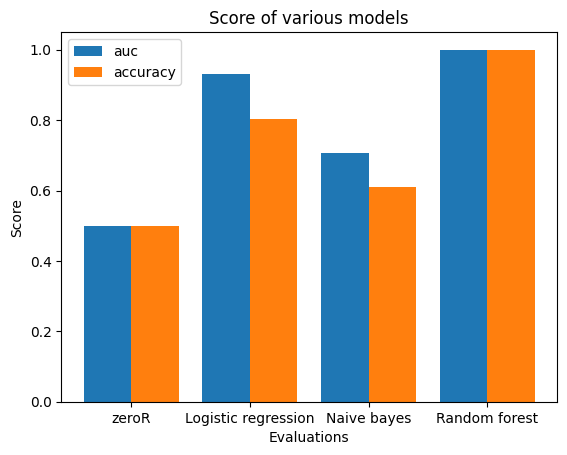

F1:  0.8018853695324284 0.7200963674007153 1.0
auc:  [0.5, 0.9315972222222222, 0.7055555555555556, 1.0]
accuracy:  [0.5, 0.8044117647058824, 0.6095588235294118, 1.0]
Y:  2
X:  3
Q:  2
Size difference:  100 
Sampling...
Cohort shape:  (364, 62)
value_counts:  1    182
2    182
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcoh

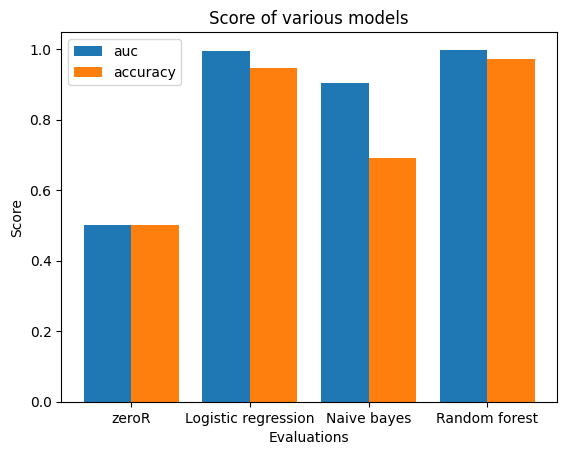

F1:  0.9429449505873443 0.6175099501217699 0.9722003122836953
auc:  [0.5, 0.9935185185185185, 0.9042208875542209, 0.9981022689356023]
accuracy:  [0.5, 0.9450152207001522, 0.6920471841704718, 0.9725266362252664]
Y:  2
X:  3
Q:  3
Size difference:  -129 
Sampling...
Shape j:  (282, 62)
Shape i:  (411, 62)
Cohort shape:  (564, 62)
value_counts:  1    282
3    282
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

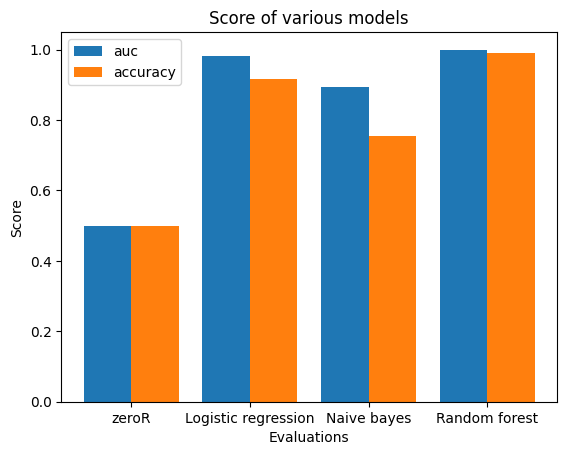

F1:  0.9141938827432529 0.6998235601618873 0.9893159111603452
auc:  [0.5, 0.9823934837092733, 0.8946031373075546, 0.999624060150376]
accuracy:  [0.5, 0.9167035398230089, 0.7535398230088496, 0.9893489254108723]
Y:  2
X:  3
Q:  4
Size difference:  179 
Sampling...
Cohort shape:  (206, 62)
value_counts:  1    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Inst

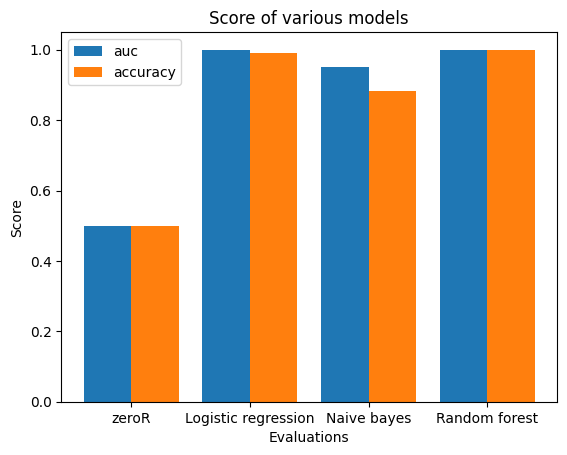

F1:  0.9899937460913071 0.9050360053870365 1.0
auc:  [0.5, 1.0, 0.9518367346938775, 1.0]
accuracy:  [0.5, 0.9902439024390244, 0.8831591173054587, 1.0]
Y:  3
X:  3
Q:  3
Size difference:  -229 
Sampling...
Shape j:  (182, 62)
Shape i:  (411, 62)
Cohort shape:  (364, 62)
value_counts:  2    182
3    182
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or al

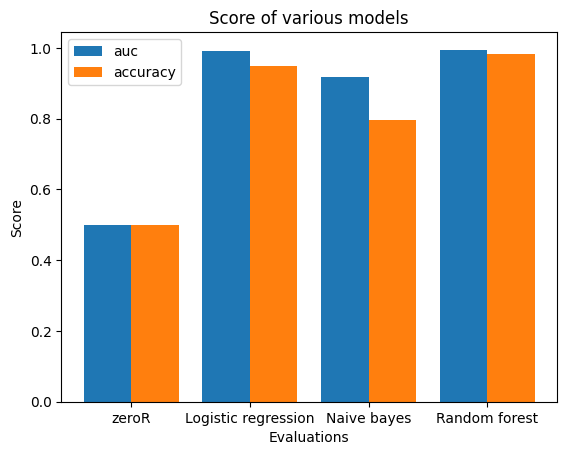

F1:  0.9474811097591257 0.812485193082208 0.9833247533247533
auc:  [0.5, 0.9913496830163497, 0.9185602268935602, 0.9945633133133133]
accuracy:  [0.5, 0.9477168949771689, 0.7964992389649924, 0.9834855403348554]
Y:  3
X:  3
Q:  4
Size difference:  79 
Sampling...
Cohort shape:  (206, 62)
value_counts:  2    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Insta

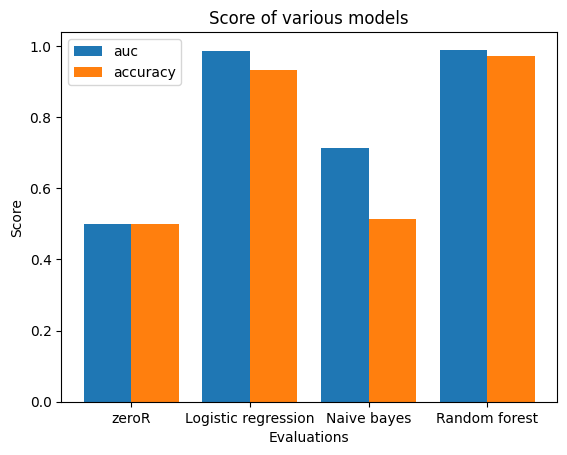

F1:  0.9303937666059647 0.6732980786180152 0.9704878048780488
auc:  [0.5, 0.9852380952380952, 0.7137528344671201, 0.9892857142857143]
accuracy:  [0.5, 0.9318234610917538, 0.5146341463414634, 0.9707317073170731]
Y:  4
X:  3
Q:  4
Size difference:  308 
Sampling...
Cohort shape:  (206, 62)
value_counts:  3    103
4    103
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

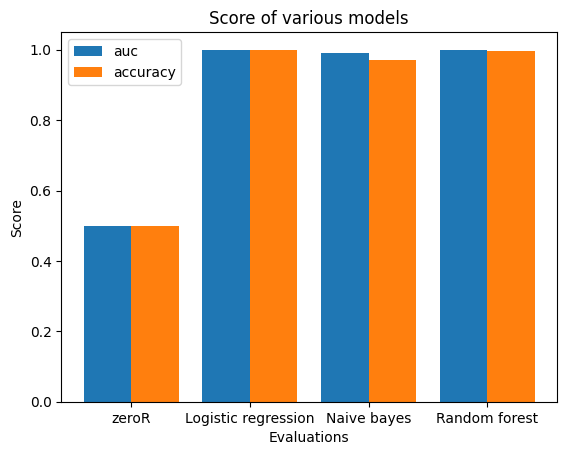

F1:  1.0 0.9714177673338196 0.9951219512195122
auc:  [0.5, 1.0, 0.9895238095238095, 1.0]
accuracy:  [0.5, 1.0, 0.9708478513356562, 0.9952380952380953]


In [240]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_one_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
        'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_one_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_one_lada_c[(niddm_na_one_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                'Glycated haemoglobin (HbA1c) | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

#### Five year

##### Questionnaire only

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  3875 
Sampling...
Cohort shape:  (1770, 62)
value_counts:  0    885
1    885
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice

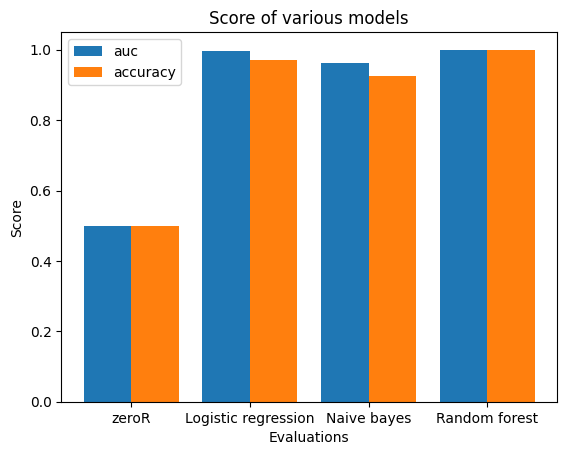

F1:  0.9698535901653197 0.9291710106298463 1.0
auc:  [0.5, 0.9950971942928277, 0.9632098056114144, 1.0]
accuracy:  [0.5, 0.9694915254237289, 0.9259887005649717, 1.0]
Y:  1
X:  1
Q:  1
Size difference:  3639 
Sampling...
Cohort shape:  (692, 62)
value_counts:  0    346
1    346
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alco

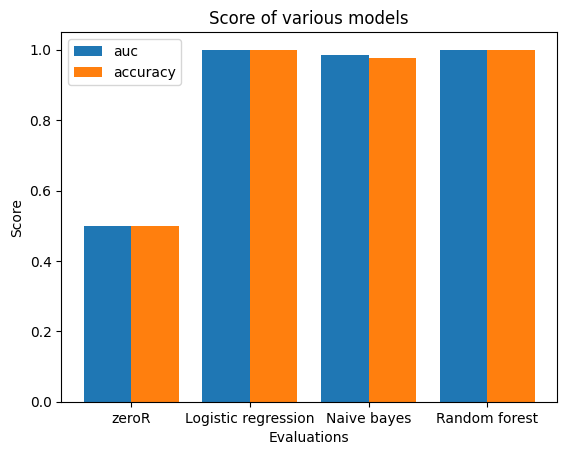

F1:  1.0 0.977377972465582 0.9985401459854015
auc:  [0.5, 1.0, 0.9847739070423381, 1.0]
accuracy:  [0.5, 1.0, 0.9768845792930873, 0.9985507246376811]
Y:  1
X:  1
Q:  2
Size difference:  2671 
Sampling...
Cohort shape:  (2628, 62)
value_counts:  0    1314
2    1314
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake fr

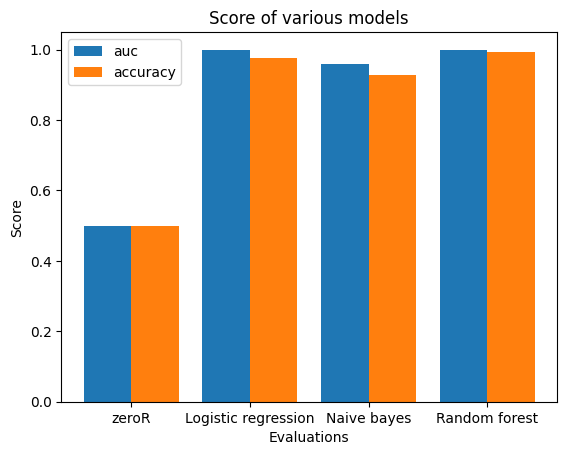

F1:  0.9764720216909143 0.9296020031879743 0.9924427757865558
auc:  [0.5, 0.9977530197914413, 0.9603227088779899, 0.999570909352566]
accuracy:  [0.5, 0.9760275212746696, 0.9269455006337136, 0.9923903675538657]
Y:  2
X:  1
Q:  2
Size difference:  -968 
Sampling...
Shape j:  (346, 62)
Shape i:  (1314, 62)
Cohort shape:  (692, 62)
value_counts:  1    346
2    346
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

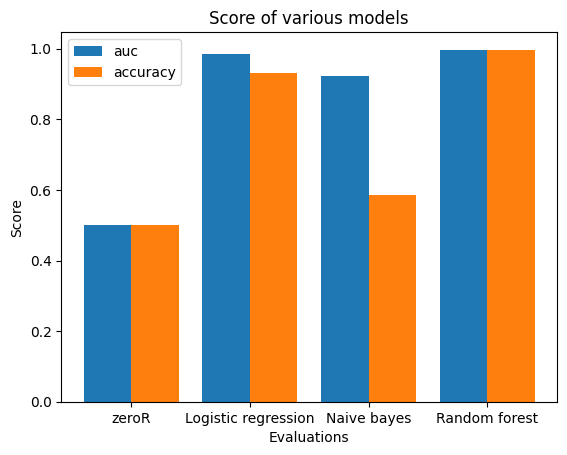

F1:  0.9312625865112791 0.7019704821271482 0.9956199746085485
auc:  [0.5, 0.9850541602904552, 0.9240906772286734, 0.9971650613616587]
accuracy:  [0.5, 0.9320925868001251, 0.5852882911062455, 0.995662600354499]
Y:  1
X:  2
Q:  1
Size difference:  1754 
Sampling...
Cohort shape:  (618, 62)
value_counts:  0    309
1    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

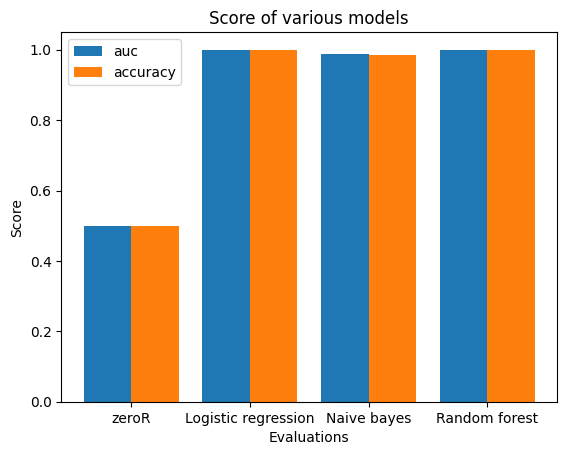

F1:  1.0 0.9854438816315649 0.9983739837398374
auc:  [0.5, 1.0, 0.9882098565360536, 1.0]
accuracy:  [0.5, 1.0, 0.9854183057959612, 0.9983870967741936]
Y:  1
X:  2
Q:  2
Size difference:  1016 
Sampling...
Cohort shape:  (2094, 62)
value_counts:  0    1047
2    1047
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake f

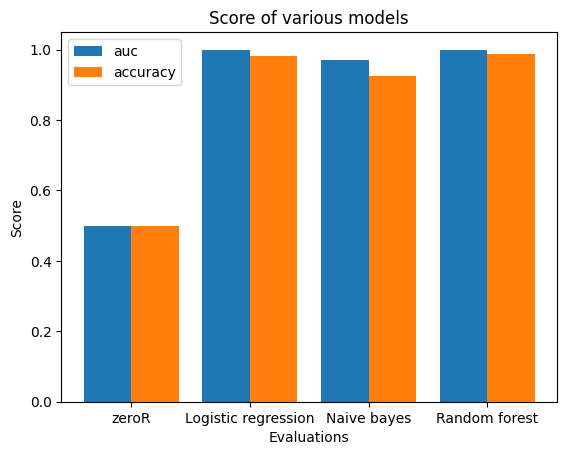

F1:  0.9805783587688041 0.9253603073533934 0.9872732617608534
auc:  [0.5, 0.9987766938006173, 0.9701746863897456, 0.9994869622948193]
accuracy:  [0.5, 0.9804216007582419, 0.9250288337463316, 0.9871053202544221]
Y:  1
X:  2
Q:  3
Size difference:  -163 
Sampling...
Shape j:  (2063, 62)
Shape i:  (2226, 62)
Cohort shape:  (4126, 62)
value_counts:  0    2063
3    2063
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

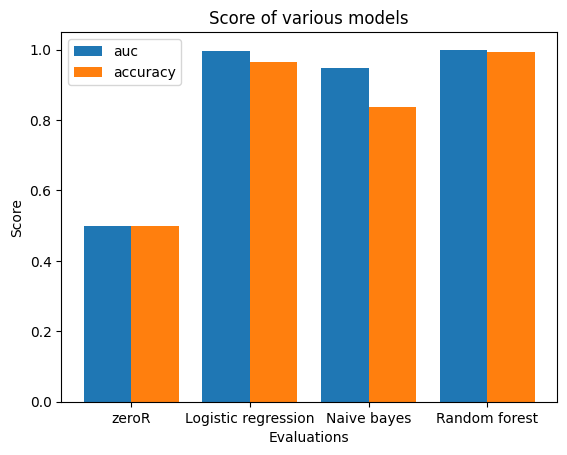

F1:  0.9640678987811554 0.8249988615545566 0.9946519256624462
auc:  [0.5, 0.9962177536329432, 0.9473942441765587, 0.9998572254476408]
accuracy:  [0.5, 0.9646142783769902, 0.8368857583094871, 0.9946681341257613]
Y:  2
X:  2
Q:  2
Size difference:  -738 
Sampling...
Shape j:  (309, 62)
Shape i:  (1047, 62)
Cohort shape:  (618, 62)
value_counts:  1    309
2    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                       

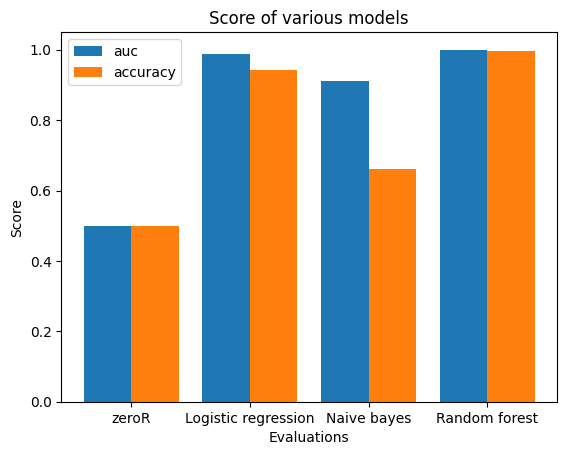

F1:  0.9412432651181951 0.7456800660430832 0.9967210911778539
auc:  [0.5, 0.9884444141178076, 0.9104352535780693, 0.9998959417273673]
accuracy:  [0.5, 0.9417519013899817, 0.6616706005769735, 0.9967610805140309]
Y:  2
X:  2
Q:  3
Size difference:  -1917 
Sampling...
Shape j:  (309, 62)
Shape i:  (2226, 62)
Cohort shape:  (618, 62)
value_counts:  1    309
3    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                      

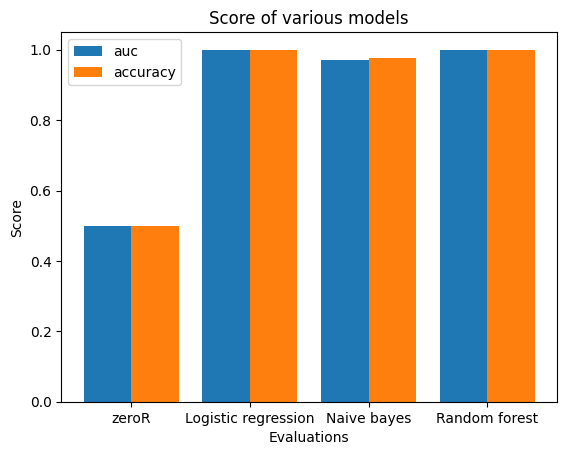

F1:  0.9983471074380166 0.976123783922171 1.0
auc:  [0.5, 0.9999471179270227, 0.9694964261953908, 1.0]
accuracy:  [0.5, 0.9983739837398374, 0.9757539994754787, 1.0]
Y:  3
X:  2
Q:  3
Size difference:  -1179 
Sampling...
Shape j:  (1047, 62)
Shape i:  (2226, 62)
Cohort shape:  (2094, 62)
value_counts:  2    1047
3    1047
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

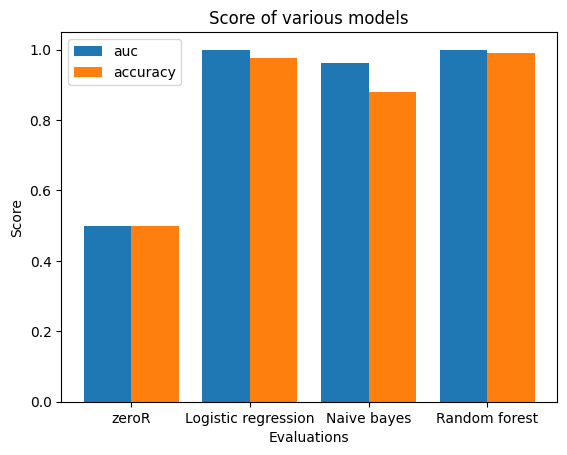

F1:  0.9757959144196366 0.8615476564691016 0.9889294643167572
auc:  [0.5, 0.9982447855175128, 0.9615256606064967, 0.9995804212575806]
accuracy:  [0.5, 0.976121090315287, 0.8792031608637563, 0.9890146281303172]
Y:  1
X:  3
Q:  1
Size difference:  964 
Sampling...
Cohort shape:  (358, 62)
value_counts:  0    179
1    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Inst

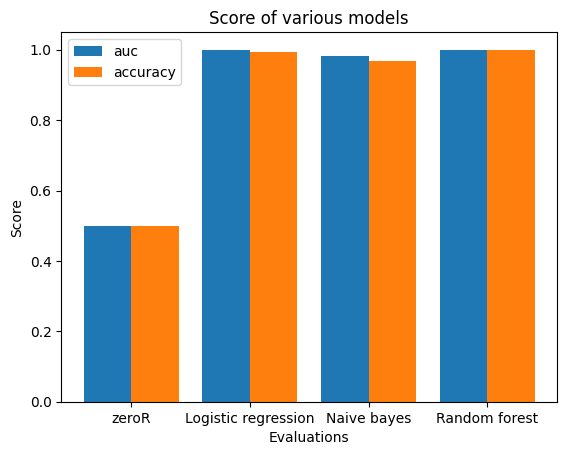

F1:  0.994443372564152 0.9681006615667096 1.0
auc:  [0.5, 1.0, 0.9826212522045855, 1.0]
accuracy:  [0.5, 0.9944444444444445, 0.9692488262910798, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  628 
Sampling...
Cohort shape:  (1030, 62)
value_counts:  0    515
2    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequ

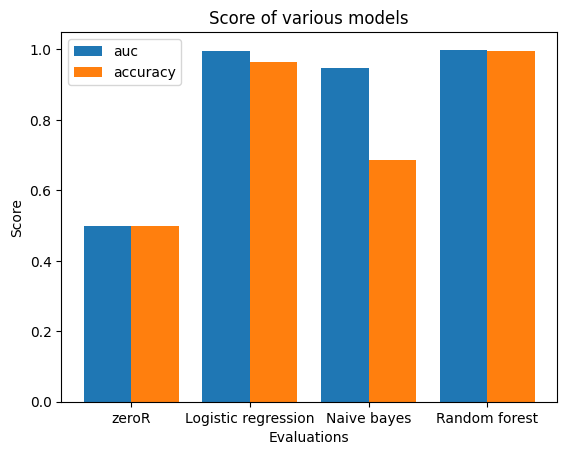

F1:  0.9634104001963156 0.7135787351593388 0.997092023094144
auc:  [0.5, 0.9960033933452729, 0.9461589216702799, 0.9993684607408804]
accuracy:  [0.5, 0.9631067961165048, 0.6864077669902913, 0.9970873786407767]
Y:  1
X:  3
Q:  3
Size difference:  -859 
Sampling...
Shape j:  (1143, 62)
Shape i:  (2002, 62)
Cohort shape:  (2286, 62)
value_counts:  0    1143
3    1143
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                    

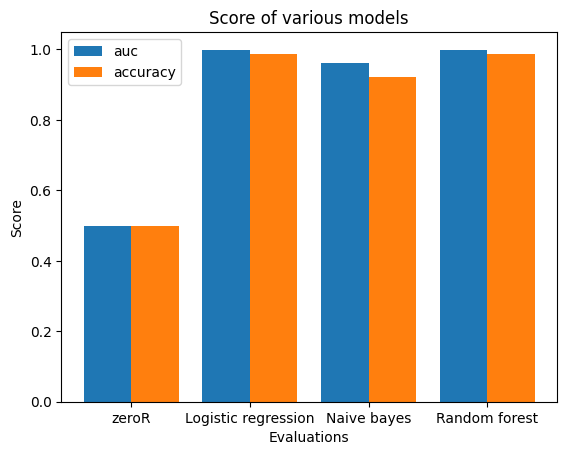

F1:  0.986347501099505 0.9204230691443592 0.9872192195815026
auc:  [0.5, 0.9991232419256796, 0.9618555121428024, 0.9993357112772014]
accuracy:  [0.5, 0.9864380380877759, 0.923005551680315, 0.9873133116107518]
Y:  1
X:  3
Q:  4
Size difference:  -663 
Sampling...
Shape j:  (1143, 62)
Shape i:  (1806, 62)
Cohort shape:  (2286, 62)
value_counts:  0    1143
4    1143
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                     

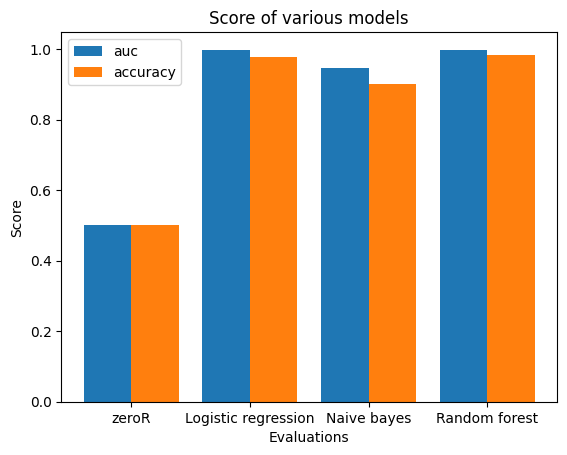

F1:  0.9771722239947459 0.9032093573574428 0.9831429507618664
auc:  [0.5, 0.9983767555652351, 0.9478099029920676, 0.9986291193745888]
accuracy:  [0.5, 0.9772533993292117, 0.9007338537834558, 0.9833736252185795]
Y:  2
X:  3
Q:  2
Size difference:  -336 
Sampling...
Shape j:  (179, 62)
Shape i:  (515, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
2    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

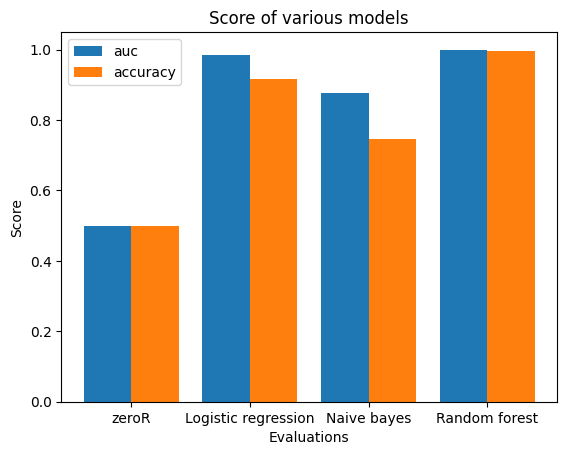

F1:  0.9170038114350204 0.7259143155694879 0.9971830985915493
auc:  [0.5, 0.9834744268077601, 0.8758002645502645, 0.9996913580246913]
accuracy:  [0.5, 0.9162754303599374, 0.7460876369327074, 0.9972222222222222]
Y:  2
X:  3
Q:  3
Size difference:  -1823 
Sampling...
Shape j:  (179, 62)
Shape i:  (2002, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
3    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                      

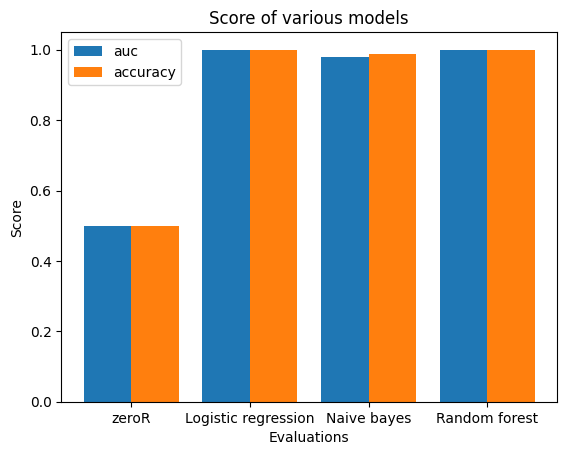

F1:  1.0 0.9886507450500102 1.0
auc:  [0.5, 1.0, 0.9803990299823633, 1.0]
accuracy:  [0.5, 1.0, 0.988849765258216, 1.0]
Y:  2
X:  3
Q:  4
Size difference:  -1627 
Sampling...
Shape j:  (179, 62)
Shape i:  (1806, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
4    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol 

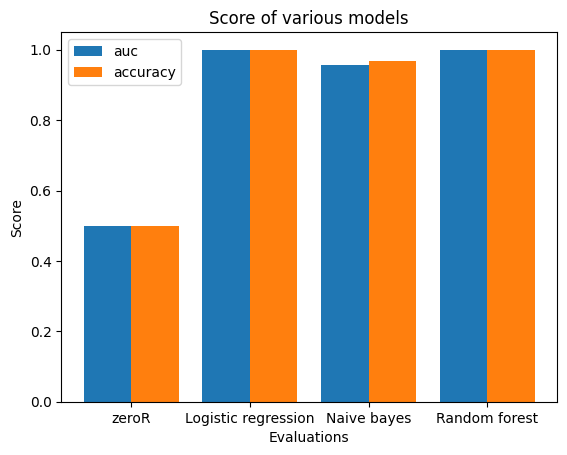

F1:  1.0 0.969852282300168 1.0
auc:  [0.5, 1.0, 0.9567504409171076, 1.0]
accuracy:  [0.5, 1.0, 0.9692097026604068, 1.0]
Y:  3
X:  3
Q:  3
Size difference:  -1487 
Sampling...
Shape j:  (515, 62)
Shape i:  (2002, 62)
Cohort shape:  (1030, 62)
value_counts:  2    515
3    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol

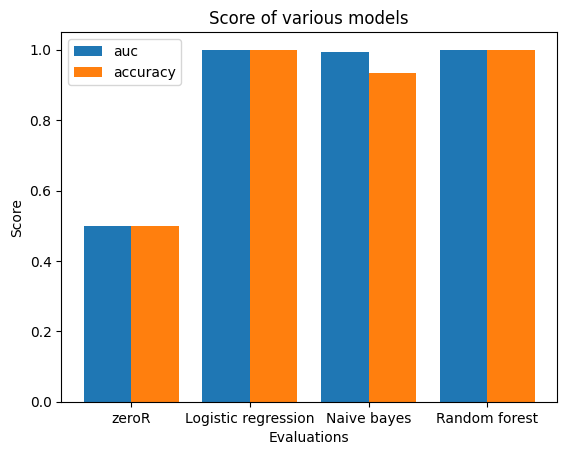

F1:  1.0 0.9262390934164796 1.0
auc:  [0.5, 1.0, 0.9936374776133472, 1.0]
accuracy:  [0.5, 1.0, 0.9349514563106797, 1.0]
Y:  3
X:  3
Q:  4
Size difference:  -1291 
Sampling...
Shape j:  (515, 62)
Shape i:  (1806, 62)
Cohort shape:  (1030, 62)
value_counts:  2    515
4    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcoho

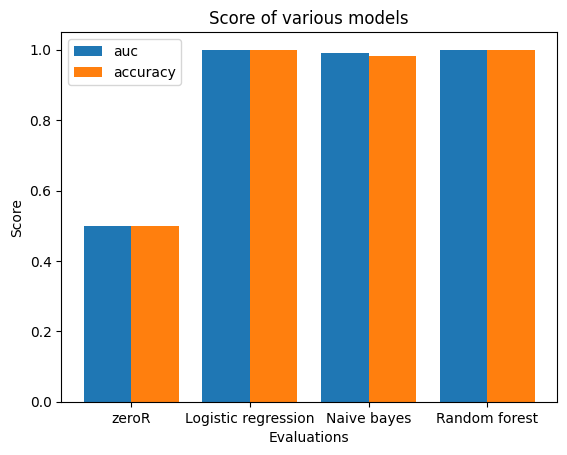

F1:  1.0 0.9822063340168203 1.0
auc:  [0.5, 1.0, 0.9897822603449901, 1.0]
accuracy:  [0.5, 1.0, 0.9825242718446602, 1.0]
Y:  4
X:  3
Q:  4
Size difference:  196 
Sampling...
Cohort shape:  (3612, 62)
value_counts:  4    1806
3    1806
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never   

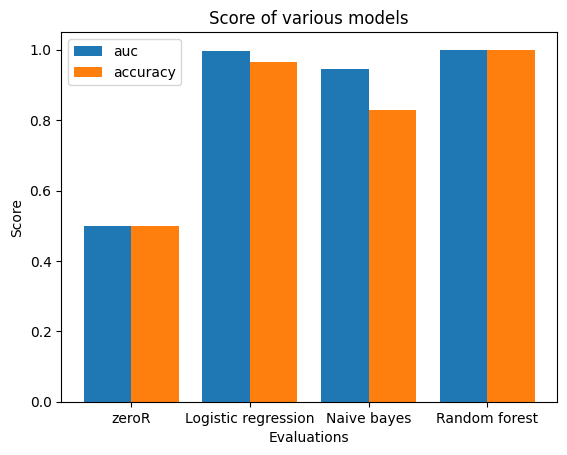

F1:  0.9664603133395098 0.8411389769160397 0.9980689602646083
auc:  [0.5, 0.9963258254659839, 0.9438390059462607, 0.999959435055836]
accuracy:  [0.5, 0.9659471347072639, 0.829743336283491, 0.9980632406524063]


In [241]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_five_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_five_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_five_lada_c[(niddm_na_five_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and HBA1C

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  3875 
Sampling...
Cohort shape:  (1770, 62)
value_counts:  0    885
1    885
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice

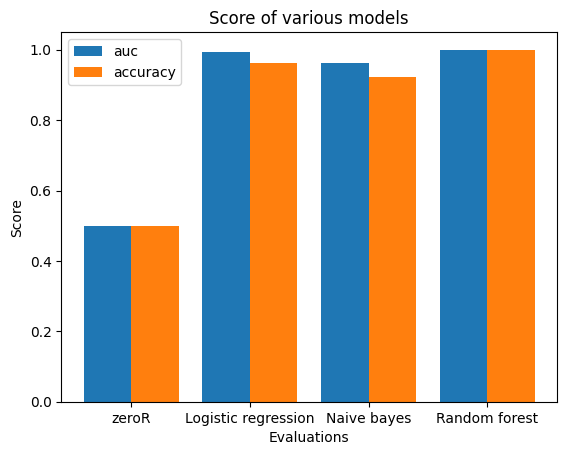

F1:  0.9628088889412614 0.9261626169524761 0.9994366197183099
auc:  [0.5, 0.9937118963260876, 0.9621341249321714, 0.9999872322768042]
accuracy:  [0.5, 0.9621468926553672, 0.923728813559322, 0.9994350282485875]
Y:  1
X:  1
Q:  1
Size difference:  3639 
Sampling...
Cohort shape:  (692, 62)
value_counts:  0    346
1    346
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

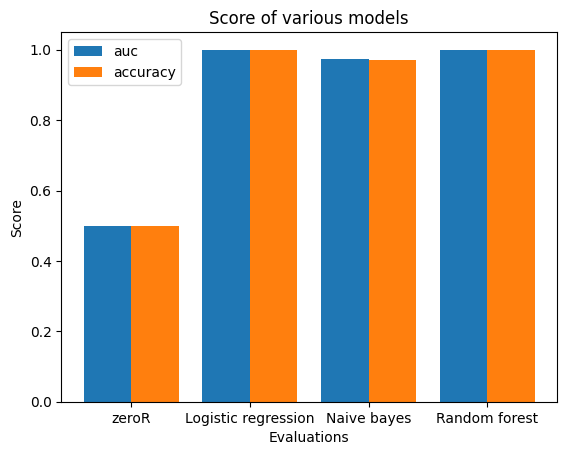

F1:  0.9985815602836879 0.9709625126646403 0.9985401459854015
auc:  [0.5, 1.0, 0.9742107000330062, 1.0]
accuracy:  [0.5, 0.9985611510791367, 0.971087477843812, 0.9985507246376811]
Y:  1
X:  1
Q:  2
Size difference:  2671 
Sampling...
Cohort shape:  (2628, 62)
value_counts:  0    1314
2    1314
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost dai

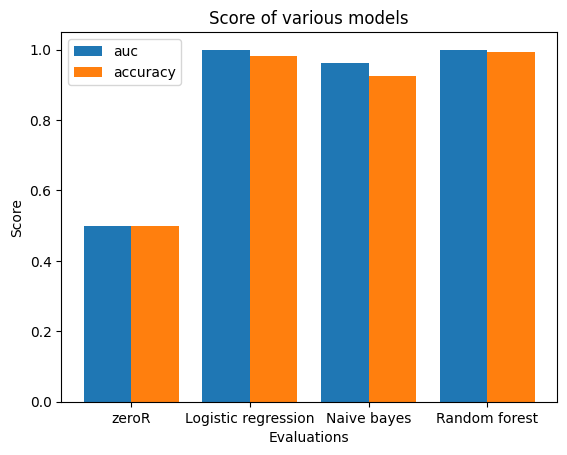

F1:  0.98271778411197 0.9279008639134471 0.9935526667518207
auc:  [0.5, 0.9987959571087035, 0.9618470647012478, 0.9998929052959015]
accuracy:  [0.5, 0.9825000905305088, 0.9246684772768423, 0.9935332246967228]
Y:  2
X:  1
Q:  2
Size difference:  -968 
Sampling...
Shape j:  (346, 62)
Shape i:  (1314, 62)
Cohort shape:  (692, 62)
value_counts:  1    346
2    346
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

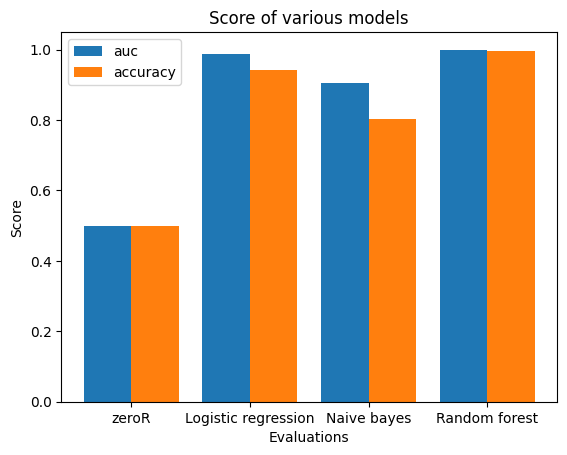

F1:  0.9423614400405141 0.8266618272006013 0.9971012970645382
auc:  [0.5, 0.988309778857983, 0.9065061361658715, 0.9996639361478681]
accuracy:  [0.5, 0.9421645292461683, 0.8032634761755812, 0.9971014492753623]
Y:  1
X:  2
Q:  1
Size difference:  1754 
Sampling...
Cohort shape:  (618, 62)
value_counts:  0    309
1    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

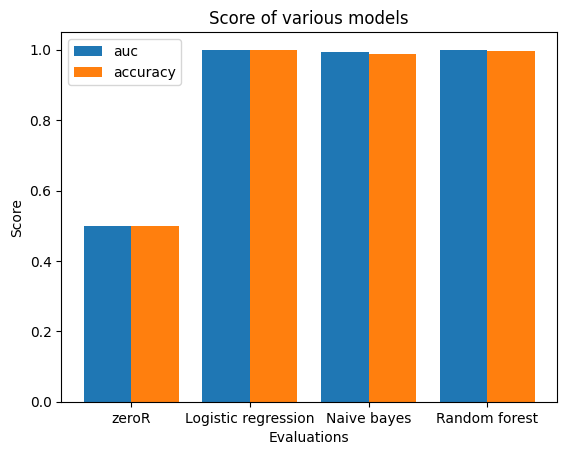

F1:  1.0 0.9870419930270476 0.9967741935483871
auc:  [0.5, 1.0, 0.9941710308592484, 0.9999479708636837]
accuracy:  [0.5, 1.0, 0.9870574350904799, 0.9967741935483871]
Y:  1
X:  2
Q:  2
Size difference:  1016 
Sampling...
Cohort shape:  (2094, 62)
value_counts:  0    1047
2    1047
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
A

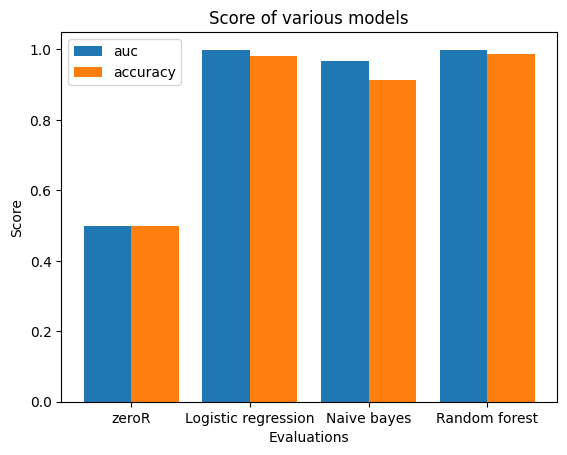

F1:  0.9823952313735408 0.9114175720580621 0.9867518311339684
auc:  [0.5, 0.9990834197280936, 0.9659021193697598, 0.999101330969878]
accuracy:  [0.5, 0.9823320505646846, 0.9144819632069977, 0.9866279932854484]
Y:  1
X:  2
Q:  3
Size difference:  -163 
Sampling...
Shape j:  (2063, 62)
Shape i:  (2226, 62)
Cohort shape:  (4126, 62)
value_counts:  0    2063
3    2063
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                    

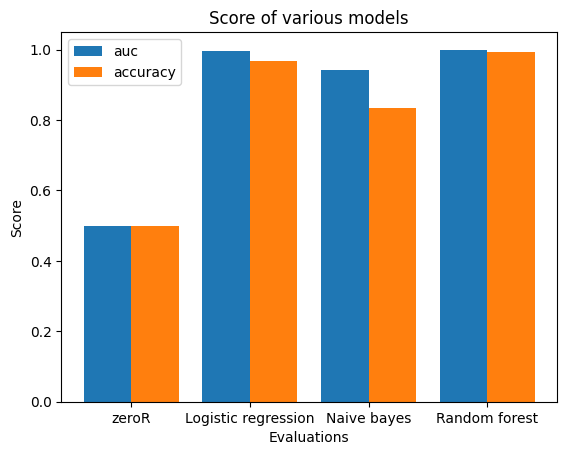

F1:  0.9660879691213025 0.8233604854078814 0.994645973238973
auc:  [0.5, 0.9963733123519696, 0.9424982583992003, 0.9998443117886352]
accuracy:  [0.5, 0.9665545527918409, 0.8356844962946658, 0.9946678406339423]
Y:  2
X:  2
Q:  2
Size difference:  -738 
Sampling...
Shape j:  (309, 62)
Shape i:  (1047, 62)
Cohort shape:  (618, 62)
value_counts:  1    309
2    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

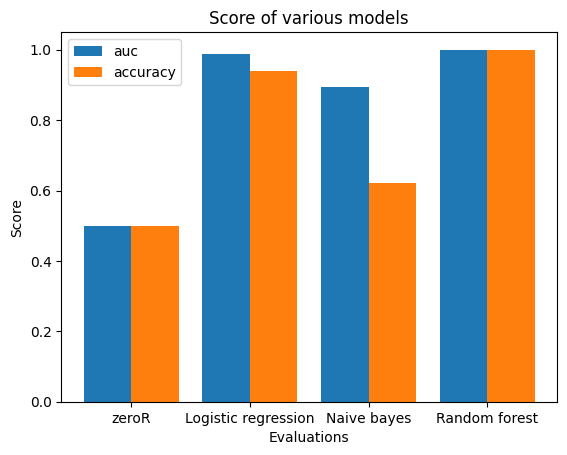

F1:  0.9391628461918352 0.6469832053065586 0.9983739837398374
auc:  [0.5, 0.9873108612954402, 0.8927321267122703, 1.0]
accuracy:  [0.5, 0.9401389981641752, 0.6212168895882507, 0.9983870967741936]
Y:  2
X:  2
Q:  3
Size difference:  -1917 
Sampling...
Shape j:  (309, 62)
Shape i:  (2226, 62)
Cohort shape:  (618, 62)
value_counts:  1    309
3    309
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alc

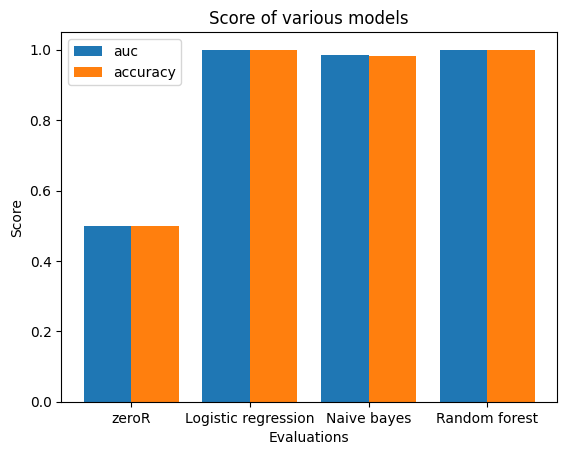

F1:  0.9983739837398374 0.982031681957982 0.9983739837398374
auc:  [0.5, 1.0, 0.9840999812353934, 1.0]
accuracy:  [0.5, 0.9983870967741936, 0.982166273275636, 0.9983870967741936]
Y:  3
X:  2
Q:  3
Size difference:  -1179 
Sampling...
Shape j:  (1047, 62)
Shape i:  (2226, 62)
Cohort shape:  (2094, 62)
value_counts:  2    1047
3    1047
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake f

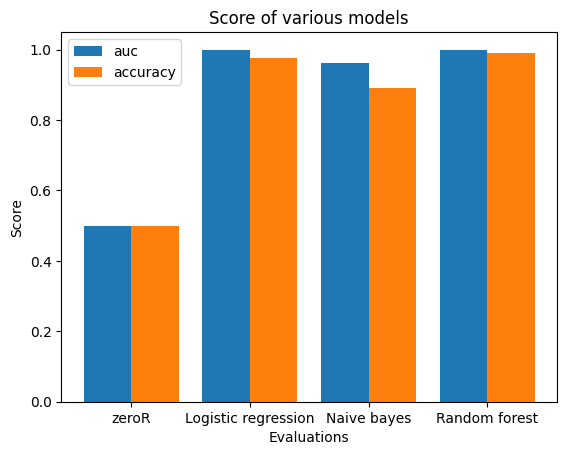

F1:  0.9752997177022718 0.8724008356160087 0.9889594524856828
auc:  [0.5, 0.9982062376471845, 0.9613857828564452, 0.9994774452442546]
accuracy:  [0.5, 0.9756460472074089, 0.8910426967831816, 0.9890146281303172]
Y:  1
X:  3
Q:  1
Size difference:  964 
Sampling...
Cohort shape:  (358, 62)
value_counts:  0    179
1    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

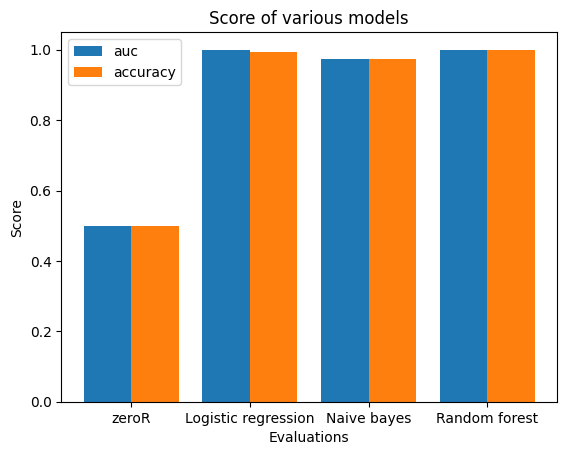

F1:  0.994443372564152 0.9740682659997871 1.0
auc:  [0.5, 1.0, 0.9737808641975308, 1.0]
accuracy:  [0.5, 0.9944053208137715, 0.9747261345852896, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  628 
Sampling...
Cohort shape:  (1030, 62)
value_counts:  0    515
2    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequ

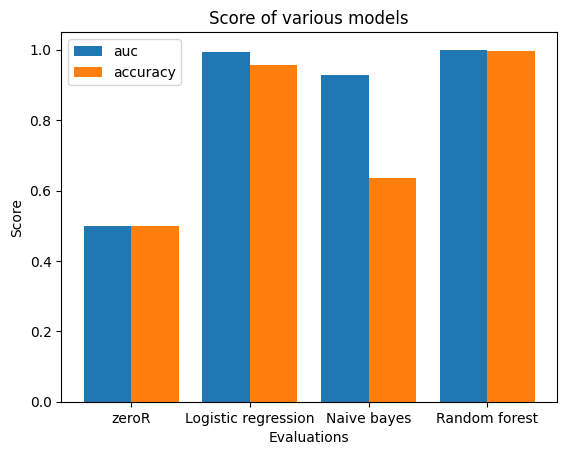

F1:  0.9557384803507895 0.7336877530907077 0.9970443349753695
auc:  [0.5, 0.9943632764633802, 0.9267885757375813, 0.9999811480818173]
accuracy:  [0.5, 0.9553398058252427, 0.6368932038834951, 0.9970873786407767]
Y:  1
X:  3
Q:  3
Size difference:  -859 
Sampling...
Shape j:  (1143, 62)
Shape i:  (2002, 62)
Cohort shape:  (2286, 62)
value_counts:  0    1143
3    1143
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

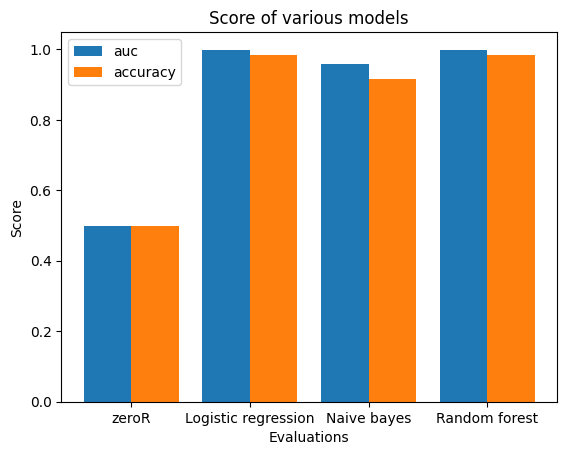

F1:  0.983691382528387 0.9134967825389316 0.9832321914310241
auc:  [0.5, 0.9988676330325442, 0.957733820831899, 0.9990085349048906]
accuracy:  [0.5, 0.9838160396739701, 0.9168862813297277, 0.9833736252185795]
Y:  1
X:  3
Q:  4
Size difference:  -663 
Sampling...
Shape j:  (1143, 62)
Shape i:  (1806, 62)
Cohort shape:  (2286, 62)
value_counts:  0    1143
4    1143
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                     

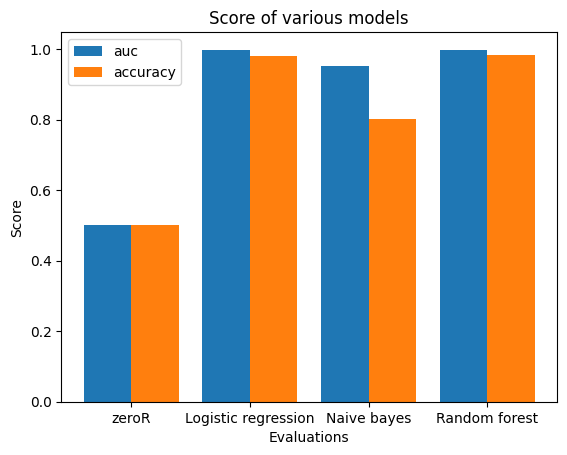

F1:  0.980282681279186 0.8297679975385338 0.9841172659252458
auc:  [0.5, 0.9986493426028985, 0.953230781994937, 0.9985783522133647]
accuracy:  [0.5, 0.9803139900432859, 0.8014151529339818, 0.9842508098191165]
Y:  2
X:  3
Q:  2
Size difference:  -336 
Sampling...
Shape j:  (179, 62)
Shape i:  (515, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
2    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                          

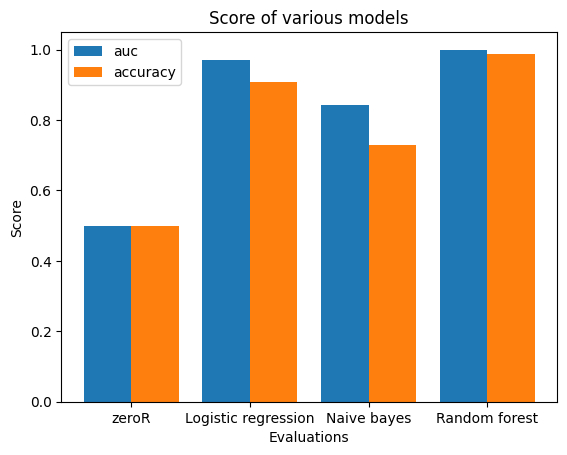

F1:  0.9073878650101921 0.6884403036576949 0.9887290868498663
auc:  [0.5, 0.9713624338624338, 0.8424867724867725, 0.9996913580246913]
accuracy:  [0.5, 0.9077856025039124, 0.729264475743349, 0.988849765258216]
Y:  2
X:  3
Q:  3
Size difference:  -1823 
Sampling...
Shape j:  (179, 62)
Shape i:  (2002, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
3    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                        

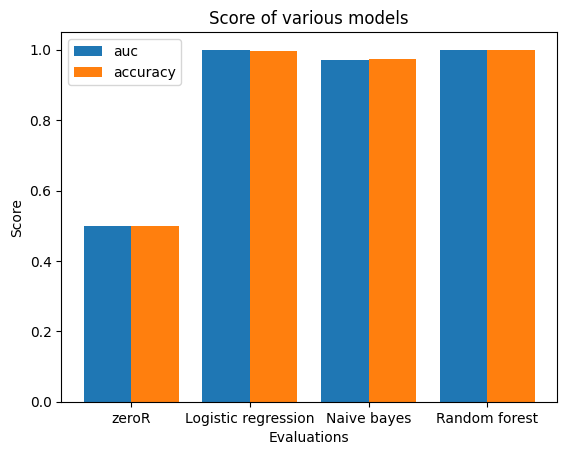

F1:  0.9972602739726028 0.9746348360432867 1.0
auc:  [0.5, 1.0, 0.9695546737213404, 1.0]
accuracy:  [0.5, 0.9971830985915493, 0.9747652582159625, 1.0]
Y:  2
X:  3
Q:  4
Size difference:  -1627 
Sampling...
Shape j:  (179, 62)
Shape i:  (1806, 62)
Cohort shape:  (358, 62)
value_counts:  1    179
4    179
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or 

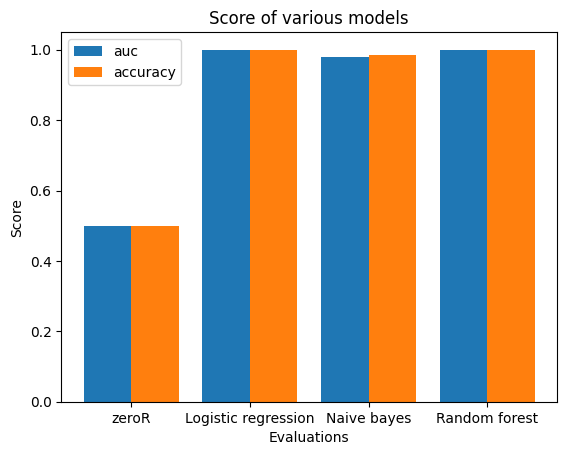

F1:  1.0 0.9860709156001457 1.0
auc:  [0.5, 1.0, 0.9802491181657849, 1.0]
accuracy:  [0.5, 1.0, 0.9860719874804382, 1.0]
Y:  3
X:  3
Q:  3
Size difference:  -1487 
Sampling...
Shape j:  (515, 62)
Shape i:  (2002, 62)
Cohort shape:  (1030, 62)
value_counts:  2    515
3    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcoho

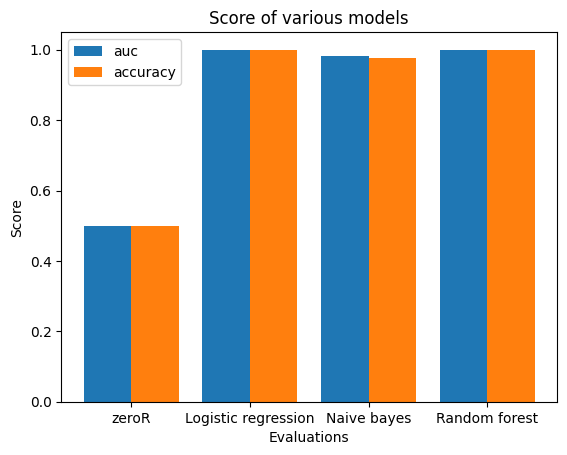

F1:  1.0 0.9753674137135814 1.0
auc:  [0.5, 1.0, 0.9818456027900839, 1.0]
accuracy:  [0.5, 1.0, 0.9757281553398058, 1.0]
Y:  3
X:  3
Q:  4
Size difference:  -1291 
Sampling...
Shape j:  (515, 62)
Shape i:  (1806, 62)
Cohort shape:  (1030, 62)
value_counts:  2    515
4    515
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcoho

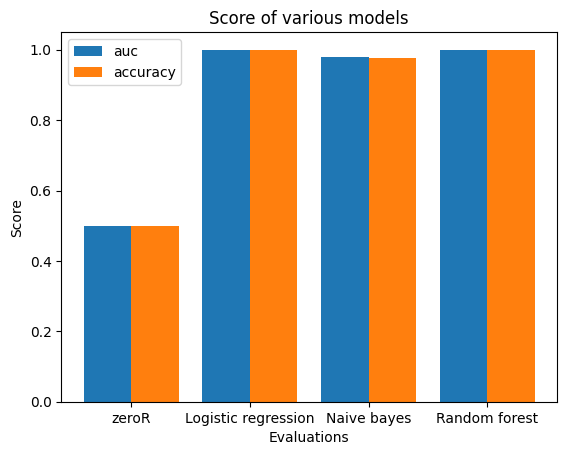

F1:  1.0 0.9773361834488918 1.0
auc:  [0.5, 1.0, 0.9799415590536337, 1.0]
accuracy:  [0.5, 1.0, 0.9776699029126213, 1.0]
Y:  4
X:  3
Q:  4
Size difference:  196 
Sampling...
Cohort shape:  (3612, 62)
value_counts:  4    1806
3    1806
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never   

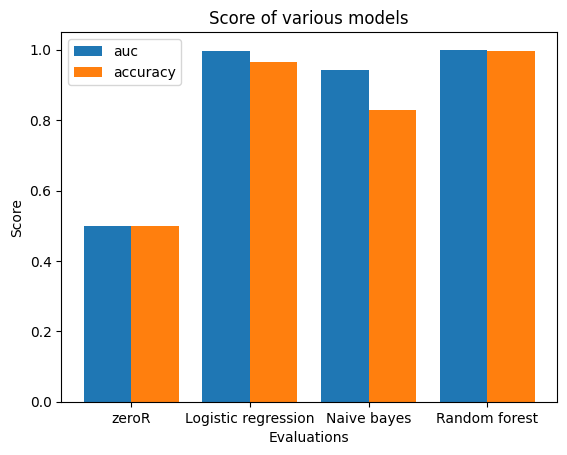

F1:  0.9661838742196462 0.8407553518282784 0.9964038611232636
auc:  [0.5, 0.9961936359353388, 0.9432303516082112, 0.9999417439326718]
accuracy:  [0.5, 0.9656674444355046, 0.827519607054325, 0.996401573928269]


In [242]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_five_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
        'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_five_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_five_lada_c[(niddm_na_five_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                'Glycated haemoglobin (HbA1c) | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

#### Five to ten year

##### Questionnaire only

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  4500 
Sampling...
Cohort shape:  (2296, 62)
value_counts:  0    1148
1    1148
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twi

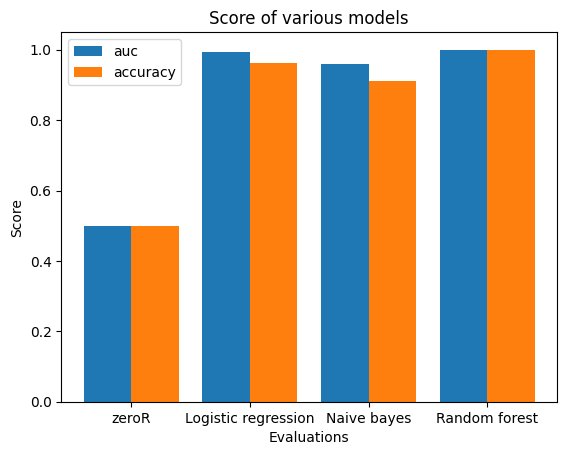

F1:  0.9622050014390862 0.9062705681521828 0.9986965911937202
auc:  [0.5, 0.9946400310382116, 0.9603916262867237, 0.9999183595974939]
accuracy:  [0.5, 0.9616785071516529, 0.9107085346215781, 0.9986928104575163]
Y:  1
X:  1
Q:  1
Size difference:  2124 
Sampling...
Cohort shape:  (2064, 62)
value_counts:  0    1032
1    1032
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. |

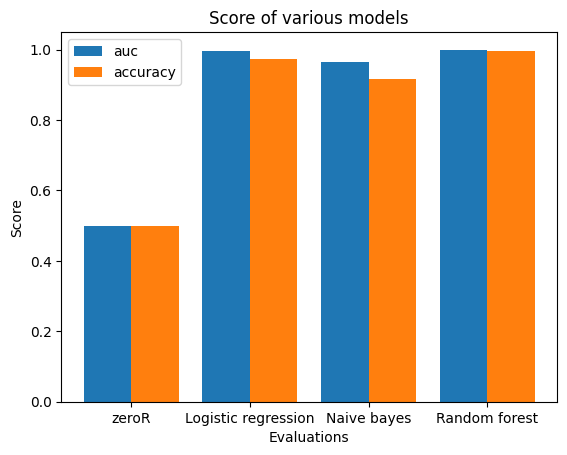

F1:  0.9745993942843496 0.9154934762809189 0.9951829839666291
auc:  [0.5, 0.9968289616463645, 0.9636471950030577, 0.9998519623526283]
accuracy:  [0.5, 0.9743176849479301, 0.91618749853076, 0.9951550342039069]
Y:  1
X:  1
Q:  2
Size difference:  548 
Sampling...
Cohort shape:  (5216, 62)
value_counts:  0    2608
2    2608
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

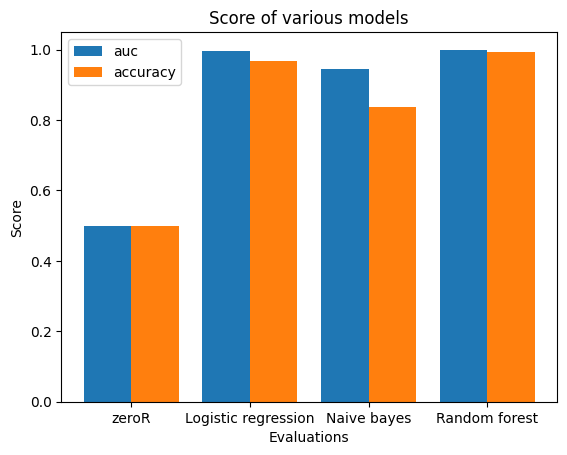

F1:  0.9694213237900161 0.8467728706821842 0.992144575358413
auc:  [0.5, 0.9969204848062925, 0.9447317465272433, 0.9996974708349637]
accuracy:  [0.5, 0.9689405377209126, 0.8381879929322651, 0.9921386142978367]
Y:  2
X:  1
Q:  2
Size difference:  -1576 
Sampling...
Shape j:  (1032, 62)
Shape i:  (2608, 62)
Cohort shape:  (2064, 62)
value_counts:  2    1032
1    1032
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

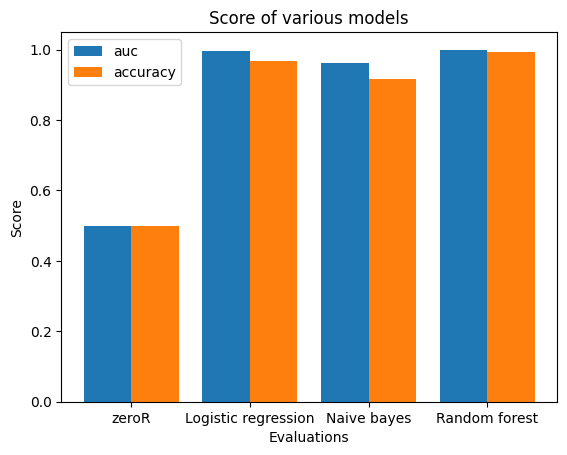

F1:  0.9683243520989009 0.9163765119638437 0.9922421046348106
auc:  [0.5, 0.9961428702182041, 0.9615193871942654, 0.9995636167997002]
accuracy:  [0.5, 0.9685077223253955, 0.9157149909494816, 0.9922482898046499]
Y:  1
X:  2
Q:  1
Size difference:  972 
Sampling...
Cohort shape:  (694, 62)
value_counts:  0    347
1    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

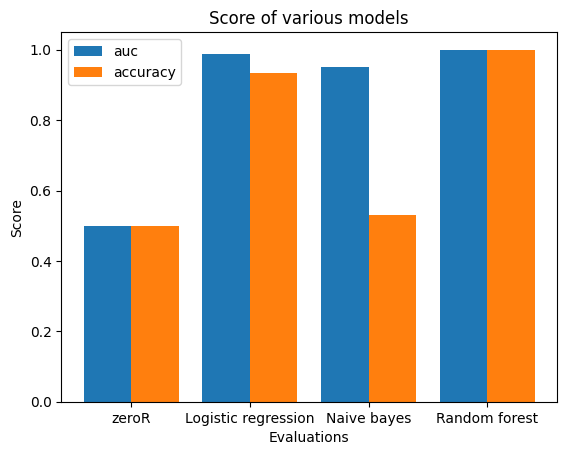

F1:  0.9348353475669045 0.6775232356082708 1.0
auc:  [0.5, 0.9877282683709905, 0.9509913883637892, 1.0]
accuracy:  [0.5, 0.9337399645500991, 0.5302575331039516, 1.0]
Y:  1
X:  2
Q:  2
Size difference:  -994 
Sampling...
Shape j:  (1319, 62)
Shape i:  (2313, 62)
Cohort shape:  (2638, 62)
value_counts:  0    1319
2    1319
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

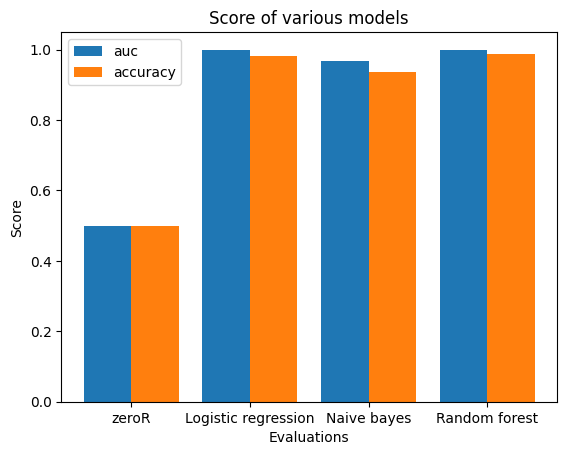

F1:  0.9820915759601513 0.93556316803177 0.9859119711739803
auc:  [0.5, 0.9990424465882468, 0.9676665222044154, 0.9994382393324884]
accuracy:  [0.5, 0.9821818756828244, 0.9355442470243229, 0.9859740670461733]
Y:  1
X:  2
Q:  3
Size difference:  -1498 
Sampling...
Shape j:  (1319, 62)
Shape i:  (2817, 62)
Cohort shape:  (2638, 62)
value_counts:  0    1319
3    1319
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                    

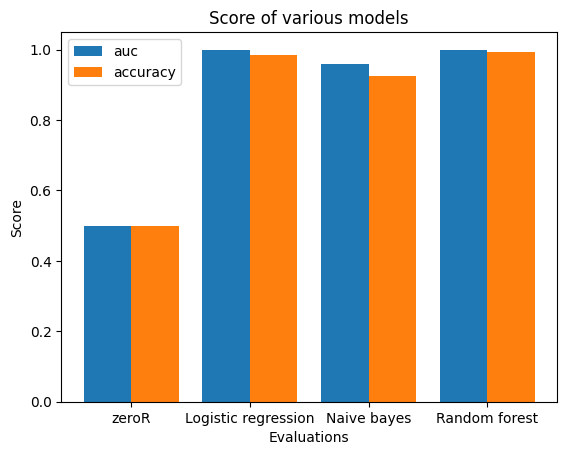

F1:  0.9832214136962385 0.9253311926068497 0.9935409691109224
auc:  [0.5, 0.9990920809372675, 0.9581851122266565, 0.9995718560038686]
accuracy:  [0.5, 0.9833196768443447, 0.9257079811396699, 0.9935548559599793]
Y:  2
X:  2
Q:  2
Size difference:  -1966 
Sampling...
Shape j:  (347, 62)
Shape i:  (2313, 62)
Cohort shape:  (694, 62)
value_counts:  1    347
2    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                      

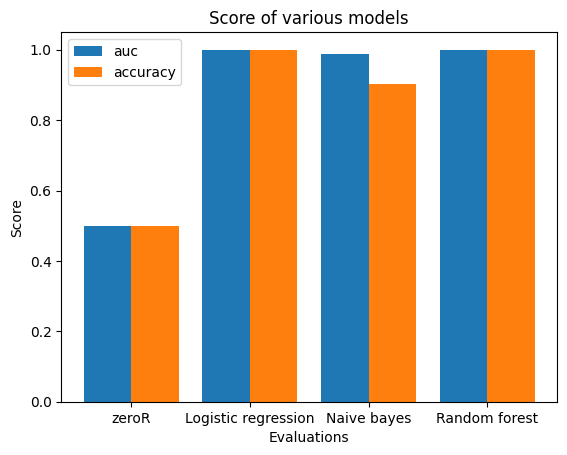

F1:  1.0 0.8872191813467284 1.0
auc:  [0.5, 1.0, 0.987807783478861, 1.0]
accuracy:  [0.5, 1.0, 0.9020435825252842, 1.0]
Y:  2
X:  2
Q:  3
Size difference:  -2470 
Sampling...
Shape j:  (347, 62)
Shape i:  (2817, 62)
Cohort shape:  (694, 62)
value_counts:  1    347
3    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol 

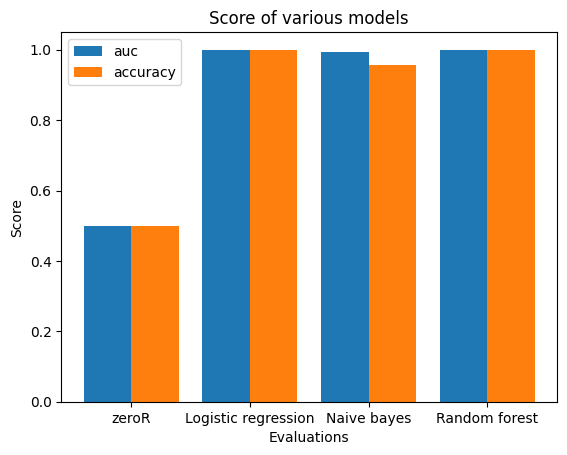

F1:  1.0 0.9545206576635377 1.0
auc:  [0.5, 1.0, 0.9933747412008281, 1.0]
accuracy:  [0.5, 1.0, 0.9568136794911897, 1.0]
Y:  3
X:  2
Q:  3
Size difference:  -504 
Sampling...
Shape j:  (2313, 62)
Shape i:  (2817, 62)
Cohort shape:  (4626, 62)
value_counts:  2    2313
3    2313
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alco

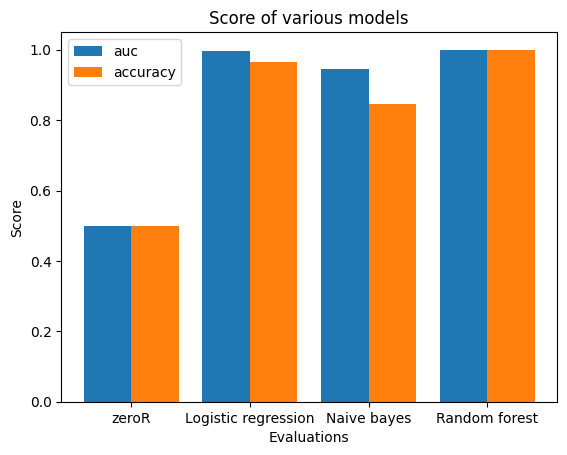

F1:  0.9647744608809276 0.8373605871785647 0.998919383383215
auc:  [0.5, 0.9966056546224387, 0.9460537580151424, 0.9999967295539417]
accuracy:  [0.5, 0.9654107757865857, 0.8460841748876307, 0.9989191524137528]
Y:  1
X:  3
Q:  1
Size difference:  1238 
Sampling...
Cohort shape:  (272, 62)
value_counts:  0    136
1    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

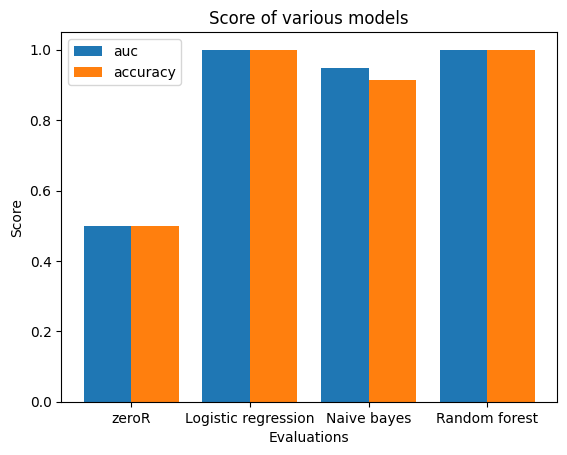

F1:  1.0 0.9191283292978208 1.0
auc:  [0.5, 1.0, 0.9485449735449736, 1.0]
accuracy:  [0.5, 1.0, 0.9152188552188552, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  -740 
Sampling...
Shape j:  (1374, 62)
Shape i:  (2114, 62)
Cohort shape:  (2748, 62)
value_counts:  0    1374
2    1374
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alco

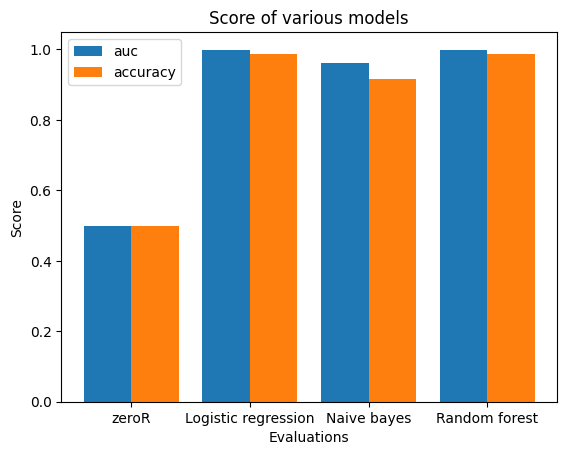

F1:  0.9861152691592348 0.9163422446373418 0.9856553740356938
auc:  [0.5, 0.9992086481269229, 0.9608652132472703, 0.9992681377812632]
accuracy:  [0.5, 0.986173869846001, 0.9163040238450074, 0.9858108958436828]
Y:  1
X:  3
Q:  3
Size difference:  -1183 
Sampling...
Shape j:  (1374, 62)
Shape i:  (2557, 62)
Cohort shape:  (2748, 62)
value_counts:  0    1374
3    1374
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

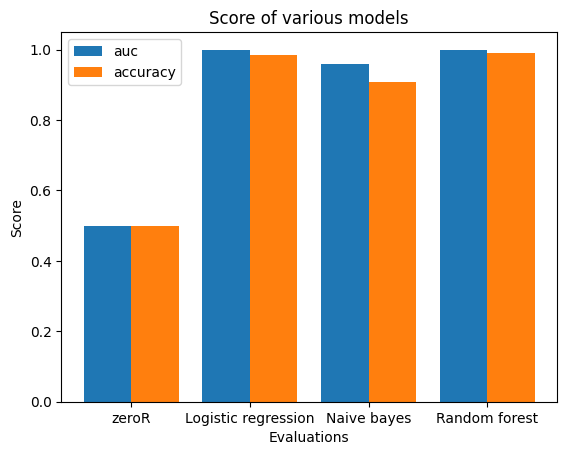

F1:  0.9834015633479077 0.9072920659609486 0.9908453879122775
auc:  [0.5, 0.9991686987995415, 0.9583201013452374, 0.9996835229534897]
accuracy:  [0.5, 0.9836251034939559, 0.9082967378705084, 0.9909024672959099]
Y:  1
X:  3
Q:  4
Size difference:  759 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  0    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

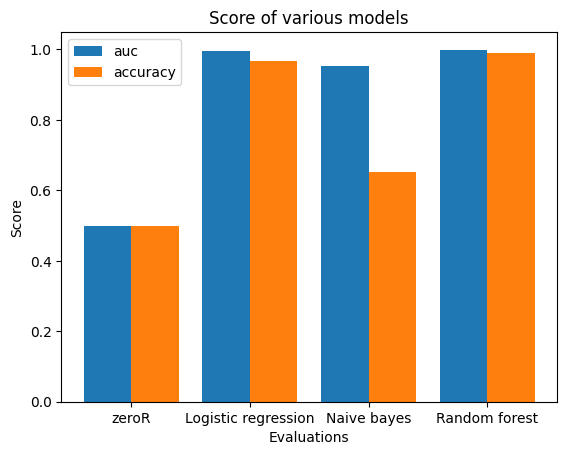

F1:  0.9683045064930903 0.748124650602287 0.9902435786818875
auc:  [0.5, 0.9961134245488796, 0.9523696212571882, 0.9992530900918766]
accuracy:  [0.5, 0.9682926829268292, 0.6520325203252032, 0.9902439024390244]
Y:  2
X:  3
Q:  2
Size difference:  -1978 
Sampling...
Shape j:  (136, 62)
Shape i:  (2114, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
2    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                       

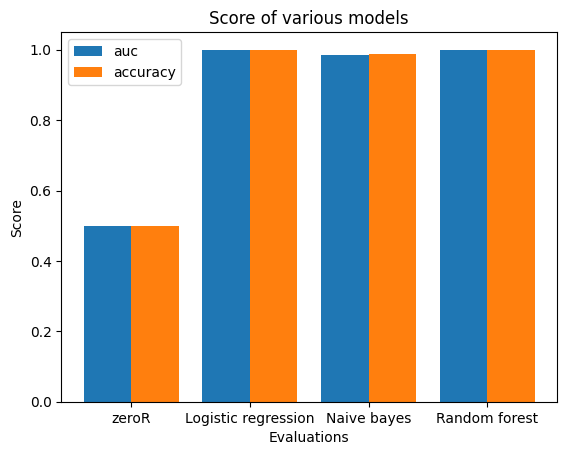

F1:  1.0 0.9893298633702017 1.0
auc:  [0.5, 1.0, 0.9851949833431315, 1.0]
accuracy:  [0.5, 1.0, 0.989023569023569, 1.0]
Y:  2
X:  3
Q:  3
Size difference:  -2421 
Sampling...
Shape j:  (136, 62)
Shape i:  (2557, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
3    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol 

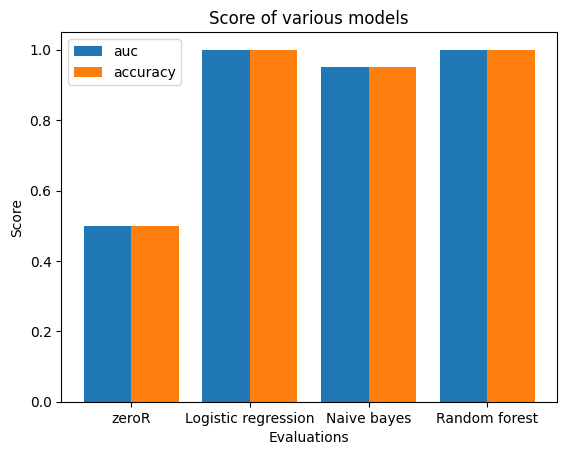

F1:  1.0 0.9488190076869323 1.0
auc:  [0.5, 1.0, 0.949617871840094, 1.0]
accuracy:  [0.5, 1.0, 0.9522558922558922, 1.0]
Y:  2
X:  3
Q:  4
Size difference:  -479 
Sampling...
Shape j:  (136, 62)
Shape i:  (615, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
4    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol in

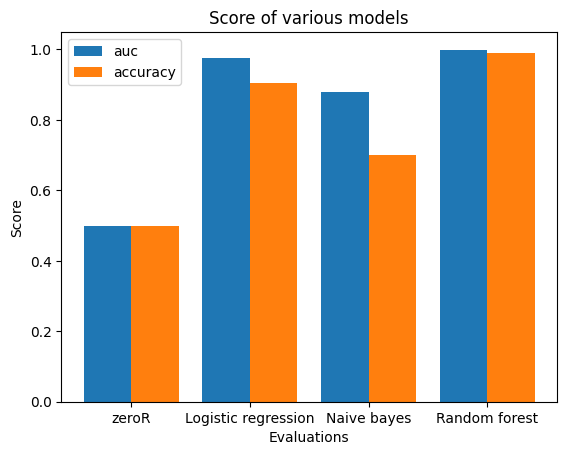

F1:  0.9066236088305054 0.7644891687082357 0.9888164665523156
auc:  [0.5, 0.97554379776602, 0.8789829512051734, 0.9993141289437586]
accuracy:  [0.5, 0.9042424242424242, 0.7016161616161616, 0.9889562289562289]
Y:  3
X:  3
Q:  3
Size difference:  -443 
Sampling...
Shape j:  (2114, 62)
Shape i:  (2557, 62)
Cohort shape:  (4228, 62)
value_counts:  2    2114
3    2114
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                     

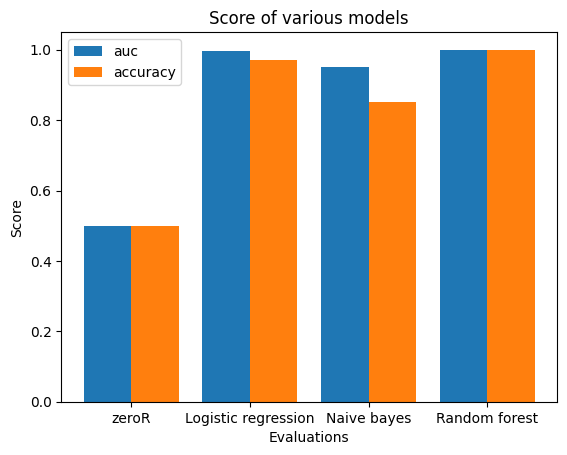

F1:  0.9690538120788845 0.8445366374684449 0.9978737313632166
auc:  [0.5, 0.9970337833437017, 0.9522364546142756, 0.9999776341692258]
accuracy:  [0.5, 0.969488718228489, 0.8524176423685426, 0.9978712213409431]
Y:  3
X:  3
Q:  4
Size difference:  1499 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  2    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

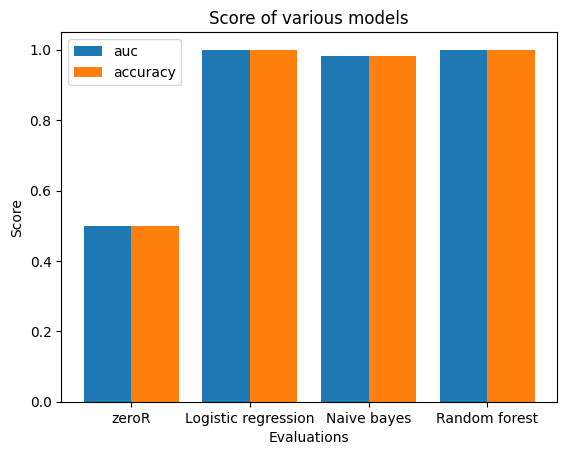

F1:  0.9991902834008097 0.9822234953509243 1.0
auc:  [0.5, 1.0, 0.9827153149580277, 1.0]
accuracy:  [0.5, 0.9991869918699187, 0.9821138211382113, 1.0]
Y:  4
X:  3
Q:  4
Size difference:  1942 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  3    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake fre

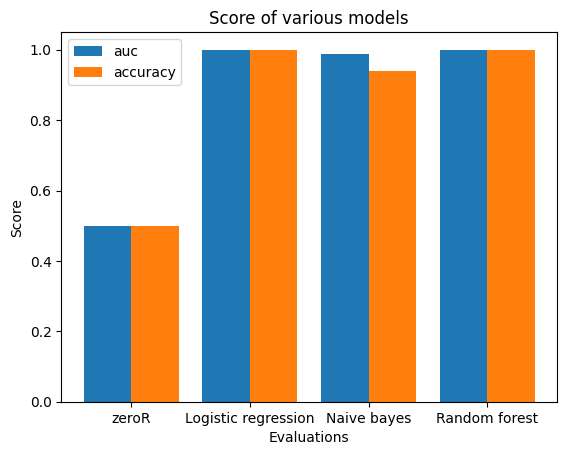

F1:  1.0 0.9438350364387955 1.0
auc:  [0.5, 1.0, 0.9875999735607112, 1.0]
accuracy:  [0.5, 1.0, 0.9382113821138212, 1.0]


In [244]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_fiveten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_fiveten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_fiveten_lada_c[(niddm_na_fiveten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and HBA1C

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  4500 
Sampling...
Cohort shape:  (2296, 62)
value_counts:  0    1148
1    1148
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twi

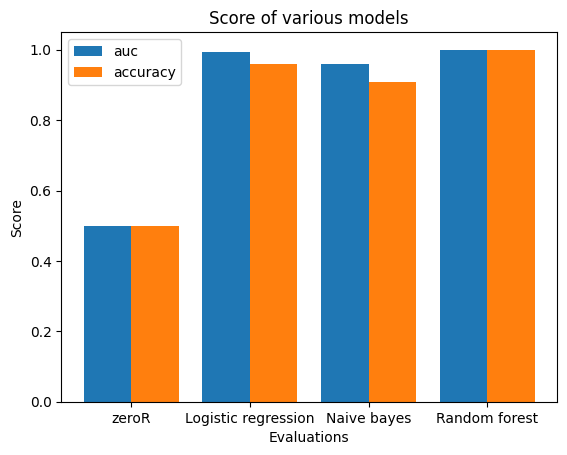

F1:  0.9592761081285659 0.9125746830002149 0.9991323210412147
auc:  [0.5, 0.9946350946417811, 0.9586067144897268, 0.9999338374291116]
accuracy:  [0.5, 0.9586331344131855, 0.9085488301600834, 0.9991294875438098]
Y:  1
X:  1
Q:  1
Size difference:  2124 
Sampling...
Cohort shape:  (2064, 62)
value_counts:  0    1032
1    1032
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. |

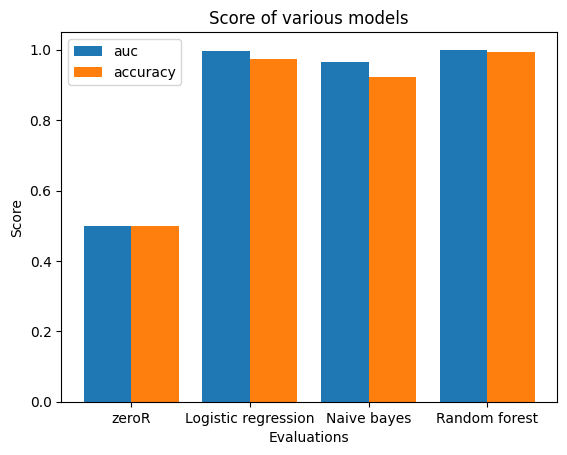

F1:  0.973492915301774 0.9210198486338618 0.9947033621034154
auc:  [0.5, 0.9971831181528035, 0.9638384349629314, 0.9998965876662008]
accuracy:  [0.5, 0.9733515127294953, 0.9215096734761042, 0.9946707727026963]
Y:  1
X:  1
Q:  2
Size difference:  548 
Sampling...
Cohort shape:  (5216, 62)
value_counts:  0    2608
2    2608
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | I

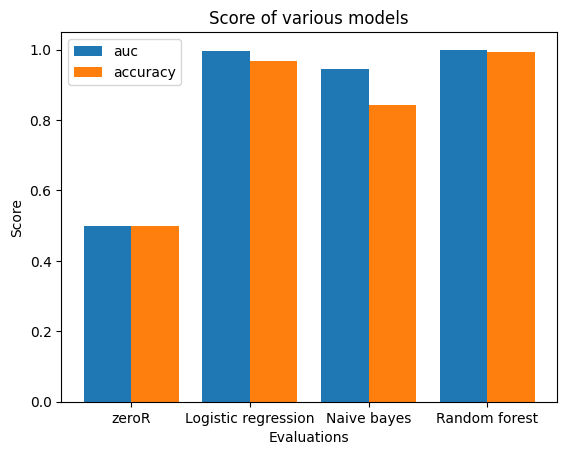

F1:  0.968846654541149 0.8499795638546973 0.9925347053753789
auc:  [0.5, 0.9967552501489038, 0.9446149339491057, 0.9997207175467183]
accuracy:  [0.5, 0.9683660087501791, 0.8418300437508954, 0.9925234091167903]
Y:  2
X:  1
Q:  2
Size difference:  -1576 
Sampling...
Shape j:  (1032, 62)
Shape i:  (2608, 62)
Cohort shape:  (2064, 62)
value_counts:  2    1032
1    1032
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

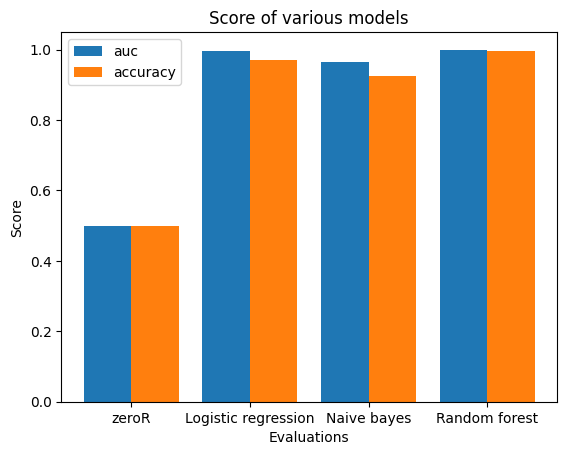

F1:  0.9697600482398686 0.9262188824754279 0.9966007549162414
auc:  [0.5, 0.9969077845216644, 0.9658545542636983, 0.999828761743174]
accuracy:  [0.5, 0.9699663837889936, 0.9263616916241566, 0.9966078187075389]
Y:  1
X:  2
Q:  1
Size difference:  972 
Sampling...
Cohort shape:  (694, 62)
value_counts:  0    347
1    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Inst

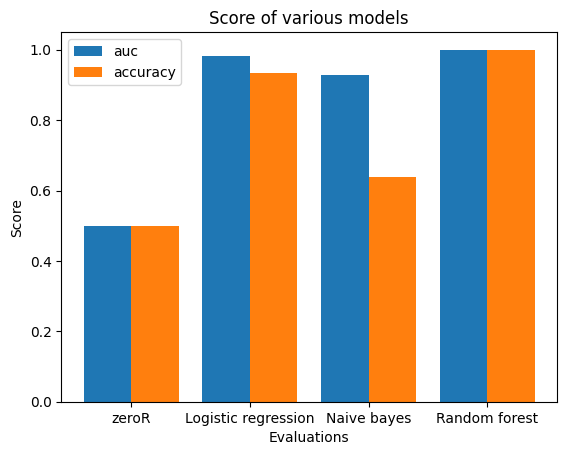

F1:  0.9347597909857684 0.7375216859298902 0.9985611510791367
auc:  [0.5, 0.9825534851621808, 0.9281090407177364, 1.0]
accuracy:  [0.5, 0.9337503909915547, 0.638233760817433, 0.9985611510791367]
Y:  1
X:  2
Q:  2
Size difference:  -994 
Sampling...
Shape j:  (1319, 62)
Shape i:  (2313, 62)
Cohort shape:  (2638, 62)
value_counts:  0    1319
2    1319
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
A

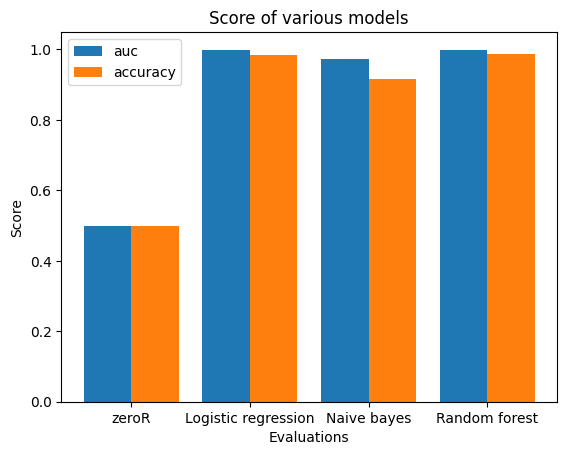

F1:  0.98397067801153 0.9199098670585703 0.9877875110493134
auc:  [0.5, 0.999229854717238, 0.9739149019140594, 0.9992004330812445]
accuracy:  [0.5, 0.9840794088896556, 0.9158645276292335, 0.987873037778161]
Y:  1
X:  2
Q:  3
Size difference:  -1498 
Sampling...
Shape j:  (1319, 62)
Shape i:  (2817, 62)
Cohort shape:  (2638, 62)
value_counts:  0    1319
3    1319
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                      

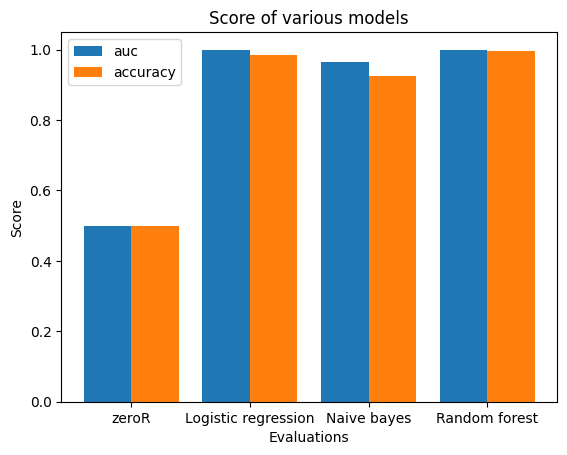

F1:  0.9854654730863132 0.9238816579459093 0.9946925999304718
auc:  [0.5, 0.9992648464423006, 0.965173904618253, 0.9994210926234345]
accuracy:  [0.5, 0.9855995917428555, 0.9241892358116267, 0.9946905008337645]
Y:  2
X:  2
Q:  2
Size difference:  -1966 
Sampling...
Shape j:  (347, 62)
Shape i:  (2313, 62)
Cohort shape:  (694, 62)
value_counts:  1    347
2    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                       

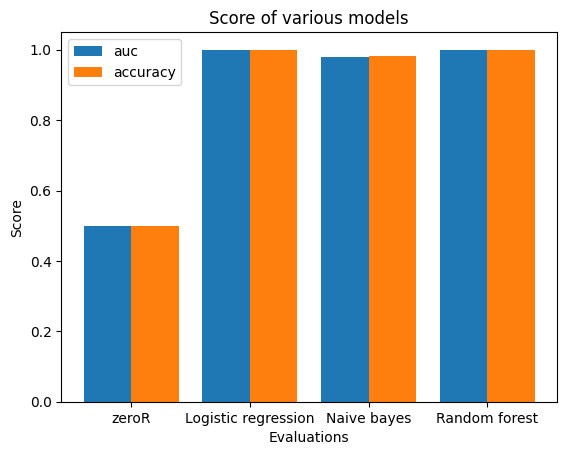

F1:  0.9985401459854015 0.9826086956521739 0.9985611510791367
auc:  [0.5, 1.0, 0.9795994238905392, 1.0]
accuracy:  [0.5, 0.9985611510791367, 0.9826921071838182, 0.9985611510791367]
Y:  2
X:  2
Q:  3
Size difference:  -2470 
Sampling...
Shape j:  (347, 62)
Shape i:  (2817, 62)
Cohort shape:  (694, 62)
value_counts:  1    347
3    347
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake fre

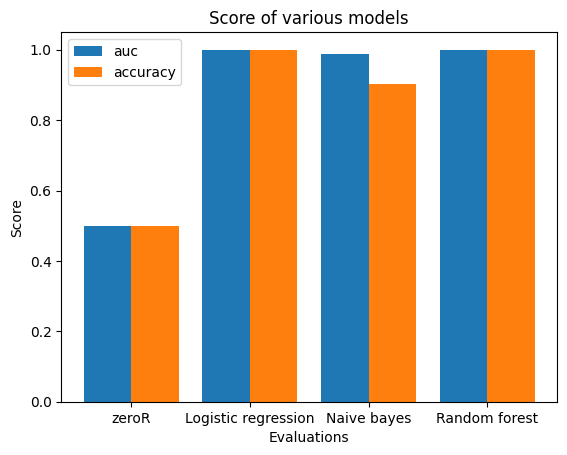

F1:  1.0 0.8777710931977467 1.0
auc:  [0.5, 1.0, 0.9875368319980796, 1.0]
accuracy:  [0.5, 1.0, 0.9017307892816182, 1.0]
Y:  3
X:  2
Q:  3
Size difference:  -504 
Sampling...
Shape j:  (2313, 62)
Shape i:  (2817, 62)
Cohort shape:  (4626, 62)
value_counts:  2    2313
3    2313
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alco

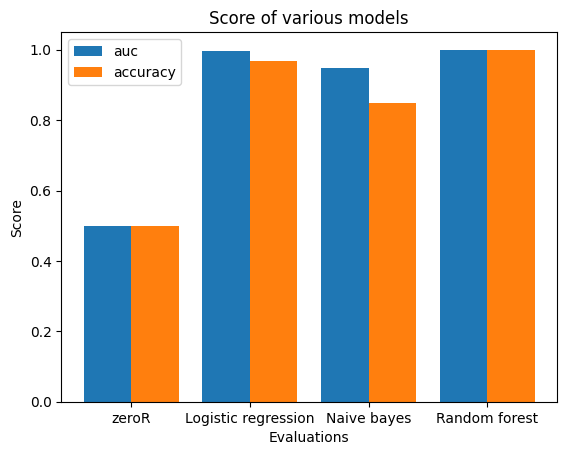

F1:  0.9671801937103429 0.8391527897898762 0.9989198523944901
auc:  [0.5, 0.9967579530048917, 0.9473897932882208, 0.9999962600394566]
accuracy:  [0.5, 0.967789621154632, 0.8473831066487654, 0.9989191524137528]
Y:  1
X:  3
Q:  1
Size difference:  1238 
Sampling...
Cohort shape:  (272, 62)
value_counts:  0    136
1    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

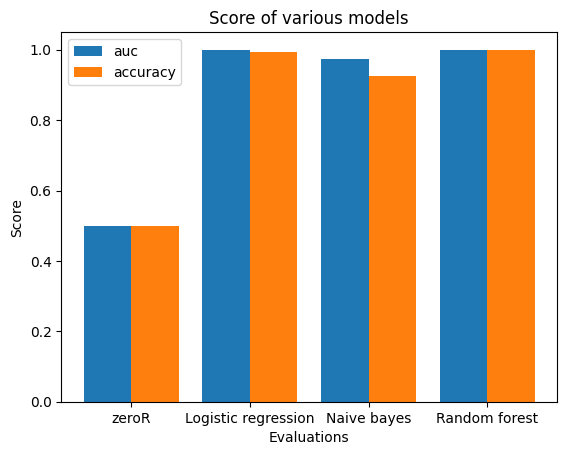

F1:  0.9924528301886792 0.9352272727272727 1.0
auc:  [0.5, 0.9997354497354497, 0.9728689006466784, 1.0]
accuracy:  [0.5, 0.9926599326599327, 0.9263299663299663, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  -740 
Sampling...
Shape j:  (1374, 62)
Shape i:  (2114, 62)
Cohort shape:  (2748, 62)
value_counts:  0    1374
2    1374
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

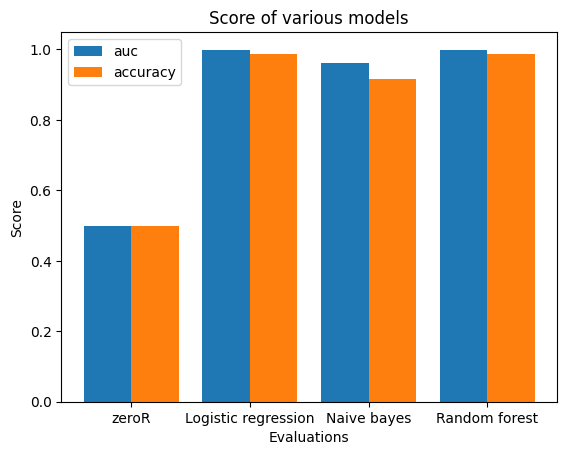

F1:  0.9857117392565269 0.9155467111488498 0.9856684271856736
auc:  [0.5, 0.99926035350184, 0.9617105724799421, 0.9992576654400676]
accuracy:  [0.5, 0.9858036098691837, 0.9152084782248717, 0.9858042722305017]
Y:  1
X:  3
Q:  3
Size difference:  -1183 
Sampling...
Shape j:  (1374, 62)
Shape i:  (2557, 62)
Cohort shape:  (2748, 62)
value_counts:  0    1374
3    1374
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                    

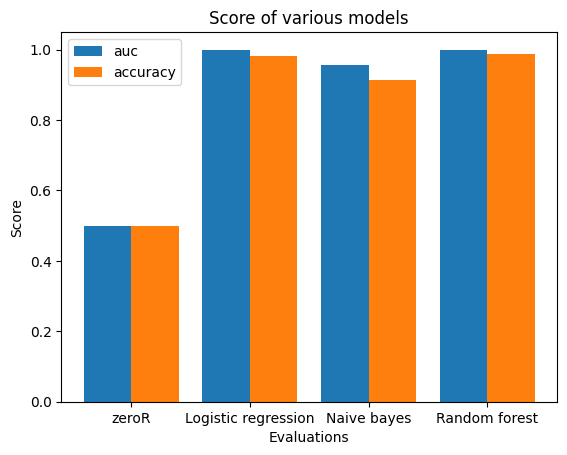

F1:  0.9824194222681054 0.9124067571998555 0.9882982821935223
auc:  [0.5, 0.9989654002533631, 0.9562295807444049, 0.9994445219279725]
accuracy:  [0.5, 0.9825361814870012, 0.9126729590991887, 0.9883523762212287]
Y:  1
X:  3
Q:  4
Size difference:  759 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  0    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

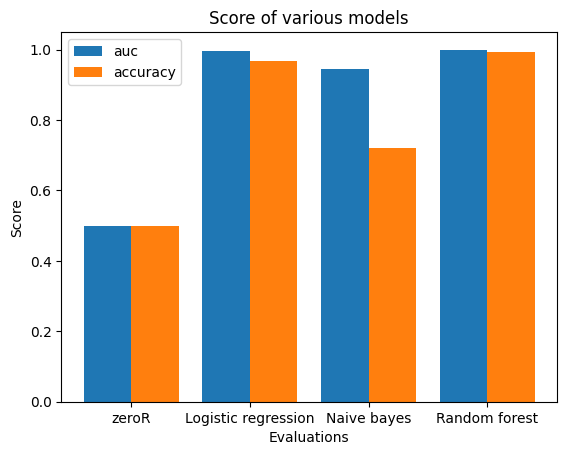

F1:  0.9684069826652291 0.79124551215058 0.9918562649414168
auc:  [0.5, 0.9958093727278736, 0.9436644854253421, 0.9997554365787561]
accuracy:  [0.5, 0.9682926829268292, 0.7219512195121951, 0.991869918699187]
Y:  2
X:  3
Q:  2
Size difference:  -1978 
Sampling...
Shape j:  (136, 62)
Shape i:  (2114, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
2    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

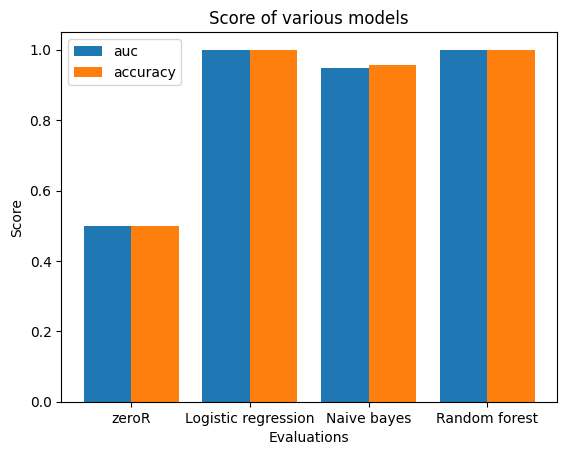

F1:  1.0 0.9542458248784553 1.0
auc:  [0.5, 1.0, 0.9485498726239466, 1.0]
accuracy:  [0.5, 1.0, 0.9558249158249158, 1.0]
Y:  2
X:  3
Q:  3
Size difference:  -2421 
Sampling...
Shape j:  (136, 62)
Shape i:  (2557, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
3    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol

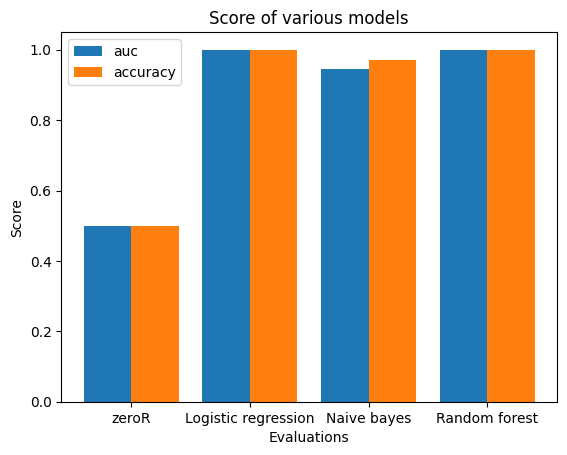

F1:  1.0 0.9677272727272728 1.0
auc:  [0.5, 1.0, 0.9439447383891828, 1.0]
accuracy:  [0.5, 1.0, 0.9705050505050505, 1.0]
Y:  2
X:  3
Q:  4
Size difference:  -479 
Sampling...
Shape j:  (136, 62)
Shape i:  (615, 62)
Cohort shape:  (272, 62)
value_counts:  1    136
4    136
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol i

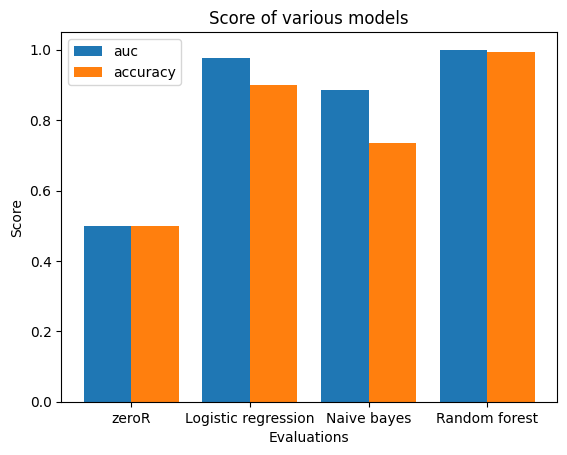

F1:  0.9035460673730076 0.647819519909172 0.9923076923076923
auc:  [0.5, 0.977111503037429, 0.8861160101900841, 1.0]
accuracy:  [0.5, 0.9009427609427609, 0.736026936026936, 0.9925925925925926]
Y:  3
X:  3
Q:  3
Size difference:  -443 
Sampling...
Shape j:  (2114, 62)
Shape i:  (2557, 62)
Cohort shape:  (4228, 62)
value_counts:  2    2114
3    2114
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alc

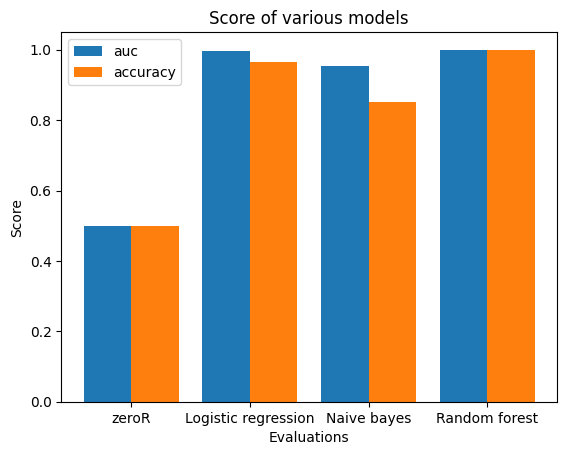

F1:  0.9656189393911446 0.8446582914123271 0.9983437548085666
auc:  [0.5, 0.9969508252882958, 0.9530707843315965, 0.9999754012943629]
accuracy:  [0.5, 0.9661767873879167, 0.8528789849902779, 0.998344314350861]
Y:  3
X:  3
Q:  4
Size difference:  1499 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  2    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

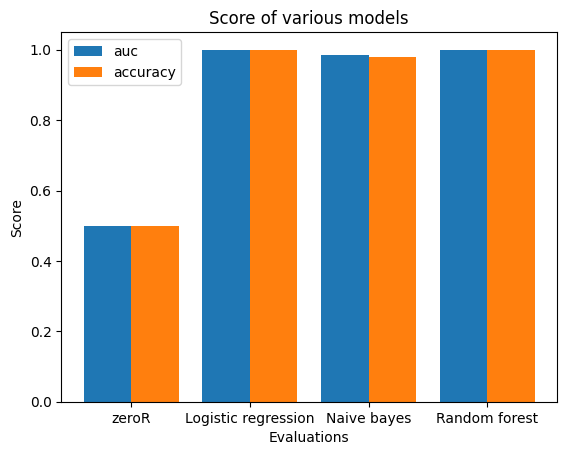

F1:  0.9991902834008097 0.9801230098658017 1.0
auc:  [0.5, 1.0, 0.9862780091215546, 1.0]
accuracy:  [0.5, 0.9991869918699187, 0.9796747967479675, 1.0]
Y:  4
X:  3
Q:  4
Size difference:  1942 
Sampling...
Cohort shape:  (1230, 62)
value_counts:  3    615
4    615
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake fre

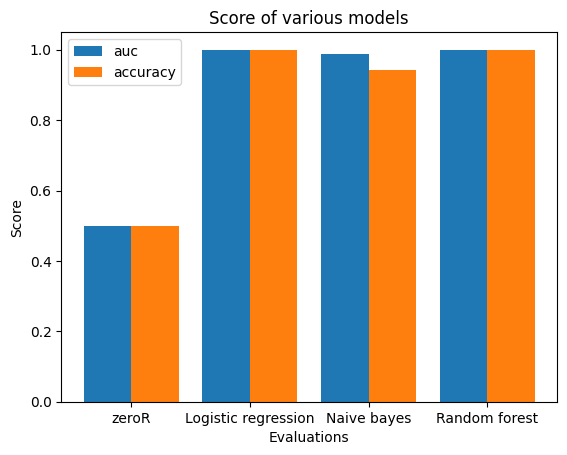

F1:  1.0 0.9452937302988655 0.9991836734693877
auc:  [0.5, 1.0, 0.9879436843148919, 1.0]
accuracy:  [0.5, 1.0, 0.9414634146341463, 0.9991869918699187]


In [246]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_fiveten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
        'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_fiveten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_fiveten_lada_c[(niddm_na_fiveten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                'Glycated haemoglobin (HbA1c) | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

#### Ten+ year 

##### Questionnaire only

Cluster data dimensions:  4 
Sublists
2
3
4
5
Y:  1
X:  0
Q:  1
Size difference:  2727 
Sampling...
Cohort shape:  (1658, 62)
value_counts:  0    829
1    829
Name: cluster_0, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never                         0
Alcohol intake frequency. | Instance 0_Once or twice

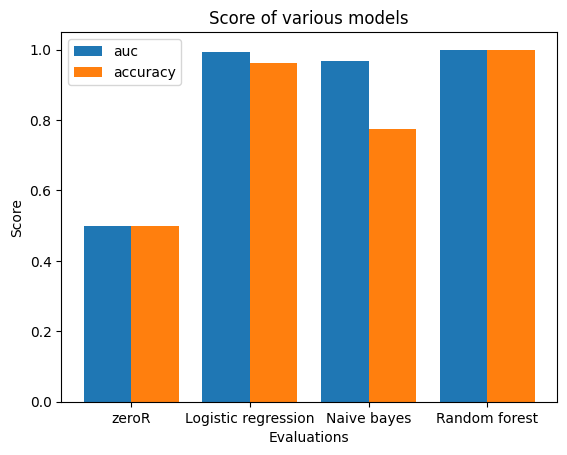

F1:  0.9626026905289095 0.8284435460689259 0.9993993993993994
auc:  [0.5, 0.9931017828158197, 0.966554366425175, 0.9997713746552475]
accuracy:  [0.5, 0.9619972336475813, 0.7755905798420267, 0.9993975903614458]
Y:  1
X:  1
Q:  1
Size difference:  2737 
Sampling...
Cohort shape:  (588, 62)
value_counts:  0    294
1    294
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Ins

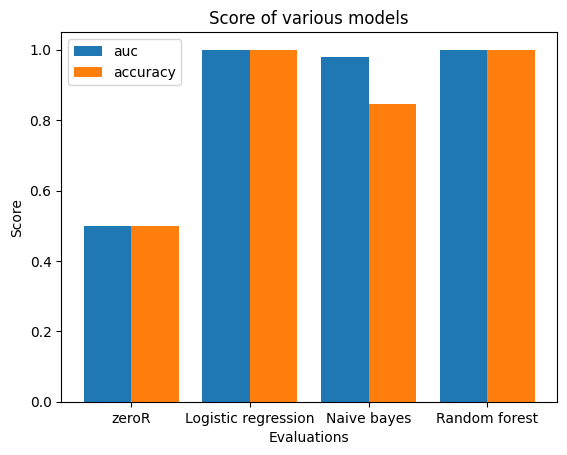

F1:  1.0 0.8785690318731043 0.9982905982905983
auc:  [0.5, 1.0, 0.9795728536191542, 1.0]
accuracy:  [0.5, 1.0, 0.8454295233956252, 0.9983050847457627]
Y:  1
X:  1
Q:  2
Size difference:  1971 
Sampling...
Cohort shape:  (2120, 62)
value_counts:  0    1060
2    1060
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake f

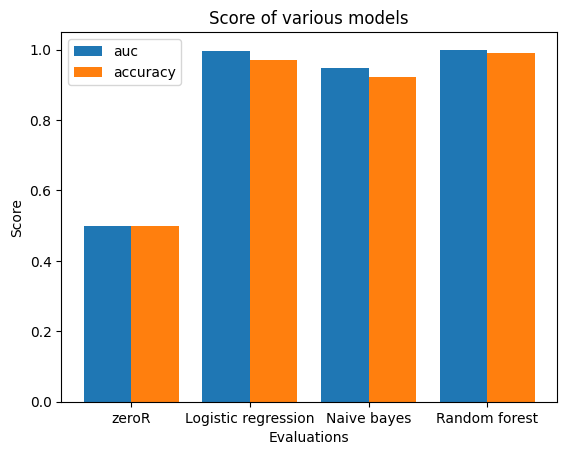

F1:  0.9718669896638625 0.922535445774675 0.991524857468915
auc:  [0.5, 0.9972721609113563, 0.9481554823780705, 0.9995728017087931]
accuracy:  [0.5, 0.9716981132075472, 0.9207547169811321, 0.9915094339622641]
Y:  2
X:  1
Q:  2
Size difference:  -766 
Sampling...
Shape j:  (294, 62)
Shape i:  (1060, 62)
Cohort shape:  (588, 62)
value_counts:  1    294
2    294
Name: cluster_1, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

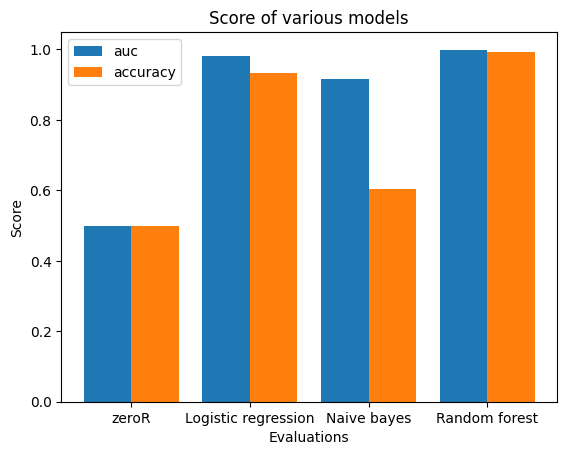

F1:  0.9310873029369713 0.34330469587962203 0.9915671909789556
auc:  [0.5, 0.9812667782741781, 0.9158020386531813, 0.9990787427314782]
accuracy:  [0.5, 0.9320440388236998, 0.6034622627842967, 0.9915109372736491]
Y:  1
X:  2
Q:  1
Size difference:  553 
Sampling...
Cohort shape:  (1828, 62)
value_counts:  0    914
1    914
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | I

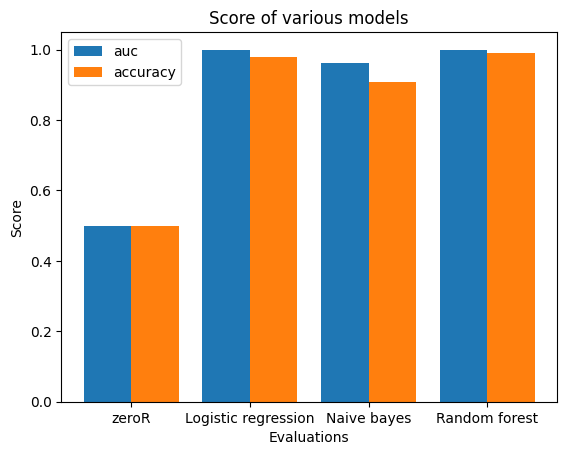

F1:  0.9786621067691753 0.9151174606119703 0.9907474854442117
auc:  [0.5, 0.9985502538310923, 0.9611812177789065, 0.9994598029400501]
accuracy:  [0.5, 0.9786660678194475, 0.9091593682161838, 0.9906894228609926]
Y:  1
X:  2
Q:  2
Size difference:  -299 
Sampling...
Shape j:  (1467, 62)
Shape i:  (1766, 62)
Cohort shape:  (2934, 62)
value_counts:  0    1467
2    1467
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                   

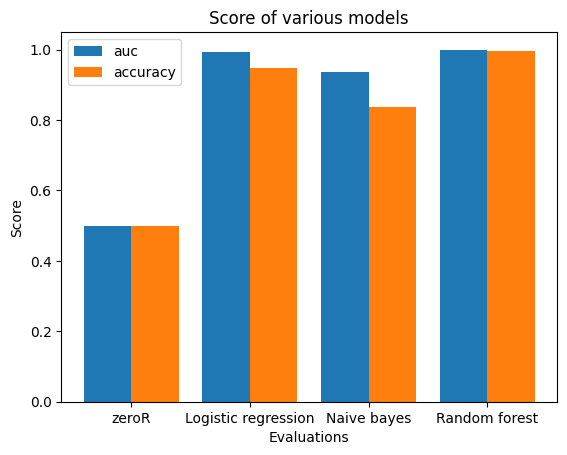

F1:  0.9479886394681621 0.8287415353017851 0.9952088900920809
auc:  [0.5, 0.9933168925061667, 0.9376880566202183, 0.9998153021881562]
accuracy:  [0.5, 0.9492159473460821, 0.8377647667610514, 0.9952294015384526]
Y:  1
X:  2
Q:  3
Size difference:  1229 
Sampling...
Cohort shape:  (476, 62)
value_counts:  0    238
3    238
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

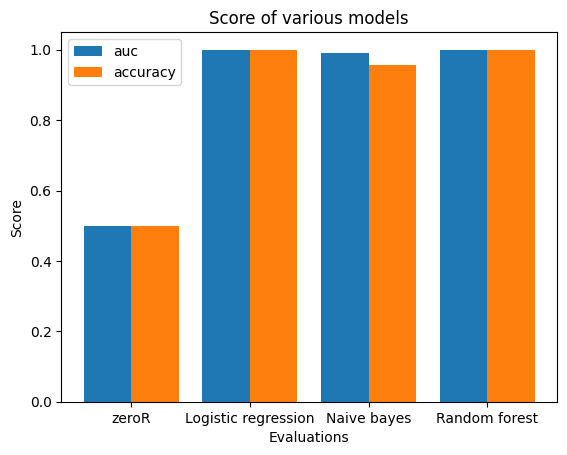

F1:  0.9979381443298969 0.9585316879788353 0.9978947368421053
auc:  [0.5, 0.9999113475177305, 0.9904698581560284, 1.0]
accuracy:  [0.5, 0.9978947368421053, 0.9558333333333333, 0.9978947368421053]
Y:  2
X:  2
Q:  2
Size difference:  -852 
Sampling...
Shape j:  (914, 62)
Shape i:  (1766, 62)
Cohort shape:  (1828, 62)
value_counts:  1    914
2    914
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alc

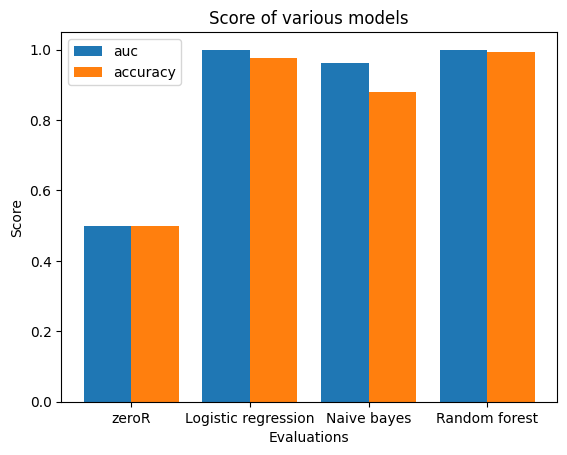

F1:  0.9746373833767102 0.8641186335786237 0.991735261968451
auc:  [0.5, 0.998079047769991, 0.9605594784444556, 0.9994754879328919]
accuracy:  [0.5, 0.9748349427352346, 0.8791391571225391, 0.9917957930982858]
Y:  2
X:  2
Q:  3
Size difference:  676 
Sampling...
Cohort shape:  (476, 62)
value_counts:  1    238
3    238
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Insta

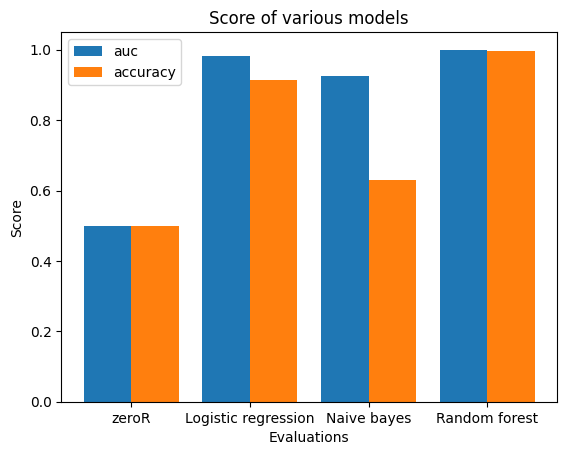

F1:  0.9151017081144555 0.7289637178190728 0.9958762886597938
auc:  [0.5, 0.980998817966903, 0.9247164967494089, 1.0]
accuracy:  [0.5, 0.9138377192982456, 0.6297368421052632, 0.995811403508772]
Y:  3
X:  2
Q:  3
Size difference:  1528 
Sampling...
Cohort shape:  (476, 62)
value_counts:  2    238
3    238
Name: cluster_2, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or

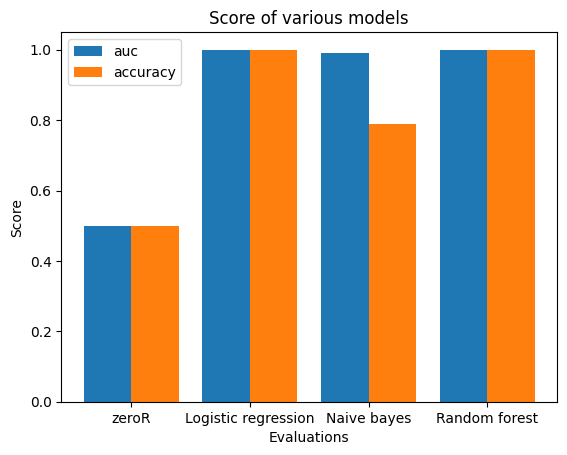

F1:  1.0 0.832367650535173 0.9979381443298969
auc:  [0.5, 1.0, 0.9907801418439716, 1.0]
accuracy:  [0.5, 1.0, 0.7879605263157895, 0.9979166666666667]
Y:  1
X:  3
Q:  1
Size difference:  835 
Sampling...
Cohort shape:  (924, 62)
value_counts:  0    462
1    462
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake freque

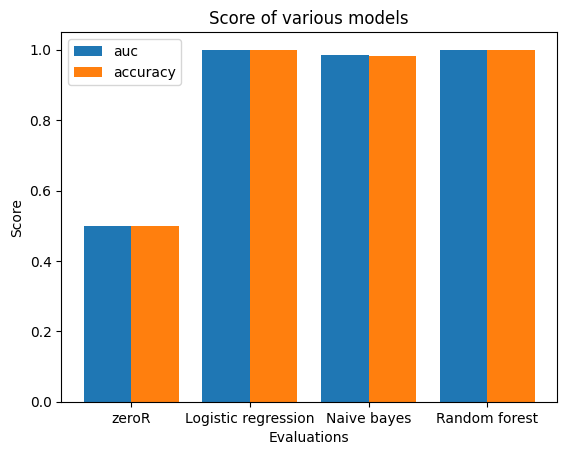

F1:  1.0 0.9818791744026949 1.0
auc:  [0.5, 1.0, 0.9841181881009005, 1.0]
accuracy:  [0.5, 1.0, 0.9816098707403056, 1.0]
Y:  1
X:  3
Q:  2
Size difference:  384 
Sampling...
Cohort shape:  (1826, 62)
value_counts:  0    913
2    913
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never     

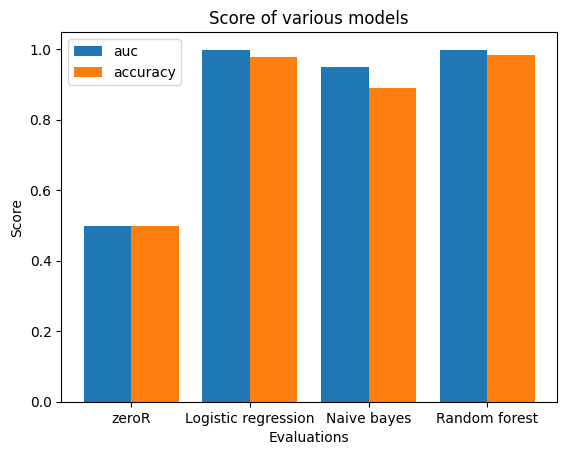

F1:  0.9793382508412549 0.8825823069518968 0.9838026961007963
auc:  [0.5, 0.9984223128539172, 0.9504619853853931, 0.9987650365102663]
accuracy:  [0.5, 0.9791915562542106, 0.8888165281832472, 0.9835736207799984]
Y:  1
X:  3
Q:  3
Size difference:  1184 
Sampling...
Cohort shape:  (226, 62)
value_counts:  0    113
3    113
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | In

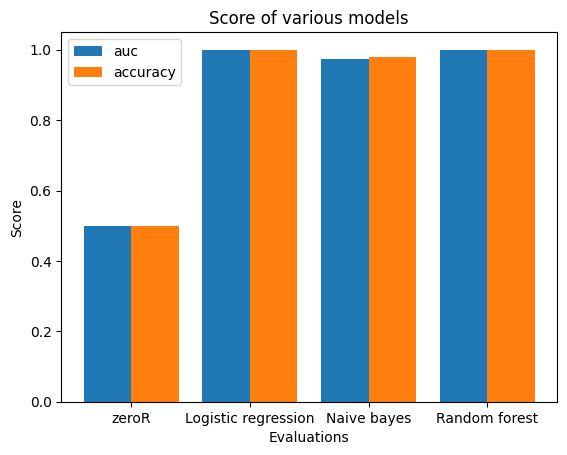

F1:  1.0 0.9783204384268214 1.0
auc:  [0.5, 1.0, 0.9735177865612649, 1.0]
accuracy:  [0.5, 1.0, 0.9779710144927536, 1.0]
Y:  1
X:  3
Q:  4
Size difference:  -303 
Sampling...
Shape j:  (1297, 62)
Shape i:  (1600, 62)
Cohort shape:  (2594, 62)
value_counts:  0    1297
4    1297
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alco

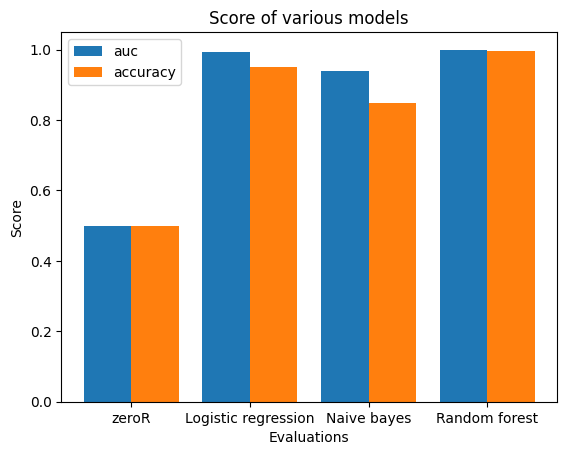

F1:  0.9495376070414885 0.843231523212278 0.9965317489047408
auc:  [0.5, 0.9937530631739127, 0.9398609488184778, 0.9998782298782299]
accuracy:  [0.5, 0.9506594951681656, 0.8477231980122154, 0.9965317919075144]
Y:  2
X:  3
Q:  2
Size difference:  -451 
Sampling...
Shape j:  (462, 62)
Shape i:  (913, 62)
Cohort shape:  (924, 62)
value_counts:  1    462
2    462
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

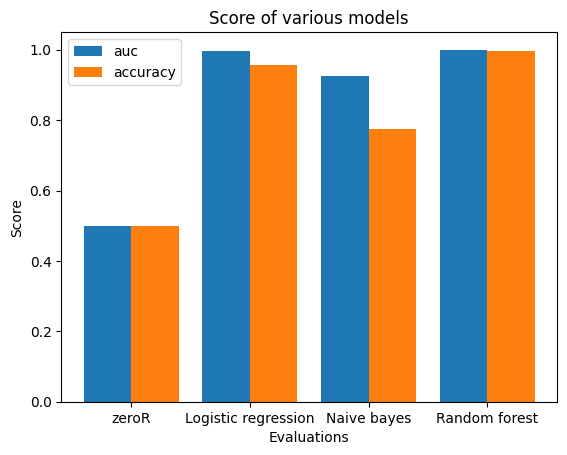

F1:  0.9574387325449992 0.8111227231043193 0.9956636720650808
auc:  [0.5, 0.9951966075167185, 0.9255903561192756, 0.999976370510397]
accuracy:  [0.5, 0.9577732079905993, 0.7750058754406581, 0.9956639247943596]
Y:  2
X:  3
Q:  3
Size difference:  349 
Sampling...
Cohort shape:  (226, 62)
value_counts:  1    113
3    113
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Inst

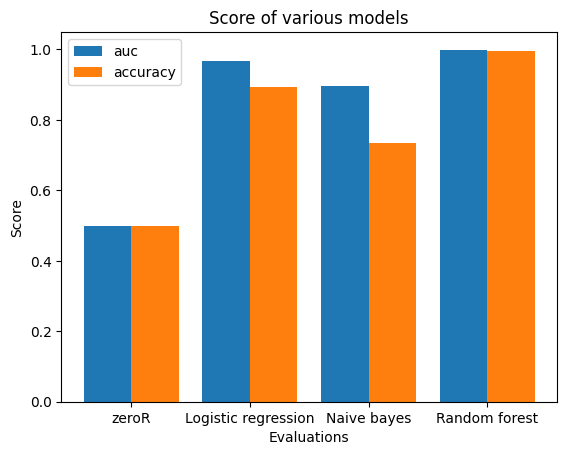

F1:  0.8939958592132505 0.6489475500345065 0.9957446808510638
auc:  [0.5, 0.9660250902216876, 0.8974823852895687, 0.9992094861660079]
accuracy:  [0.5, 0.8935265700483092, 0.7352657004830917, 0.9955555555555555]
Y:  2
X:  3
Q:  4
Size difference:  -1138 
Sampling...
Shape j:  (462, 62)
Shape i:  (1600, 62)
Cohort shape:  (924, 62)
value_counts:  1    462
4    462
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                      

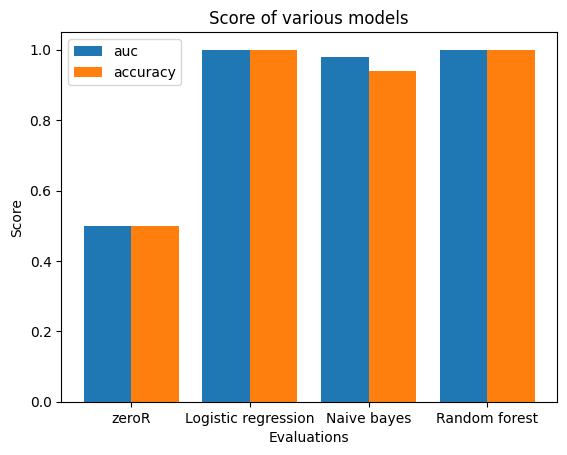

F1:  1.0 0.9292688857748804 1.0
auc:  [0.5, 1.0, 0.9789270687237027, 1.0]
accuracy:  [0.5, 1.0, 0.9383783783783785, 1.0]
Y:  3
X:  3
Q:  3
Size difference:  800 
Sampling...
Cohort shape:  (226, 62)
value_counts:  2    113
3    113
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alcohol intake frequency. | Instance 0_Daily or almost daily         0
Alcohol intake frequency. | Instance 0_Never      

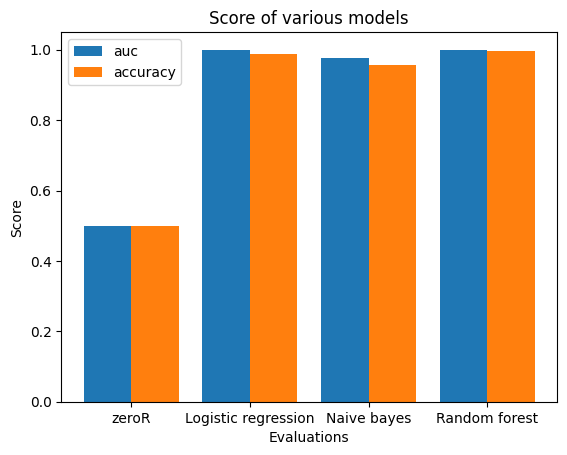

F1:  0.9864646464646465 0.9574390995991366 0.9953488372093023
auc:  [0.5, 0.999604743083004, 0.9756831070630693, 1.0]
accuracy:  [0.5, 0.9866666666666667, 0.9557487922705314, 0.9955555555555555]
Y:  3
X:  3
Q:  4
Size difference:  -687 
Sampling...
Shape j:  (913, 62)
Shape i:  (1600, 62)
Cohort shape:  (1826, 62)
value_counts:  2    913
4    913
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                                0
Alco

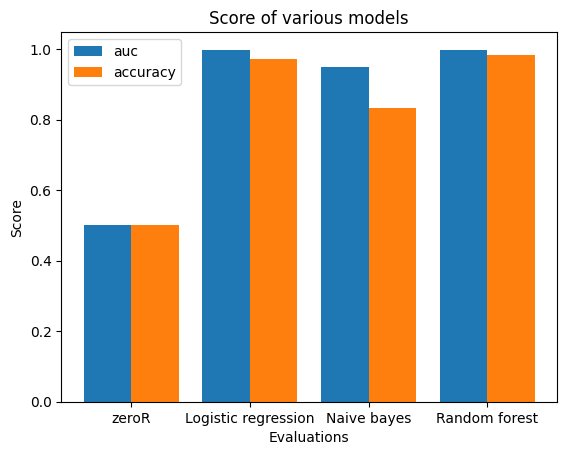

F1:  0.9729517709897754 0.8545618225891969 0.981685493001527
auc:  [0.5, 0.9980208689157897, 0.9489358651143117, 0.9983101389040653]
accuracy:  [0.5, 0.97316865034808, 0.8329560595852983, 0.9819252938094168]
Y:  4
X:  3
Q:  4
Size difference:  -1487 
Sampling...
Shape j:  (113, 62)
Shape i:  (1600, 62)
Cohort shape:  (226, 62)
value_counts:  3    113
4    113
Name: cluster_3, dtype: int64
0
MinMax
modeling...
Number of missing values: 
 Age at recruitment                                                   0
Sex_binary                                                           0
Asian                                                                0
Black                                                                0
Chinese                                                              0
Mixed                                                                0
Other                                                                0
White                                                         

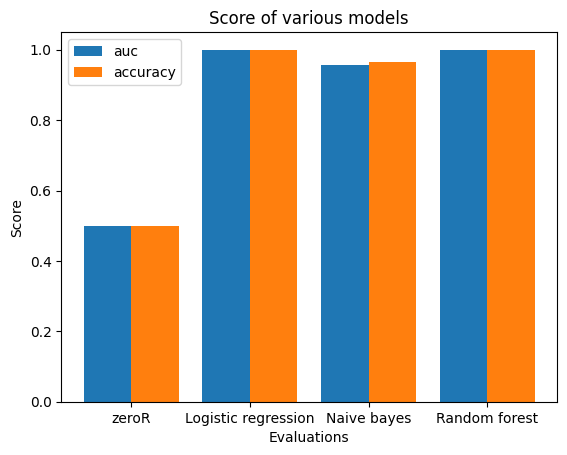

F1:  1.0 0.9633327567318226 1.0
auc:  [0.5, 1.0, 0.9578965457982471, 1.0]
accuracy:  [0.5, 1.0, 0.9647342995169083, 1.0]


In [247]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_ten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0'
     ]])
    niddm_na_ten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_ten_lada_c[(niddm_na_ten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

##### Questionnaire and HBA1C

In [1]:
clustered_dfs = []

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(niddm_na_ten_lada_c[[
     'Age at recruitment',
     'Sex_binary',
     'Asian',
     'Black',
     'Chinese',
     'Mixed',
     'Other',
     'White',
     'Alcohol intake frequency. | Instance 0_Daily or almost daily',
     'Alcohol intake frequency. | Instance 0_Never',
     'Alcohol intake frequency. | Instance 0_Once or twice a week',
     'Alcohol intake frequency. | Instance 0_One to three times a month',
     'Alcohol intake frequency. | Instance 0_Special occasions only',
     'Alcohol intake frequency. | Instance 0_Three or four times a week',
     'fmi',
     'Body fat percentage | Instance 0',
     'Waist circumference | Instance 0',
     'Weight | Instance 0',
     'Hip circumference | Instance 0',
     'Whole body fat mass | Instance 0',
     'Basal metabolic rate | Instance 0',
     'Trunk fat percentage | Instance 0',
     'Arm fat percentage (left) | Instance 0',
     'Leg fat percentage (left) | Instance 0',
     'Diastolic blood pressure',
     'Systolic blood pressure',
     'Illnesses of father',
     'Illnesses of mother',
     'Illnesses of siblings',
     'father_stroke',
     'mother_stroke',
     'sibling_stroke',
     'father_alzheimer',
     'mother_alzheimer',
     'sibling_alzheimer',
     'father_bloodpressure',
     'mother_bloodpressure',
     'sibling_bloodpressure',
     'father_heart',
     'mother_heart',
     'sibling_heart',
     'father_parkinson',
     'mother_parkinson',
     'sibling_parkinson',
     'Sleep duration | Instance 0',
     'Tobacco smoking_Ex-smoker',
     'Tobacco smoking_Never smoked',
     'Tobacco smoking_Occasionally',
     'Tobacco smoking_Smokes on most or all days',
     'Summed MET minutes per week for all activity | Instance 0',
     'Summed minutes activity | Instance 0',
        'Glycated haemoglobin (HbA1c) | Instance 0'
     ]])
    niddm_na_ten_lada_c["cluster_"+str(i-2)] = kmeans.labels_.tolist()
    
    t=[]
    for j in range(0, i):
        t.append(niddm_na_ten_lada_c[(niddm_na_ten_lada_c["cluster_"+str(i-2)] ==j)])
    
    clustered_dfs.append(t)


print("Cluster data dimensions: ", len(clustered_dfs), "\nSublists")
for i in clustered_dfs:
    print(len(i))

x=-1 #Cluster sublist done

for i in clustered_dfs: #For sublist of clustered dfs
    #print("Number of clusters: ", len(i))
    x+=1
    y=0
    
    
    for j in i: #For dfs in specified cluster amount
        
        #print("Cluster ", y ," of ", len(i)-1)
        y += 1
        for q in range(y,len(i)): #For df in remaining clusters
            print("Y: ", y)
            if j.shape[0] > i[q].shape[0]:
            
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([i[q], j.sample(n=i[q].shape[0])], axis=0)
                print("Cohort shape: ", cohort.shape)
                
            else:
                print("X: ", x)
                print("Q: ", q)
                print("Size difference: ", j.shape[0] - i[q].shape[0], "\nSampling...") 
                cohort = pd.concat([j, i[q].sample(n=j.shape[0])], axis=0)
                print("Shape j: ", j.shape)
                print("Shape i: ", i[q].shape)
                print("Cohort shape: ", cohort.shape)
            
            cohort= cohort.sample(frac=1)
            
            #cohort["cluster_"+str(x)] = cohort["cluster_"+str(x)].apply(dp.nan_to_binary)
            print("value_counts: ", cohort["cluster_"+str(x)].value_counts())
            print(cohort["cluster_"+str(x)].isna().sum())
            
            cohort= cohort[[
             'Age at recruitment',
                 'Sex_binary',
                 'Asian',
                 'Black',
                 'Chinese',
                 'Mixed',
                 'Other',
                 'White',
                 'Alcohol intake frequency. | Instance 0_Daily or almost daily',
                 'Alcohol intake frequency. | Instance 0_Never',
                 'Alcohol intake frequency. | Instance 0_Once or twice a week',
                 'Alcohol intake frequency. | Instance 0_One to three times a month',
                 'Alcohol intake frequency. | Instance 0_Special occasions only',
                 'Alcohol intake frequency. | Instance 0_Three or four times a week',
                 'fmi',
                 'Body fat percentage | Instance 0',
                 'Waist circumference | Instance 0',
                 'Weight | Instance 0',
                 'Hip circumference | Instance 0',
                 'Whole body fat mass | Instance 0',
                 'Basal metabolic rate | Instance 0',
                 'Trunk fat percentage | Instance 0',
                 'Arm fat percentage (left) | Instance 0',
                 'Leg fat percentage (left) | Instance 0',
                 'Diastolic blood pressure',
                 'Systolic blood pressure',
                 'Illnesses of father',
                 'Illnesses of mother',
                 'Illnesses of siblings',
                 'father_stroke',
                 'mother_stroke',
                 'sibling_stroke',
                 'father_alzheimer',
                 'mother_alzheimer',
                 'sibling_alzheimer',
                 'father_bloodpressure',
                 'mother_bloodpressure',
                 'sibling_bloodpressure',
                 'father_heart',
                 'mother_heart',
                 'sibling_heart',
                 'father_parkinson',
                 'mother_parkinson',
                 'sibling_parkinson',
                 'Sleep duration | Instance 0',
                 'Tobacco smoking_Ex-smoker',
                 'Tobacco smoking_Never smoked',
                 'Tobacco smoking_Occasionally',
                 'Tobacco smoking_Smokes on most or all days',
                 'Summed MET minutes per week for all activity | Instance 0',
                 'Summed minutes activity | Instance 0',
                'Glycated haemoglobin (HbA1c) | Instance 0',
                "cluster_"+str(x)
             ]]
    
            print("MinMax")
            mms = MinMaxScaler()
            mms.fit(cohort)
            data_transformed = mms.transform(cohort)
            cohort = pd.DataFrame(data_transformed, columns=cohort.columns.tolist())
    
            print("modeling...")
            emp.pipeline(cohort, 'cluster_'+str(x), cohort.columns.tolist()[:-1], 0.25, splits=5)

NameError: name 'KMeans' is not defined